<a href="https://colab.research.google.com/github/mattsmit4/DFScode/blob/main/_OwnersBox_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Install Packages & Start Timer

In [ ]:
pip install pulp

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
import tensorflow as tf
from statistics import median
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
import time


In [ ]:
# Record the start time
start_time = time.time()

###Update Rules for Optimizer

In [ ]:
# Current week in NFL
week = 18
# How many model iterations you want
iterations = 151
# Setting the floor of players to not include
floor = 0.2
# Setting a maximum for sum of Ownership as a percentage
Ownership = 0.84
# Set minimums for the projected points
NewProjectedPoints_rb_qb_wr = 8.93
NewProjectedPoints_te = 9.56

###Getting Historical Data and Shaping It

In [ ]:
# # Bringing in all the data
df_2013 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2013/combined-wk{i}.csv")
    df_2013.append(df)
df_2013 = pd.concat(df_2013)
df_2013 = df_2013.loc[df_2013.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2014 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2014/combined-wk{i}.csv")
    df_2014.append(df)
df_2014 = pd.concat(df_2014)
df_2014 = df_2014.loc[df_2014.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2015 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2015/combined-wk{i}.csv")
    df_2015.append(df)
df_2015 = pd.concat(df_2015)
df_2015 = df_2015.loc[df_2015.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2016 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2016/combined-wk{i}.csv")
    df_2016.append(df)
df_2016 = pd.concat(df_2016)
df_2016 = df_2016.loc[df_2016.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2017 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2017/combined-wk{i}.csv")
    df_2017.append(df)
df_2017 = pd.concat(df_2017)
df_2017 = df_2017.loc[df_2017.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2018 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2018/combined-wk{i}.csv")
    df_2018.append(df)
df_2018 = pd.concat(df_2018)
df_2018 = df_2018.loc[df_2018.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2019 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2019/combined-wk{i}.csv")
    df_2019.append(df)
df_2019 = pd.concat(df_2019)
df_2019 = df_2019.loc[df_2019.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2020 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2020/combined-wk{i}.csv")
    df_2020.append(df)
df_2020 = pd.concat(df_2020)
df_2020 = df_2020.loc[df_2020.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2021 = []
for i in range(1, 19):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2021/combined-wk{i}.csv")
    df_2021.append(df)
df_2021 = pd.concat(df_2021)
df_2021 = df_2021.loc[df_2021.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2022 = []
for i in range(1, 19):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2022/combined-wk{i}.csv")
    df_2022.append(df)
df_2022 = pd.concat(df_2022)
df_2022 = df_2022.loc[df_2022.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2023 = []
for i in range(1, week):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2023/combined-wk{i}.csv")
    df_2023.append(df)
df_2023 = pd.concat(df_2023)
df_2023 = df_2023.loc[df_2023.Position.isin(['QB', 'RB', 'WR', 'TE'])]

# Combining all the yearly data frames into one
df = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])
df.shape

# Fill NaN values with 0.0
df = df.fillna(0.0)
# Resetting the index
df = df.reset_index(drop=True)

# Lists to Define the positions you want to filter for each group
positions_rb_qb_wr = ['RB', 'QB', 'WR']
positions_te = ['TE']

# This keeps all the data where the Projected Points are greather than or equal to what the variable is
# Create a condition based on Tight Ends
is_te = df['Position'] == 'TE'
# Filter the DataFrame based on the conditions
df.loc[is_te, 'Keep'] = (df['NewProjectedPoints'] >= NewProjectedPoints_te)
df.loc[~is_te, 'Keep'] = (df['NewProjectedPoints'] >= NewProjectedPoints_rb_qb_wr)

# Drop rows where 'Keep' is False
df = df[df['Keep']]

# Getting the Home and Away data from Categorical to Numbers
dummies = pd.get_dummies(df.HomeAway)

# Concatenate the dummy dataframe and the main one
df = pd.concat([df, dummies], axis='columns')
# Drop the 'Keep' column
df = df.drop(columns='Keep')

###Train & Test Split and Training the Model

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 176.5065
Epoch 1: val_loss improved from inf to 82.14816, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 174.6505 - val_loss: 82.1482
Epoch 2/11
 34/477 [=>............................] - ETA: 1s - loss: 79.5559

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 65.8525
Epoch 2: val_loss improved from 82.14816 to 63.19242, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 65.9138 - val_loss: 63.1924
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 61.5651
Epoch 3: val_loss improved from 63.19242 to 61.95552, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 61.5255 - val_loss: 61.9555
Epoch 4/11
462/477 [============================>.] - ETA: 0s - loss: 60.9296
Epoch 4: val_loss improved from 61.95552 to 61.55147, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.0012 - val_loss: 61.5515
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 60.8138
Epoch 5: val_loss did not improve from 61.55147
477/477 [==============================] - 2s 4ms/step - loss: 60.7650 - val_loss: 61.5920
Epoch 6/11
462/477 [===============

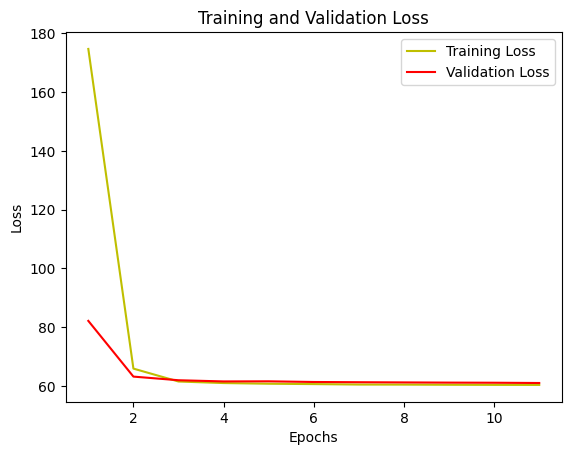


---------------------------------------------------------------------------

Epoch 1/11
447/477 [===========================>..] - ETA: 0s - loss: 174.7952
Epoch 1: val_loss improved from inf to 82.54541, saving model to best_model.h5
477/477 [==============================] - 2s 2ms/step - loss: 169.3519 - val_loss: 82.5454
Epoch 2/11
 88/477 [====>.........................] - ETA: 0s - loss: 78.1932

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


476/477 [============================>.] - ETA: 0s - loss: 67.9878
Epoch 2: val_loss improved from 82.54541 to 63.14011, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.9531 - val_loss: 63.1401
Epoch 3/11
463/477 [============================>.] - ETA: 0s - loss: 62.3720
Epoch 3: val_loss improved from 63.14011 to 61.88526, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.3708 - val_loss: 61.8853
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.2634
Epoch 4: val_loss improved from 61.88526 to 60.91784, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.3683 - val_loss: 60.9178
Epoch 5/11
461/477 [===========================>..] - ETA: 0s - loss: 61.0250
Epoch 5: val_loss improved from 60.91784 to 60.77933, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.8669 - val_loss: 60.7793

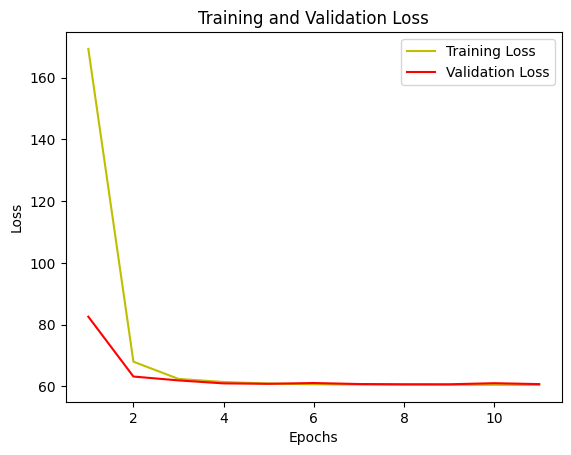


---------------------------------------------------------------------------

Epoch 1/11
447/477 [===========================>..] - ETA: 0s - loss: 166.2229
Epoch 1: val_loss improved from inf to 74.31779, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 160.3947 - val_loss: 74.3178
Epoch 2/11
 91/477 [====>.........................] - ETA: 0s - loss: 69.5742

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/477 [===========================>..] - ETA: 0s - loss: 66.9903
Epoch 2: val_loss improved from 74.31779 to 64.55127, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.1097 - val_loss: 64.5513
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.2699
Epoch 3: val_loss improved from 64.55127 to 62.35966, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 63.2277 - val_loss: 62.3597
Epoch 4/11
454/477 [===========================>..] - ETA: 0s - loss: 61.7130
Epoch 4: val_loss improved from 62.35966 to 61.37515, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.8457 - val_loss: 61.3751
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 61.2466
Epoch 5: val_loss improved from 61.37515 to 60.86553, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.2330 - val_loss: 60.8655

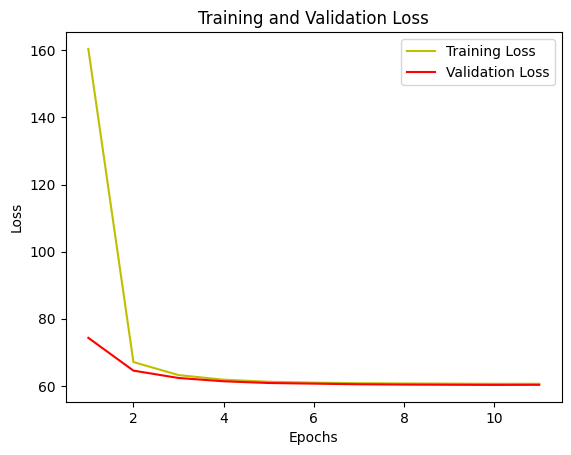


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 211.2309
Epoch 1: val_loss improved from inf to 119.77776, saving model to best_model.h5
477/477 [==============================] - 6s 3ms/step - loss: 210.1660 - val_loss: 119.7778
Epoch 2/11
 82/477 [====>.........................] - ETA: 0s - loss: 104.5127

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 79.5556
Epoch 2: val_loss improved from 119.77776 to 67.87882, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 79.4218 - val_loss: 67.8788
Epoch 3/11
454/477 [===========================>..] - ETA: 0s - loss: 63.7091
Epoch 3: val_loss improved from 67.87882 to 63.08016, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 63.6875 - val_loss: 63.0802
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.5164
Epoch 4: val_loss improved from 63.08016 to 61.89580, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.3967 - val_loss: 61.8958
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 60.9224
Epoch 5: val_loss improved from 61.89580 to 61.56652, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.9100 - val_loss: 61.566

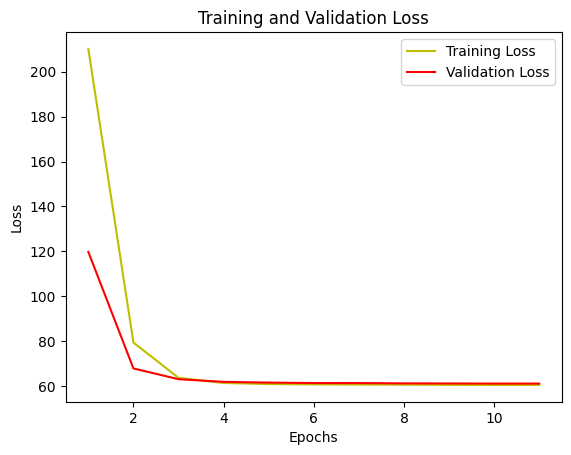


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 173.2964
Epoch 1: val_loss improved from inf to 94.02173, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 170.8951 - val_loss: 94.0217
Epoch 2/11
 87/477 [====>.........................] - ETA: 0s - loss: 83.7369

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/477 [===========================>..] - ETA: 0s - loss: 77.9050
Epoch 2: val_loss improved from 94.02173 to 69.76598, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 77.4424 - val_loss: 69.7660
Epoch 3/11
454/477 [===========================>..] - ETA: 0s - loss: 67.0644
Epoch 3: val_loss improved from 69.76598 to 64.65019, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 66.8951 - val_loss: 64.6502
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 63.6913
Epoch 4: val_loss improved from 64.65019 to 62.49070, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.6386 - val_loss: 62.4907
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 62.0967
Epoch 5: val_loss improved from 62.49070 to 61.38543, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0967 - val_loss: 61.3854

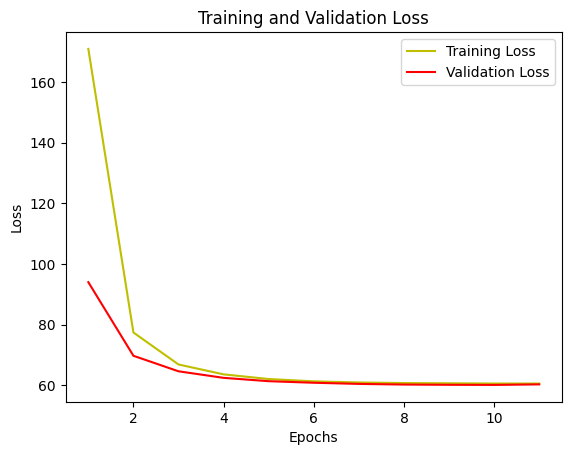


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 171.7912
Epoch 1: val_loss improved from inf to 90.04404, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 169.7777 - val_loss: 90.0440
Epoch 2/11
 58/477 [==>...........................] - ETA: 1s - loss: 91.2426

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/477 [===========================>..] - ETA: 0s - loss: 74.1305
Epoch 2: val_loss improved from 90.04404 to 63.85824, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 74.1536 - val_loss: 63.8582
Epoch 3/11
464/477 [============================>.] - ETA: 0s - loss: 63.8047
Epoch 3: val_loss improved from 63.85824 to 60.01819, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4899 - val_loss: 60.0182
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.7413
Epoch 4: val_loss improved from 60.01819 to 59.09312, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.7428 - val_loss: 59.0931
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 61.2181
Epoch 5: val_loss improved from 59.09312 to 58.77045, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1689 - val_loss: 58.7704

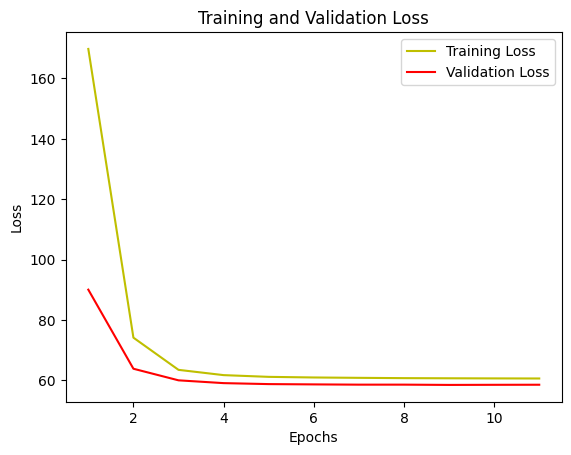


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 141.5052
Epoch 1: val_loss improved from inf to 72.71249, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 140.4968 - val_loss: 72.7125
Epoch 2/11
 39/477 [=>............................] - ETA: 1s - loss: 65.4810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/477 [===========================>..] - ETA: 0s - loss: 66.7343
Epoch 2: val_loss improved from 72.71249 to 65.78890, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.6256 - val_loss: 65.7889
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.1799
Epoch 3: val_loss improved from 65.78890 to 63.88798, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.0842 - val_loss: 63.8880
Epoch 4/11
457/477 [===========================>..] - ETA: 0s - loss: 61.6511
Epoch 4: val_loss improved from 63.88798 to 63.06205, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.7958 - val_loss: 63.0621
Epoch 5/11
454/477 [===========================>..] - ETA: 0s - loss: 60.8445
Epoch 5: val_loss improved from 63.06205 to 62.69364, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.1738 - val_loss: 62.6936

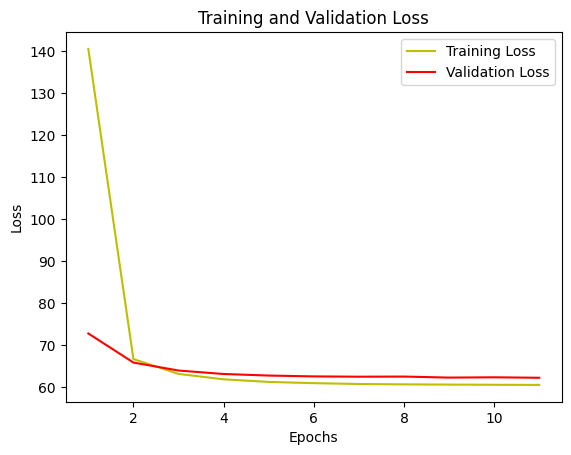


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 157.7055
Epoch 1: val_loss improved from inf to 69.44443, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 154.9212 - val_loss: 69.4444
Epoch 2/11
 55/477 [==>...........................] - ETA: 1s - loss: 71.2285

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/477 [============================>.] - ETA: 0s - loss: 64.2963
Epoch 2: val_loss improved from 69.44443 to 64.80105, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.2377 - val_loss: 64.8010
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 61.8976
Epoch 3: val_loss improved from 64.80105 to 63.45886, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.7960 - val_loss: 63.4589
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 61.2163
Epoch 4: val_loss improved from 63.45886 to 62.96246, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 60.9991 - val_loss: 62.9625
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.4942
Epoch 5: val_loss improved from 62.96246 to 62.57489, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.6146 - val_loss: 62.5749

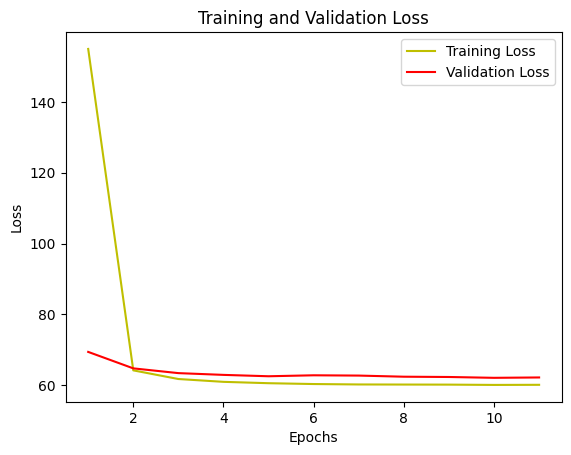


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 200.6591
Epoch 1: val_loss improved from inf to 80.57451, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 198.4377 - val_loss: 80.5745
Epoch 2/11
 72/477 [===>..........................] - ETA: 0s - loss: 76.5583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 65.9596
Epoch 2: val_loss improved from 80.57451 to 63.85675, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 65.9596 - val_loss: 63.8568
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 62.2186
Epoch 3: val_loss improved from 63.85675 to 62.23078, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.8509 - val_loss: 62.2308
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.0509
Epoch 4: val_loss improved from 62.23078 to 61.55205, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.9296 - val_loss: 61.5520
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.3771
Epoch 5: val_loss improved from 61.55205 to 61.25616, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.4538 - val_loss: 61.2562

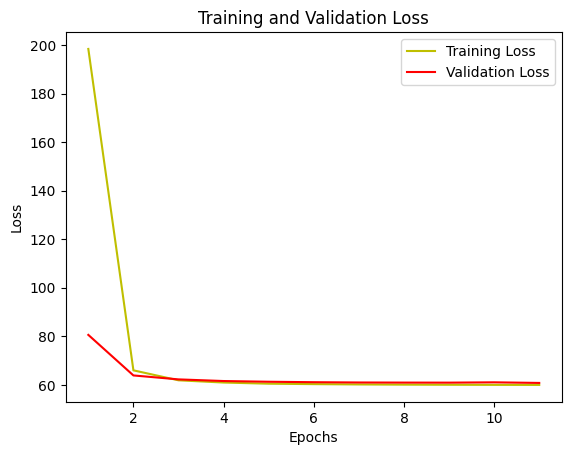


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 233.3263
Epoch 1: val_loss improved from inf to 140.05359, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 231.0419 - val_loss: 140.0536
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 126.0352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/477 [===========================>..] - ETA: 0s - loss: 88.4151
Epoch 2: val_loss improved from 140.05359 to 66.21709, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 87.6938 - val_loss: 66.2171
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 65.9168
Epoch 3: val_loss improved from 66.21709 to 61.60279, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.7978 - val_loss: 61.6028
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 63.0482
Epoch 4: val_loss improved from 61.60279 to 59.87996, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.1360 - val_loss: 59.8800
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 62.2480
Epoch 5: val_loss improved from 59.87996 to 59.08830, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1206 - val_loss: 59.088

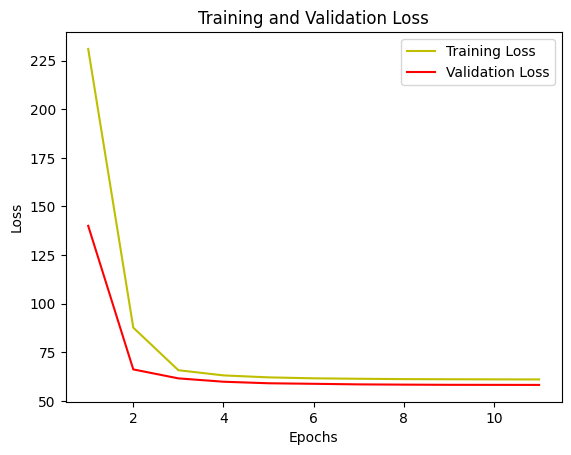


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 166.4474
Epoch 1: val_loss improved from inf to 77.39915, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 165.6647 - val_loss: 77.3992
Epoch 2/11
 87/477 [====>.........................] - ETA: 0s - loss: 70.1813

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 68.3731
Epoch 2: val_loss improved from 77.39915 to 66.71917, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 68.3918 - val_loss: 66.7192
Epoch 3/11
450/477 [===========================>..] - ETA: 0s - loss: 63.6163
Epoch 3: val_loss improved from 66.71917 to 64.51797, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 63.3449 - val_loss: 64.5180
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 61.9684
Epoch 4: val_loss improved from 64.51797 to 63.71082, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.9684 - val_loss: 63.7108
Epoch 5/11
456/477 [===========================>..] - ETA: 0s - loss: 61.3890
Epoch 5: val_loss improved from 63.71082 to 63.32872, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.4034 - val_loss: 63.3287

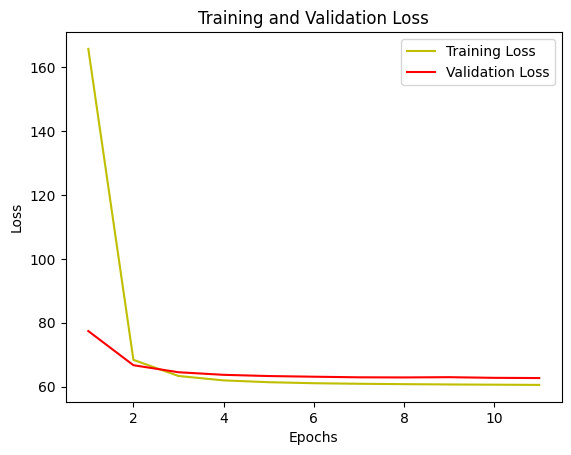


---------------------------------------------------------------------------

Epoch 1/11
455/477 [===========================>..] - ETA: 0s - loss: 151.3570
Epoch 1: val_loss improved from inf to 77.34513, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 147.7633 - val_loss: 77.3451
Epoch 2/11
 82/477 [====>.........................] - ETA: 0s - loss: 67.0453

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


457/477 [===========================>..] - ETA: 0s - loss: 67.8650
Epoch 2: val_loss improved from 77.34513 to 69.34068, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.6147 - val_loss: 69.3407
Epoch 3/11
462/477 [============================>.] - ETA: 0s - loss: 63.1841
Epoch 3: val_loss improved from 69.34068 to 66.92162, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.1220 - val_loss: 66.9216
Epoch 4/11
471/477 [============================>.] - ETA: 0s - loss: 61.5819
Epoch 4: val_loss improved from 66.92162 to 65.84109, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5350 - val_loss: 65.8411
Epoch 5/11
470/477 [============================>.] - ETA: 0s - loss: 60.7778
Epoch 5: val_loss improved from 65.84109 to 65.37347, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7811 - val_loss: 65.3735

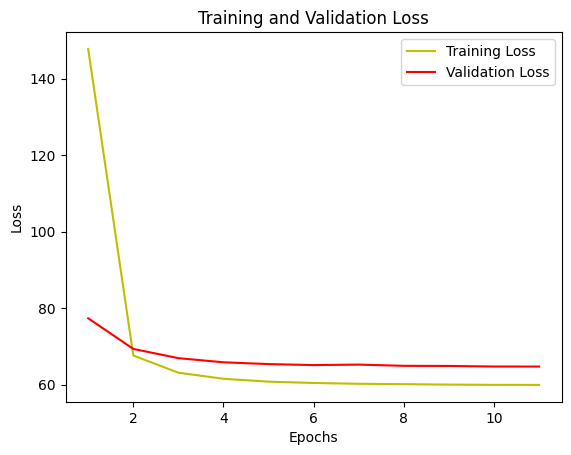


---------------------------------------------------------------------------

Epoch 1/11
456/477 [===========================>..] - ETA: 0s - loss: 169.9637
Epoch 1: val_loss improved from inf to 85.02966, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 166.3579 - val_loss: 85.0297
Epoch 2/11
 74/477 [===>..........................] - ETA: 0s - loss: 85.6394

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/477 [===========================>..] - ETA: 0s - loss: 69.8987
Epoch 2: val_loss improved from 85.02966 to 61.62729, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 69.8410 - val_loss: 61.6273
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 61.9972
Epoch 3: val_loss improved from 61.62729 to 60.07442, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1711 - val_loss: 60.0744
Epoch 4/11
457/477 [===========================>..] - ETA: 0s - loss: 61.1027
Epoch 4: val_loss improved from 60.07442 to 59.62461, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.2742 - val_loss: 59.6246
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.9222
Epoch 5: val_loss improved from 59.62461 to 59.44825, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.9176 - val_loss: 59.4483

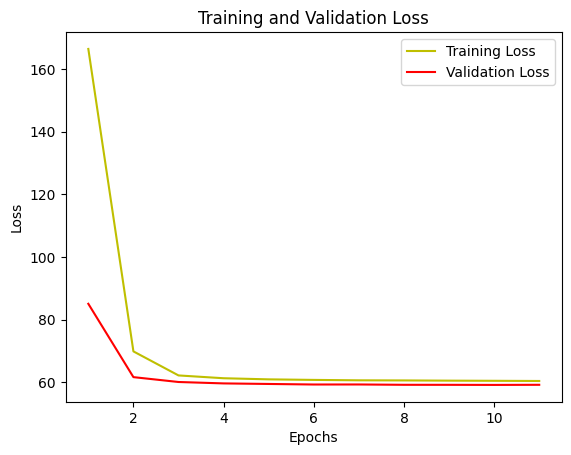


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 210.3247
Epoch 1: val_loss improved from inf to 102.96249, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 208.3291 - val_loss: 102.9625
Epoch 2/11
 84/477 [====>.........................] - ETA: 0s - loss: 84.9610

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


456/477 [===========================>..] - ETA: 0s - loss: 71.5418
Epoch 2: val_loss improved from 102.96249 to 65.85252, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 71.0784 - val_loss: 65.8525
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 62.8681
Epoch 3: val_loss improved from 65.85252 to 64.46835, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7212 - val_loss: 64.4684
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.2747
Epoch 4: val_loss improved from 64.46835 to 63.79532, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5886 - val_loss: 63.7953
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.1194
Epoch 5: val_loss improved from 63.79532 to 63.39046, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0416 - val_loss: 63.390

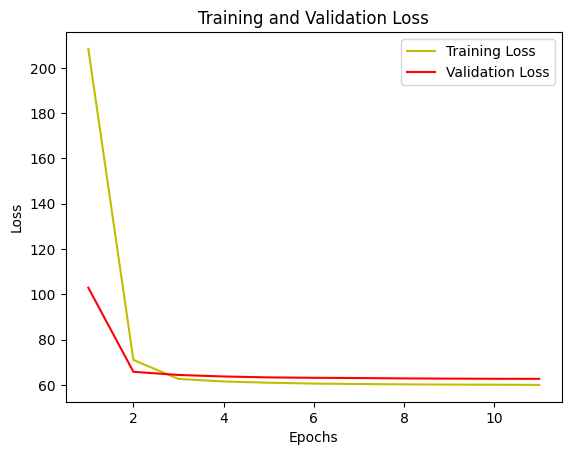


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 161.0323
Epoch 1: val_loss improved from inf to 70.75751, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 160.1007 - val_loss: 70.7575
Epoch 2/11
 87/477 [====>.........................] - ETA: 0s - loss: 64.3889

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/477 [===========================>..] - ETA: 0s - loss: 63.6406
Epoch 2: val_loss improved from 70.75751 to 65.33024, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 63.7236 - val_loss: 65.3302
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 61.8070
Epoch 3: val_loss improved from 65.33024 to 64.45141, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.6362 - val_loss: 64.4514
Epoch 4/11
476/477 [============================>.] - ETA: 0s - loss: 60.9263
Epoch 4: val_loss improved from 64.45141 to 63.91803, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.9227 - val_loss: 63.9180
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.3963
Epoch 5: val_loss improved from 63.91803 to 63.51058, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 60.5635 - val_loss: 63.5106

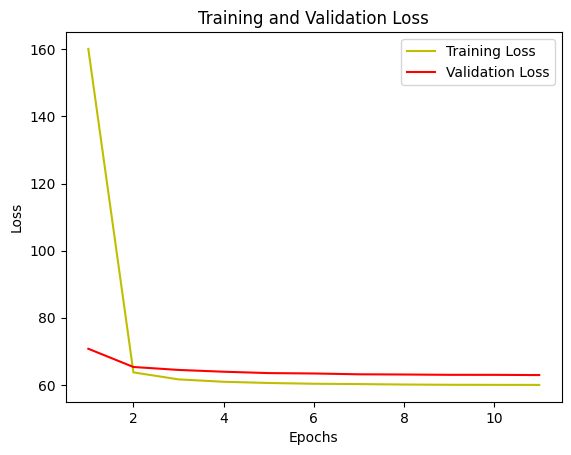


---------------------------------------------------------------------------

Epoch 1/11
476/477 [============================>.] - ETA: 0s - loss: 162.2480
Epoch 1: val_loss improved from inf to 79.95580, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 162.0750 - val_loss: 79.9558
Epoch 2/11
 31/477 [>.............................] - ETA: 1s - loss: 77.0182

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/477 [===========================>..] - ETA: 0s - loss: 70.2117
Epoch 2: val_loss improved from 79.95580 to 67.67728, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 69.7396 - val_loss: 67.6773
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.5157
Epoch 3: val_loss improved from 67.67728 to 63.62107, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 63.6058 - val_loss: 63.6211
Epoch 4/11
461/477 [===========================>..] - ETA: 0s - loss: 61.8318
Epoch 4: val_loss improved from 63.62107 to 62.29109, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.6468 - val_loss: 62.2911
Epoch 5/11
454/477 [===========================>..] - ETA: 0s - loss: 61.1831
Epoch 5: val_loss improved from 62.29109 to 61.90967, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 61.1177 - val_loss: 61.9097

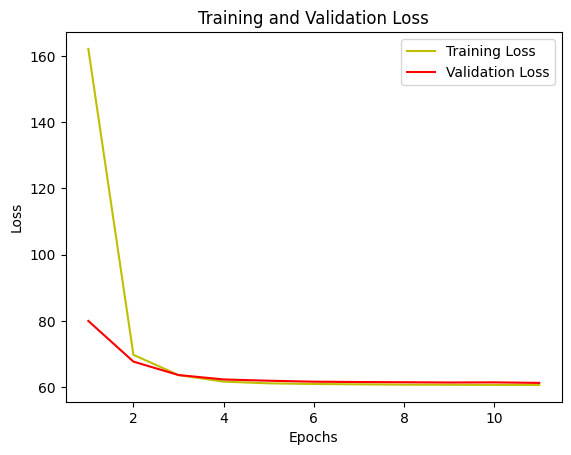


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 149.2593
Epoch 1: val_loss improved from inf to 73.30592, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 147.7619 - val_loss: 73.3059
Epoch 2/11
 79/477 [===>..........................] - ETA: 0s - loss: 74.5030

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 67.2931
Epoch 2: val_loss improved from 73.30592 to 65.37894, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 67.5529 - val_loss: 65.3789
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 62.9957
Epoch 3: val_loss improved from 65.37894 to 62.68705, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8710 - val_loss: 62.6871
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 61.4458
Epoch 4: val_loss improved from 62.68705 to 61.74522, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.2988 - val_loss: 61.7452
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 60.6629
Epoch 5: val_loss improved from 61.74522 to 61.33176, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7330 - val_loss: 61.3318

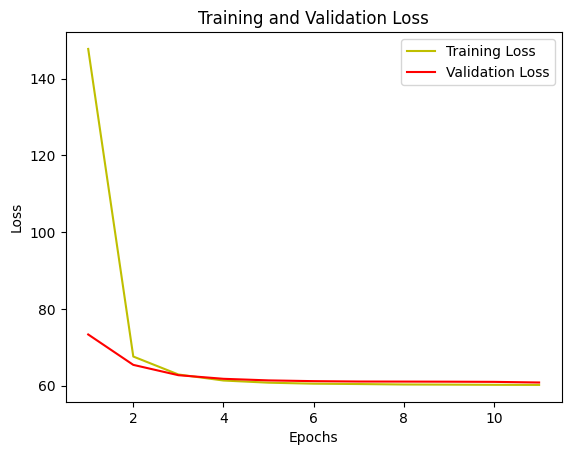


---------------------------------------------------------------------------

Epoch 1/11
460/477 [===========================>..] - ETA: 0s - loss: 245.1873
Epoch 1: val_loss improved from inf to 160.03635, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 242.3456 - val_loss: 160.0363
Epoch 2/11
 74/477 [===>..........................] - ETA: 0s - loss: 141.9675

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/477 [===========================>..] - ETA: 0s - loss: 92.7995
Epoch 2: val_loss improved from 160.03635 to 61.59756, saving model to best_model.h5
477/477 [==============================] - 1s 2ms/step - loss: 91.7310 - val_loss: 61.5976
Epoch 3/11
460/477 [===========================>..] - ETA: 0s - loss: 63.8678
Epoch 3: val_loss improved from 61.59756 to 58.84206, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.9958 - val_loss: 58.8421
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.4674
Epoch 4: val_loss improved from 58.84206 to 58.07882, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7265 - val_loss: 58.0788
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 62.4386
Epoch 5: val_loss improved from 58.07882 to 57.74631, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.2387 - val_loss: 57.746

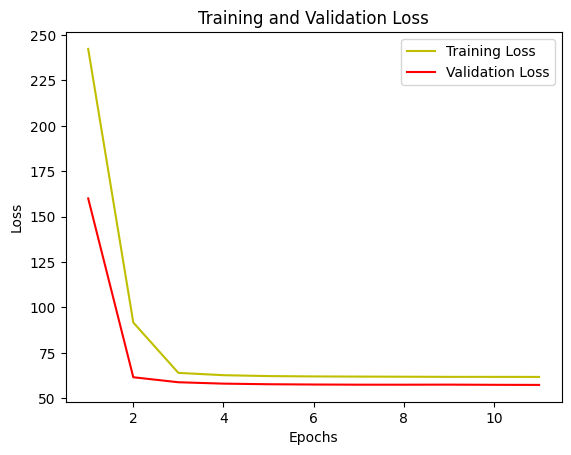


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 163.4831
Epoch 1: val_loss improved from inf to 71.34976, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 163.2157 - val_loss: 71.3498
Epoch 2/11
 42/477 [=>............................] - ETA: 1s - loss: 64.8485

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 64.3467
Epoch 2: val_loss improved from 71.34976 to 62.98704, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.5045 - val_loss: 62.9870
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 61.2373
Epoch 3: val_loss improved from 62.98704 to 61.94348, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3899 - val_loss: 61.9435
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 60.5625
Epoch 4: val_loss improved from 61.94348 to 61.78291, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.6321 - val_loss: 61.7829
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.3829
Epoch 5: val_loss improved from 61.78291 to 61.43167, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.3416 - val_loss: 61.4317

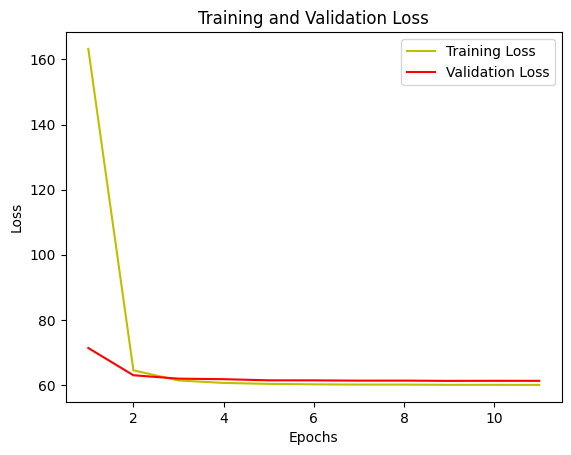


---------------------------------------------------------------------------

Epoch 1/11
457/477 [===========================>..] - ETA: 0s - loss: 184.0551
Epoch 1: val_loss improved from inf to 82.75525, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 179.3446 - val_loss: 82.7552
Epoch 2/11
 46/477 [=>............................] - ETA: 1s - loss: 74.1727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 66.6152
Epoch 2: val_loss improved from 82.75525 to 65.77914, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 66.7020 - val_loss: 65.7791
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 62.0044
Epoch 3: val_loss improved from 65.77914 to 63.95766, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0132 - val_loss: 63.9577
Epoch 4/11
461/477 [===========================>..] - ETA: 0s - loss: 60.6035
Epoch 4: val_loss improved from 63.95766 to 63.03860, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.7246 - val_loss: 63.0386
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.2239
Epoch 5: val_loss improved from 63.03860 to 62.79969, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.2097 - val_loss: 62.7997

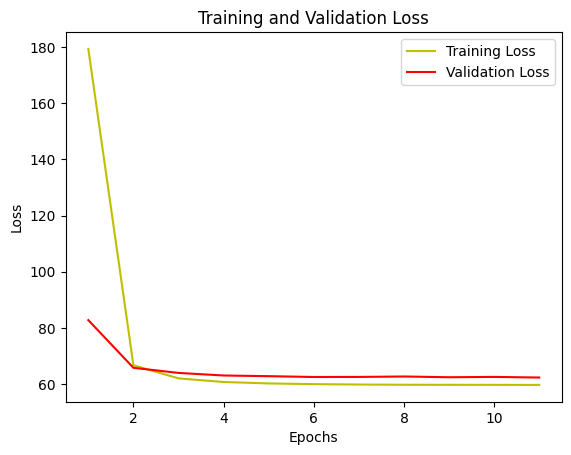


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 179.8092
Epoch 1: val_loss improved from inf to 89.07531, saving model to best_model.h5
477/477 [==============================] - 5s 8ms/step - loss: 179.8092 - val_loss: 89.0753
Epoch 2/11
 23/477 [>.............................] - ETA: 2s - loss: 81.8898

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


462/477 [============================>.] - ETA: 0s - loss: 69.0701
Epoch 2: val_loss improved from 89.07531 to 63.22892, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 68.5202 - val_loss: 63.2289
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 62.0026
Epoch 3: val_loss improved from 63.22892 to 61.82595, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1021 - val_loss: 61.8259
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 61.3423
Epoch 4: val_loss improved from 61.82595 to 61.34010, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.2469 - val_loss: 61.3401
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 60.9815
Epoch 5: val_loss improved from 61.34010 to 61.15407, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 60.9815 - val_loss: 61.1541

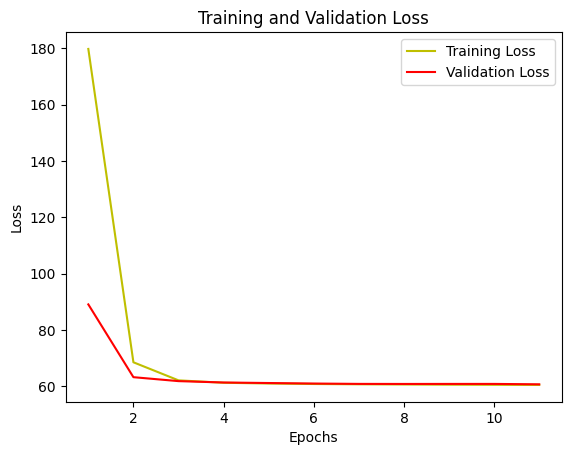


---------------------------------------------------------------------------

Epoch 1/11
471/477 [============================>.] - ETA: 0s - loss: 180.1600
Epoch 1: val_loss improved from inf to 71.65247, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 178.8750 - val_loss: 71.6525
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 74.2190

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 66.5592
Epoch 2: val_loss improved from 71.65247 to 63.57177, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 66.5448 - val_loss: 63.5718
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 63.4714
Epoch 3: val_loss improved from 63.57177 to 62.03936, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 63.4000 - val_loss: 62.0394
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 62.4173
Epoch 4: val_loss improved from 62.03936 to 61.38761, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 62.2638 - val_loss: 61.3876
Epoch 5/11
457/477 [===========================>..] - ETA: 0s - loss: 61.9818
Epoch 5: val_loss improved from 61.38761 to 60.96778, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.7048 - val_loss: 60.9678

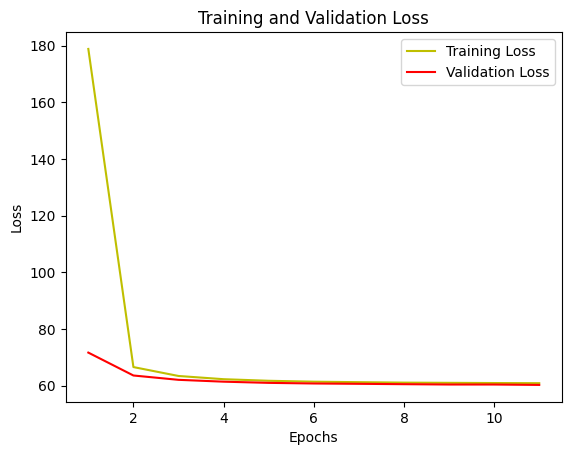


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 154.4245
Epoch 1: val_loss improved from inf to 77.57793, saving model to best_model.h5
477/477 [==============================] - 4s 5ms/step - loss: 153.8236 - val_loss: 77.5779
Epoch 2/11
 18/477 [>.............................] - ETA: 2s - loss: 66.3478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


476/477 [============================>.] - ETA: 0s - loss: 67.6304
Epoch 2: val_loss improved from 77.57793 to 67.59356, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 67.6412 - val_loss: 67.5936
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 63.4259
Epoch 3: val_loss improved from 67.59356 to 64.96413, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 63.3229 - val_loss: 64.9641
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.7154
Epoch 4: val_loss improved from 64.96413 to 63.89322, saving model to best_model.h5
477/477 [==============================] - 4s 9ms/step - loss: 61.8209 - val_loss: 63.8932
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 61.1650
Epoch 5: val_loss improved from 63.89322 to 63.57439, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1921 - val_loss: 63.5744

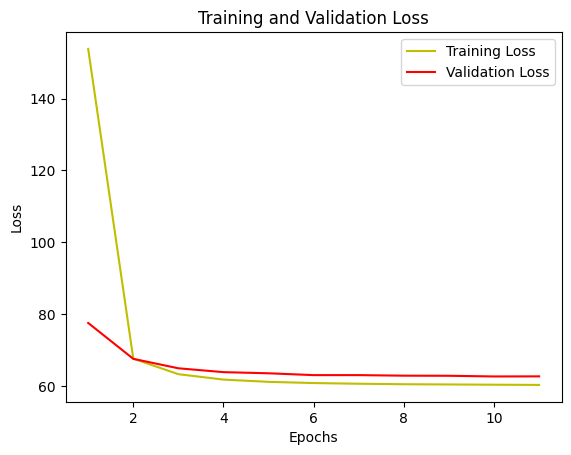


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 192.0053
Epoch 1: val_loss improved from inf to 105.15438, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 191.2526 - val_loss: 105.1544
Epoch 2/11
 65/477 [===>..........................] - ETA: 0s - loss: 100.3422

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/477 [============================>.] - ETA: 0s - loss: 79.0506
Epoch 2: val_loss improved from 105.15438 to 68.51501, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 78.7810 - val_loss: 68.5150
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 64.4102
Epoch 3: val_loss improved from 68.51501 to 64.11582, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.3196 - val_loss: 64.1158
Epoch 4/11
471/477 [============================>.] - ETA: 0s - loss: 61.9563
Epoch 4: val_loss improved from 64.11582 to 62.71254, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9384 - val_loss: 62.7125
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.2693
Epoch 5: val_loss improved from 62.71254 to 62.28043, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.2072 - val_loss: 62.280

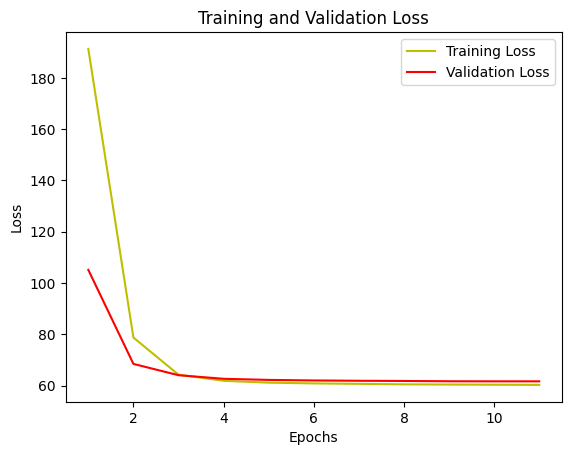


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 177.8402
Epoch 1: val_loss improved from inf to 77.67569, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 175.4202 - val_loss: 77.6757
Epoch 2/11
 77/477 [===>..........................] - ETA: 0s - loss: 75.5443

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/477 [===========================>..] - ETA: 0s - loss: 69.4795
Epoch 2: val_loss improved from 77.67569 to 63.07360, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 69.2531 - val_loss: 63.0736
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 63.9684
Epoch 3: val_loss improved from 63.07360 to 60.74244, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.0494 - val_loss: 60.7424
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 62.8257
Epoch 4: val_loss improved from 60.74244 to 59.81498, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.6560 - val_loss: 59.8150
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 62.1094
Epoch 5: val_loss improved from 59.81498 to 59.16723, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9971 - val_loss: 59.1672

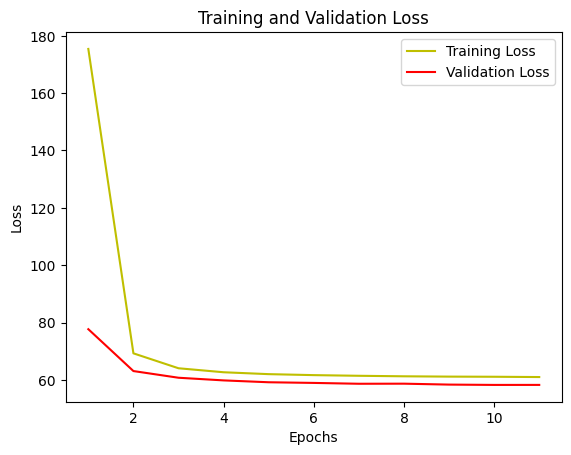


---------------------------------------------------------------------------

Epoch 1/11
459/477 [===========================>..] - ETA: 0s - loss: 200.8310
Epoch 1: val_loss improved from inf to 88.31735, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 196.3358 - val_loss: 88.3174
Epoch 2/11
 67/477 [===>..........................] - ETA: 0s - loss: 82.6954

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 70.3050
Epoch 2: val_loss improved from 88.31735 to 65.11860, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.2914 - val_loss: 65.1186
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 64.0131
Epoch 3: val_loss improved from 65.11860 to 62.85769, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.0131 - val_loss: 62.8577
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 62.4080
Epoch 4: val_loss improved from 62.85769 to 61.83249, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.4342 - val_loss: 61.8325
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 61.5367
Epoch 5: val_loss improved from 61.83249 to 61.38565, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6711 - val_loss: 61.3857

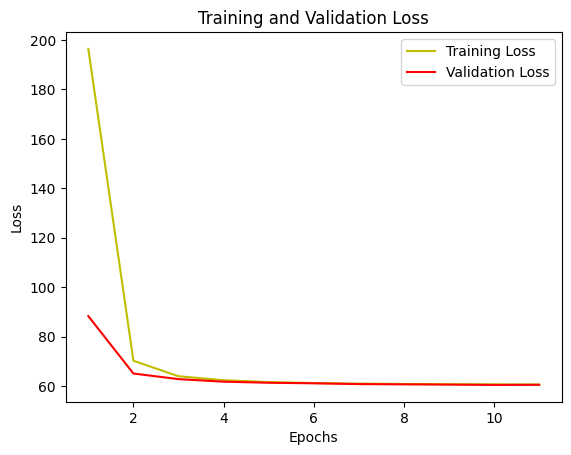


---------------------------------------------------------------------------

Epoch 1/11
456/477 [===========================>..] - ETA: 0s - loss: 191.4473
Epoch 1: val_loss improved from inf to 99.38694, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 187.7308 - val_loss: 99.3869
Epoch 2/11
 59/477 [==>...........................] - ETA: 1s - loss: 96.1909

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 74.0067
Epoch 2: val_loss improved from 99.38694 to 65.47441, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 73.9124 - val_loss: 65.4744
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 63.8633
Epoch 3: val_loss improved from 65.47441 to 62.01617, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.9738 - val_loss: 62.0162
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 61.7575
Epoch 4: val_loss improved from 62.01617 to 60.82132, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.7447 - val_loss: 60.8213
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 61.0301
Epoch 5: val_loss improved from 60.82132 to 60.32542, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.8723 - val_loss: 60.3254

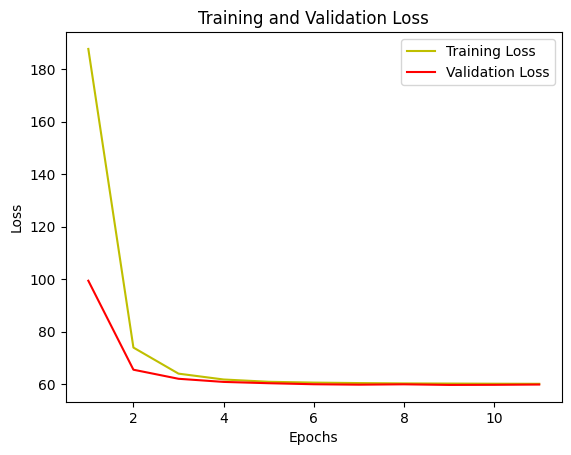


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 154.5112
Epoch 1: val_loss improved from inf to 75.69234, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 153.1040 - val_loss: 75.6923
Epoch 2/11
 51/477 [==>...........................] - ETA: 1s - loss: 75.8769

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 69.5818
Epoch 2: val_loss improved from 75.69234 to 65.68540, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 69.4581 - val_loss: 65.6854
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.9874
Epoch 3: val_loss improved from 65.68540 to 62.18252, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 63.8915 - val_loss: 62.1825
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 61.9989
Epoch 4: val_loss improved from 62.18252 to 61.22085, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0925 - val_loss: 61.2208
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 61.3938
Epoch 5: val_loss improved from 61.22085 to 60.66489, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5027 - val_loss: 60.6649

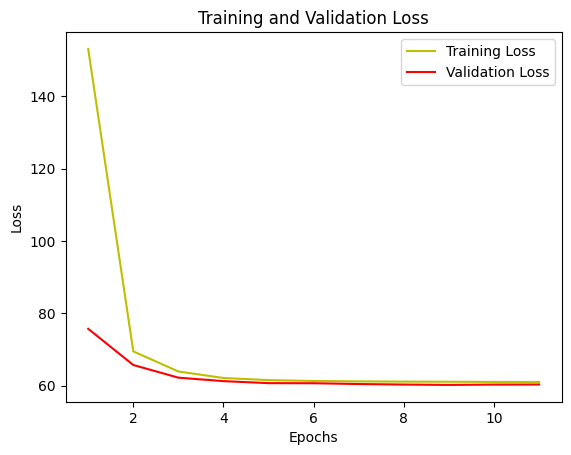


---------------------------------------------------------------------------

Epoch 1/11
465/477 [============================>.] - ETA: 0s - loss: 201.7440
Epoch 1: val_loss improved from inf to 85.17247, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 198.6234 - val_loss: 85.1725
Epoch 2/11
 49/477 [==>...........................] - ETA: 1s - loss: 83.3832

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 69.4963
Epoch 2: val_loss improved from 85.17247 to 61.57159, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 69.4019 - val_loss: 61.5716
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 62.7812
Epoch 3: val_loss improved from 61.57159 to 59.67077, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.8054 - val_loss: 59.6708
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 61.5961
Epoch 4: val_loss improved from 59.67077 to 59.12188, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.6944 - val_loss: 59.1219
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 61.1189
Epoch 5: val_loss improved from 59.12188 to 58.85172, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 61.3545 - val_loss: 58.8517

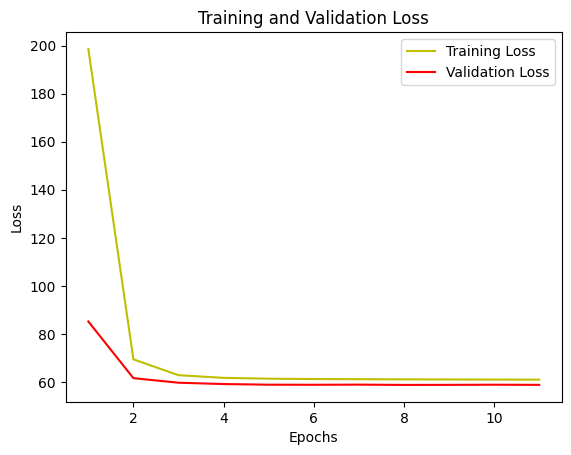


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 172.6615
Epoch 1: val_loss improved from inf to 83.22162, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 171.0265 - val_loss: 83.2216
Epoch 2/11
 43/477 [=>............................] - ETA: 1s - loss: 83.0076

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 68.2135
Epoch 2: val_loss improved from 83.22162 to 64.66768, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 68.0871 - val_loss: 64.6677
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 62.1696
Epoch 3: val_loss improved from 64.66768 to 62.51956, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 62.2091 - val_loss: 62.5196
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 60.9345
Epoch 4: val_loss improved from 62.51956 to 61.63889, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.0331 - val_loss: 61.6389
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 60.6160
Epoch 5: val_loss improved from 61.63889 to 61.17576, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.5623 - val_loss: 61.1758

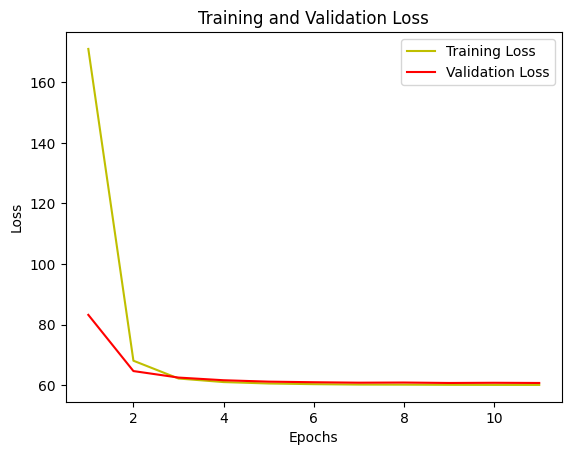


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 187.5890
Epoch 1: val_loss improved from inf to 74.27589, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 184.3642 - val_loss: 74.2759
Epoch 2/11
 29/477 [>.............................] - ETA: 1s - loss: 70.3207

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 69.6364
Epoch 2: val_loss improved from 74.27589 to 62.96601, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.5783 - val_loss: 62.9660
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 65.0513
Epoch 3: val_loss improved from 62.96601 to 60.72073, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.9322 - val_loss: 60.7207
Epoch 4/11
476/477 [============================>.] - ETA: 0s - loss: 62.9913
Epoch 4: val_loss improved from 60.72073 to 59.70721, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.9775 - val_loss: 59.7072
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 62.1193
Epoch 5: val_loss improved from 59.70721 to 59.25967, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.0369 - val_loss: 59.2597

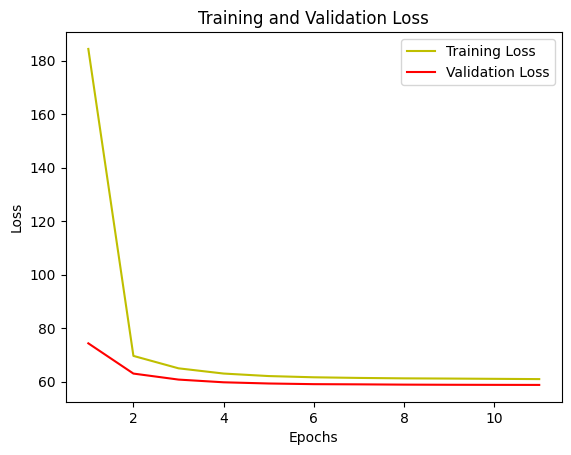


---------------------------------------------------------------------------

Epoch 1/11
476/477 [============================>.] - ETA: 0s - loss: 194.6156
Epoch 1: val_loss improved from inf to 78.38976, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 194.3500 - val_loss: 78.3898
Epoch 2/11
 69/477 [===>..........................] - ETA: 0s - loss: 69.9597

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 68.2013
Epoch 2: val_loss improved from 78.38976 to 61.87226, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 68.2731 - val_loss: 61.8723
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 64.1134
Epoch 3: val_loss improved from 61.87226 to 59.65472, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.1373 - val_loss: 59.6547
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.7401
Epoch 4: val_loss improved from 59.65472 to 58.60540, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8429 - val_loss: 58.6054
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 62.1040
Epoch 5: val_loss improved from 58.60540 to 58.06056, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.0718 - val_loss: 58.0606

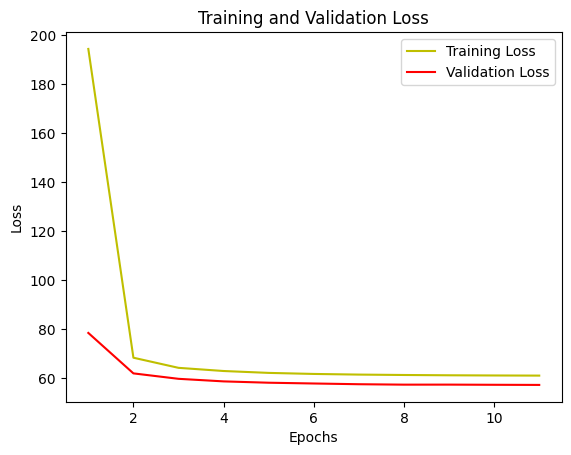


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 147.0447
Epoch 1: val_loss improved from inf to 74.09006, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 146.4703 - val_loss: 74.0901
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 66.0310

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 66.9958
Epoch 2: val_loss improved from 74.09006 to 65.84945, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.9792 - val_loss: 65.8494
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 62.9094
Epoch 3: val_loss improved from 65.84945 to 63.46933, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8286 - val_loss: 63.4693
Epoch 4/11
462/477 [============================>.] - ETA: 0s - loss: 60.8743
Epoch 4: val_loss improved from 63.46933 to 62.41531, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.0701 - val_loss: 62.4153
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.3348
Epoch 5: val_loss improved from 62.41531 to 62.03075, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.2186 - val_loss: 62.0308

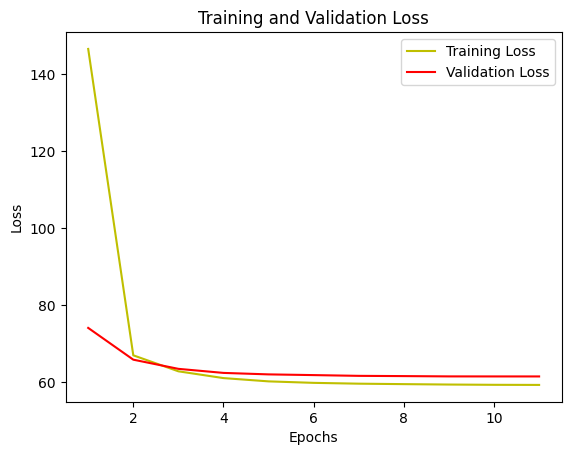


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 174.4238
Epoch 1: val_loss improved from inf to 86.32660, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 174.1414 - val_loss: 86.3266
Epoch 2/11
 69/477 [===>..........................] - ETA: 0s - loss: 82.6321

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 71.3355
Epoch 2: val_loss improved from 86.32660 to 63.93489, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 71.2064 - val_loss: 63.9349
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 63.4512
Epoch 3: val_loss improved from 63.93489 to 61.52566, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.5940 - val_loss: 61.5257
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 61.5897
Epoch 4: val_loss improved from 61.52566 to 60.68056, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8863 - val_loss: 60.6806
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 61.1299
Epoch 5: val_loss improved from 60.68056 to 60.28413, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1342 - val_loss: 60.2841

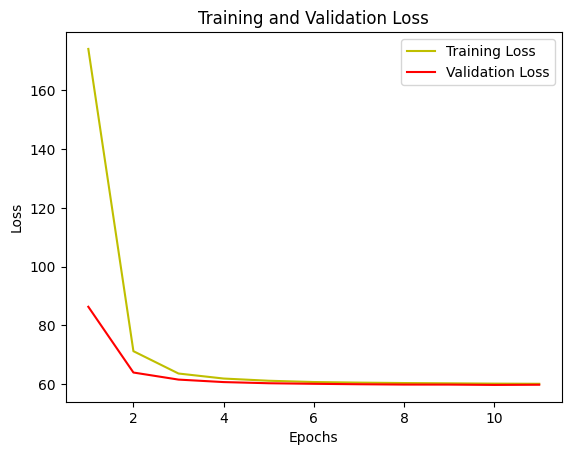


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 177.0983
Epoch 1: val_loss improved from inf to 81.25616, saving model to best_model.h5
477/477 [==============================] - 4s 6ms/step - loss: 176.1767 - val_loss: 81.2562
Epoch 2/11
 43/477 [=>............................] - ETA: 1s - loss: 79.0176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 69.3485
Epoch 2: val_loss improved from 81.25616 to 65.62678, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.2656 - val_loss: 65.6268
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 63.3026
Epoch 3: val_loss improved from 65.62678 to 63.07682, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.4326 - val_loss: 63.0768
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 61.6737
Epoch 4: val_loss improved from 63.07682 to 62.06678, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6833 - val_loss: 62.0668
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 60.9059
Epoch 5: val_loss improved from 62.06678 to 61.78423, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.9059 - val_loss: 61.7842

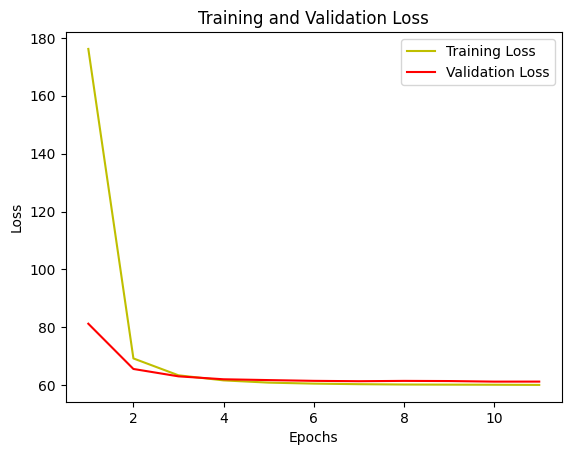


---------------------------------------------------------------------------

Epoch 1/11
455/477 [===========================>..] - ETA: 0s - loss: 184.0385
Epoch 1: val_loss improved from inf to 83.87733, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 179.7158 - val_loss: 83.8773
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 80.0576

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 68.6015
Epoch 2: val_loss improved from 83.87733 to 66.60152, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 68.7987 - val_loss: 66.6015
Epoch 3/11
460/477 [===========================>..] - ETA: 0s - loss: 62.6662
Epoch 3: val_loss improved from 66.60152 to 64.10643, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.7170 - val_loss: 64.1064
Epoch 4/11
476/477 [============================>.] - ETA: 0s - loss: 61.2661
Epoch 4: val_loss improved from 64.10643 to 63.06338, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2530 - val_loss: 63.0634
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 60.6683
Epoch 5: val_loss improved from 63.06338 to 62.81396, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.6683 - val_loss: 62.8140

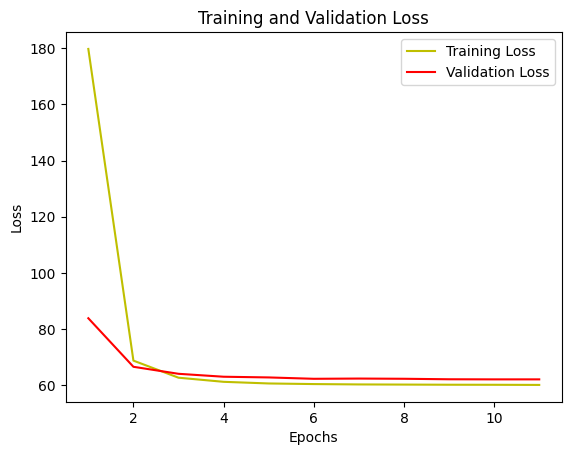


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 184.6769
Epoch 1: val_loss improved from inf to 87.40502, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 184.0960 - val_loss: 87.4050
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 88.7407

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 72.2735
Epoch 2: val_loss improved from 87.40502 to 64.43550, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 72.3669 - val_loss: 64.4355
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 64.8622
Epoch 3: val_loss improved from 64.43550 to 61.44665, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.8204 - val_loss: 61.4467
Epoch 4/11
461/477 [===========================>..] - ETA: 0s - loss: 63.1508
Epoch 4: val_loss improved from 61.44665 to 60.35905, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.9429 - val_loss: 60.3590
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 62.2633
Epoch 5: val_loss improved from 60.35905 to 59.84020, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1655 - val_loss: 59.8402

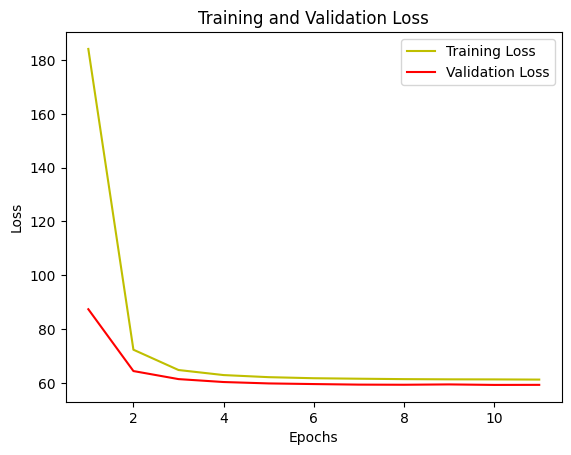


---------------------------------------------------------------------------

Epoch 1/11
458/477 [===========================>..] - ETA: 0s - loss: 172.0319
Epoch 1: val_loss improved from inf to 78.57438, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 168.1851 - val_loss: 78.5744
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 74.3164

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/477 [===========================>..] - ETA: 0s - loss: 66.9745
Epoch 2: val_loss improved from 78.57438 to 66.57975, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.1054 - val_loss: 66.5798
Epoch 3/11
463/477 [============================>.] - ETA: 0s - loss: 62.4827
Epoch 3: val_loss improved from 66.57975 to 64.11101, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.6780 - val_loss: 64.1110
Epoch 4/11
454/477 [===========================>..] - ETA: 0s - loss: 61.3534
Epoch 4: val_loss improved from 64.11101 to 63.08048, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.3299 - val_loss: 63.0805
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 60.6842
Epoch 5: val_loss improved from 63.08048 to 62.57448, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.7889 - val_loss: 62.5745

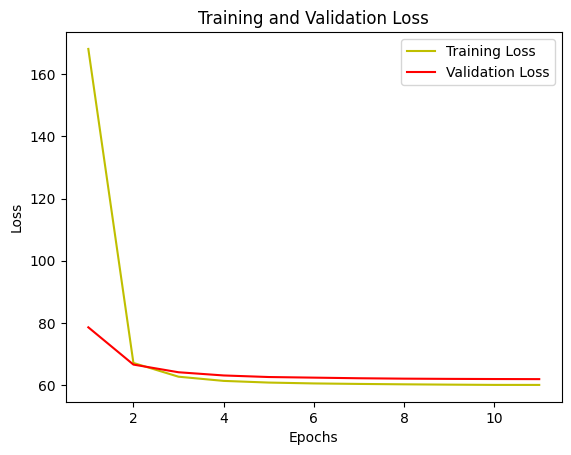


---------------------------------------------------------------------------

Epoch 1/11
456/477 [===========================>..] - ETA: 0s - loss: 155.2867
Epoch 1: val_loss improved from inf to 69.21821, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 151.9697 - val_loss: 69.2182
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 72.2282

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/477 [===========================>..] - ETA: 0s - loss: 67.8429
Epoch 2: val_loss improved from 69.21821 to 61.51416, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.9470 - val_loss: 61.5142
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 64.3695
Epoch 3: val_loss improved from 61.51416 to 59.70718, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.2549 - val_loss: 59.7072
Epoch 4/11
462/477 [============================>.] - ETA: 0s - loss: 62.7970
Epoch 4: val_loss improved from 59.70718 to 58.54435, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8608 - val_loss: 58.5444
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 62.1825
Epoch 5: val_loss improved from 58.54435 to 58.15909, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1811 - val_loss: 58.1591

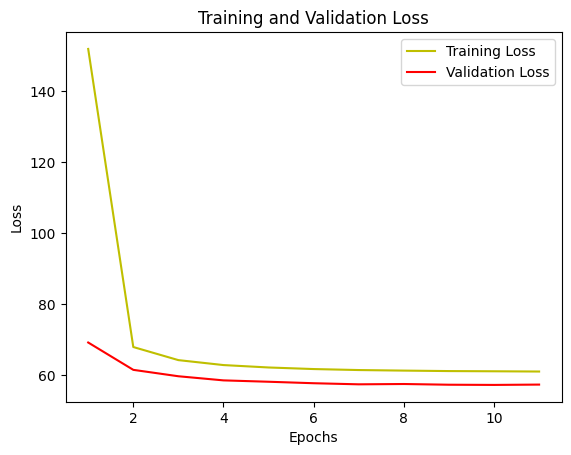


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 156.0414
Epoch 1: val_loss improved from inf to 74.72333, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 153.6549 - val_loss: 74.7233
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 73.7007

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 67.3207
Epoch 2: val_loss improved from 74.72333 to 63.77573, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.3496 - val_loss: 63.7757
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 62.7887
Epoch 3: val_loss improved from 63.77573 to 61.70950, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.7887 - val_loss: 61.7095
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 61.5841
Epoch 4: val_loss improved from 61.70950 to 61.17706, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5337 - val_loss: 61.1771
Epoch 5/11
462/477 [============================>.] - ETA: 0s - loss: 61.0065
Epoch 5: val_loss improved from 61.17706 to 60.72552, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.1108 - val_loss: 60.7255

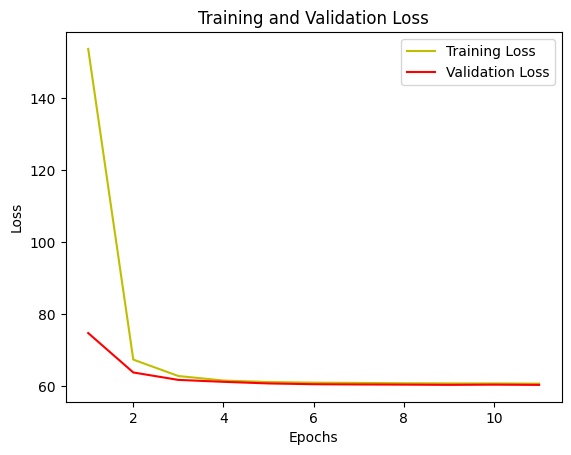


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 176.3403
Epoch 1: val_loss improved from inf to 80.71297, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 173.2214 - val_loss: 80.7130
Epoch 2/11
 70/477 [===>..........................] - ETA: 0s - loss: 72.3173

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


454/477 [===========================>..] - ETA: 0s - loss: 68.7011
Epoch 2: val_loss improved from 80.71297 to 65.59519, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 68.4306 - val_loss: 65.5952
Epoch 3/11
453/477 [===========================>..] - ETA: 0s - loss: 62.3605
Epoch 3: val_loss improved from 65.59519 to 63.41257, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.4608 - val_loss: 63.4126
Epoch 4/11
457/477 [===========================>..] - ETA: 0s - loss: 61.3954
Epoch 4: val_loss improved from 63.41257 to 62.53699, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.1454 - val_loss: 62.5370
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.5581
Epoch 5: val_loss improved from 62.53699 to 62.12377, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.5474 - val_loss: 62.1238

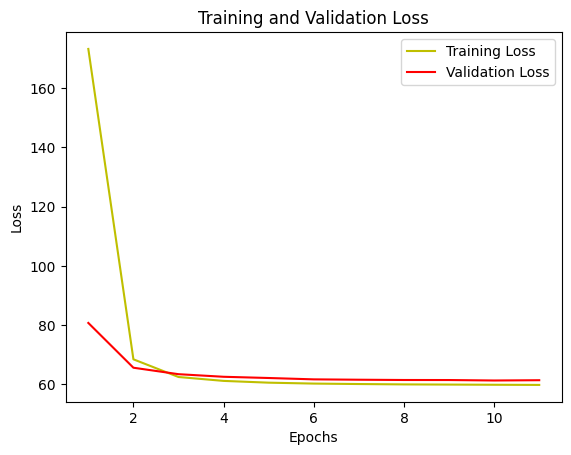


---------------------------------------------------------------------------

Epoch 1/11
457/477 [===========================>..] - ETA: 0s - loss: 179.2440
Epoch 1: val_loss improved from inf to 87.69711, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 175.4821 - val_loss: 87.6971
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 81.2637

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 71.7603
Epoch 2: val_loss improved from 87.69711 to 65.42033, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 71.5675 - val_loss: 65.4203
Epoch 3/11
460/477 [===========================>..] - ETA: 0s - loss: 63.5787
Epoch 3: val_loss improved from 65.42033 to 62.16510, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.6060 - val_loss: 62.1651
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 61.8251
Epoch 4: val_loss improved from 62.16510 to 61.02313, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.8380 - val_loss: 61.0231
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 61.0760
Epoch 5: val_loss improved from 61.02313 to 60.64254, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.1848 - val_loss: 60.6425

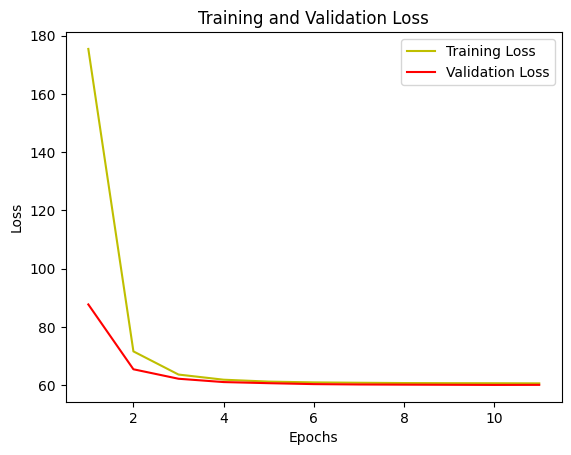


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 176.2354
Epoch 1: val_loss improved from inf to 81.55249, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 174.1386 - val_loss: 81.5525
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 73.7870

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 68.3088
Epoch 2: val_loss improved from 81.55249 to 65.33411, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 68.3088 - val_loss: 65.3341
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 62.8029
Epoch 3: val_loss improved from 65.33411 to 63.99945, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.7525 - val_loss: 63.9995
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 61.5065
Epoch 4: val_loss improved from 63.99945 to 63.48330, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5236 - val_loss: 63.4833
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.0337
Epoch 5: val_loss improved from 63.48330 to 63.24369, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0487 - val_loss: 63.2437

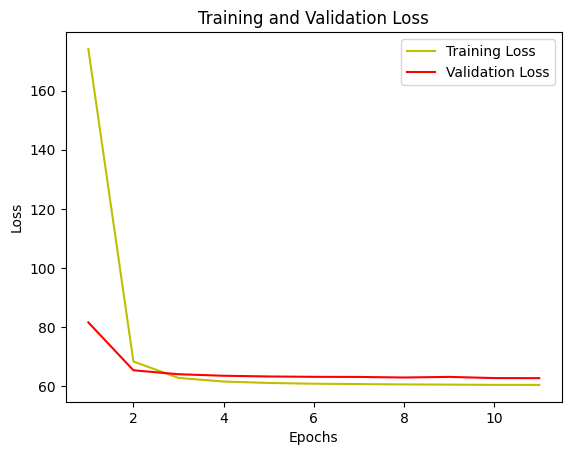


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 214.1023
Epoch 1: val_loss improved from inf to 117.16714, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 211.1362 - val_loss: 117.1671
Epoch 2/11
 67/477 [===>..........................] - ETA: 0s - loss: 113.5761

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 80.4950
Epoch 2: val_loss improved from 117.16714 to 64.34191, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 80.1275 - val_loss: 64.3419
Epoch 3/11
462/477 [============================>.] - ETA: 0s - loss: 64.1439
Epoch 3: val_loss improved from 64.34191 to 61.65591, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.1506 - val_loss: 61.6559
Epoch 4/11
453/477 [===========================>..] - ETA: 0s - loss: 62.1979
Epoch 4: val_loss improved from 61.65591 to 60.75858, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.0524 - val_loss: 60.7586
Epoch 5/11
459/477 [===========================>..] - ETA: 0s - loss: 61.7001
Epoch 5: val_loss improved from 60.75858 to 60.53391, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.4513 - val_loss: 60.533

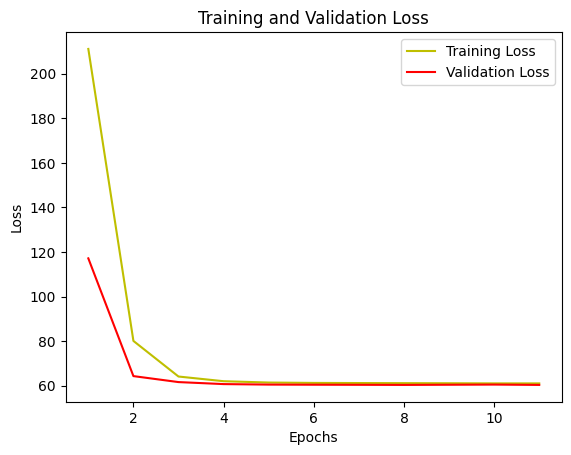


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 163.6857
Epoch 1: val_loss improved from inf to 77.10665, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 161.4583 - val_loss: 77.1067
Epoch 2/11
 69/477 [===>..........................] - ETA: 0s - loss: 69.5248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 68.6721
Epoch 2: val_loss improved from 77.10665 to 63.65480, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 68.5767 - val_loss: 63.6548
Epoch 3/11
460/477 [===========================>..] - ETA: 0s - loss: 63.6186
Epoch 3: val_loss improved from 63.65480 to 61.43509, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.7021 - val_loss: 61.4351
Epoch 4/11
453/477 [===========================>..] - ETA: 0s - loss: 61.9287
Epoch 4: val_loss improved from 61.43509 to 60.60649, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1651 - val_loss: 60.6065
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.6125
Epoch 5: val_loss improved from 60.60649 to 60.23477, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5187 - val_loss: 60.2348

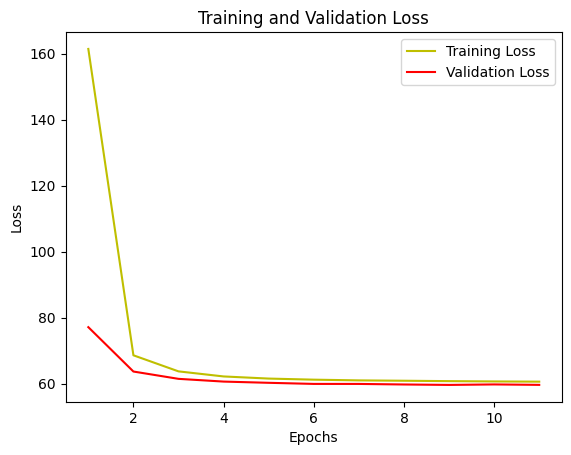


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 187.9586
Epoch 1: val_loss improved from inf to 85.36249, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 187.4857 - val_loss: 85.3625
Epoch 2/11
 70/477 [===>..........................] - ETA: 0s - loss: 90.6194

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 70.1301
Epoch 2: val_loss improved from 85.36249 to 59.52022, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 69.9922 - val_loss: 59.5202
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 62.4401
Epoch 3: val_loss improved from 59.52022 to 58.35305, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.5176 - val_loss: 58.3530
Epoch 4/11
455/477 [===========================>..] - ETA: 0s - loss: 61.8378
Epoch 4: val_loss improved from 58.35305 to 58.02073, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.7873 - val_loss: 58.0207
Epoch 5/11
459/477 [===========================>..] - ETA: 0s - loss: 61.4369
Epoch 5: val_loss did not improve from 58.02073
477/477 [==============================] - 2s 3ms/step - loss: 61.4737 - val_loss: 58.1392
Epoch 6/11
459/477 [===============

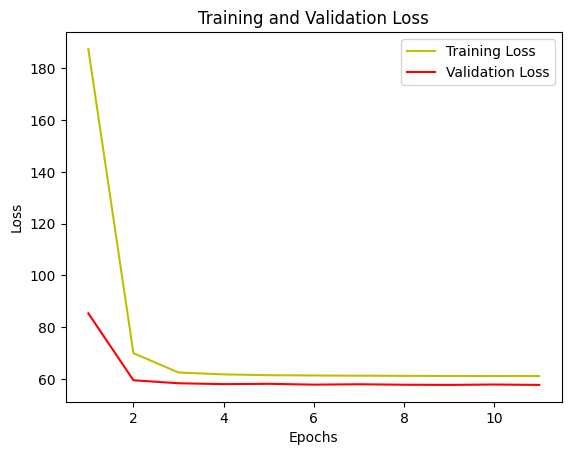


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 168.2913
Epoch 1: val_loss improved from inf to 73.17622, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 165.4057 - val_loss: 73.1762
Epoch 2/11
 69/477 [===>..........................] - ETA: 0s - loss: 71.0502

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


455/477 [===========================>..] - ETA: 0s - loss: 66.7751
Epoch 2: val_loss improved from 73.17622 to 66.40773, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.5401 - val_loss: 66.4077
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 63.4018
Epoch 3: val_loss improved from 66.40773 to 64.30530, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.3020 - val_loss: 64.3053
Epoch 4/11
453/477 [===========================>..] - ETA: 0s - loss: 61.7615
Epoch 4: val_loss improved from 64.30530 to 63.43764, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.7932 - val_loss: 63.4376
Epoch 5/11
459/477 [===========================>..] - ETA: 0s - loss: 61.0688
Epoch 5: val_loss improved from 63.43764 to 62.79510, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.0261 - val_loss: 62.7951

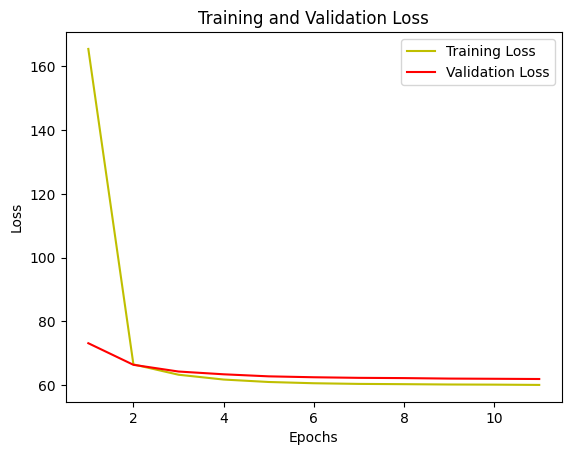


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 247.2748
Epoch 1: val_loss improved from inf to 188.16508, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 245.7996 - val_loss: 188.1651
Epoch 2/11
 44/477 [=>............................] - ETA: 1s - loss: 185.3479

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 109.4505
Epoch 2: val_loss improved from 188.16508 to 66.82767, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 108.5359 - val_loss: 66.8277
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 62.9075
Epoch 3: val_loss improved from 66.82767 to 62.39738, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8782 - val_loss: 62.3974
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 61.1740
Epoch 4: val_loss improved from 62.39738 to 61.93550, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2523 - val_loss: 61.9355
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.8305
Epoch 5: val_loss improved from 61.93550 to 61.79300, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7689 - val_loss: 61.7

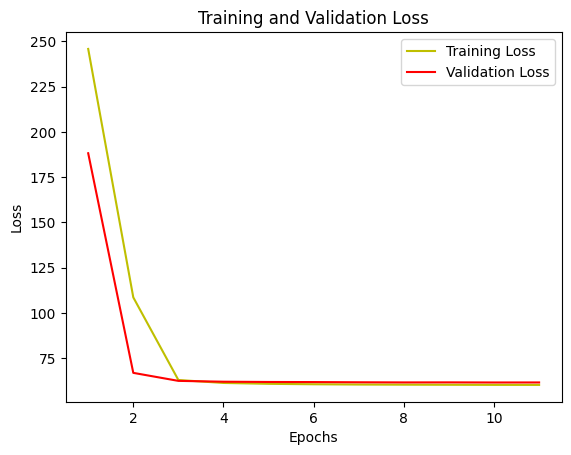


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 193.5787
Epoch 1: val_loss improved from inf to 98.22240, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 193.5787 - val_loss: 98.2224
Epoch 2/11
 66/477 [===>..........................] - ETA: 0s - loss: 88.6378

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 72.8524
Epoch 2: val_loss improved from 98.22240 to 66.12422, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 72.7787 - val_loss: 66.1242
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 63.6321
Epoch 3: val_loss improved from 66.12422 to 64.16046, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.5790 - val_loss: 64.1605
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 62.3096
Epoch 4: val_loss improved from 64.16046 to 63.32615, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.2343 - val_loss: 63.3262
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 61.5475
Epoch 5: val_loss improved from 63.32615 to 62.88363, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.6131 - val_loss: 62.8836

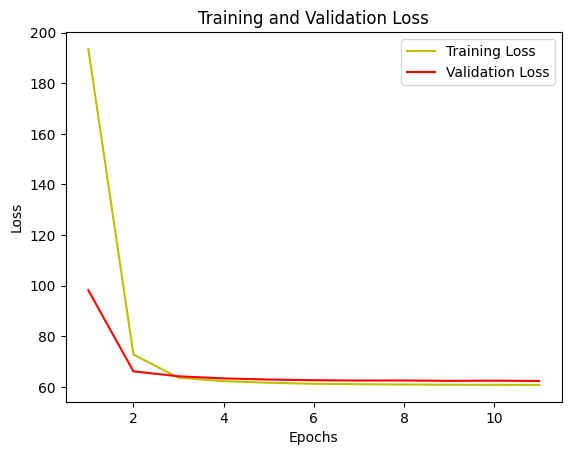


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 162.6154
Epoch 1: val_loss improved from inf to 88.09953, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 160.3255 - val_loss: 88.0995
Epoch 2/11
 33/477 [=>............................] - ETA: 1s - loss: 81.5529

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/477 [===========================>..] - ETA: 0s - loss: 72.5865
Epoch 2: val_loss improved from 88.09953 to 66.52888, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 72.4678 - val_loss: 66.5289
Epoch 3/11
463/477 [============================>.] - ETA: 0s - loss: 64.6224
Epoch 3: val_loss improved from 66.52888 to 62.85486, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.4429 - val_loss: 62.8549
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 62.2662
Epoch 4: val_loss improved from 62.85486 to 61.60410, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.2662 - val_loss: 61.6041
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.6028
Epoch 5: val_loss improved from 61.60410 to 61.06994, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6028 - val_loss: 61.0699

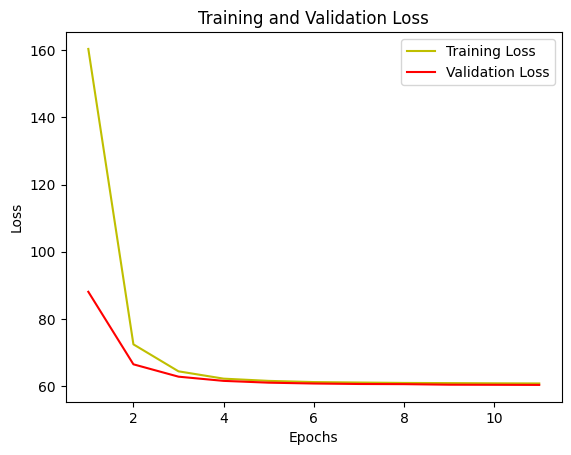


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 214.9573
Epoch 1: val_loss improved from inf to 114.27235, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 211.7335 - val_loss: 114.2724
Epoch 2/11
 54/477 [==>...........................] - ETA: 1s - loss: 103.5543

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 76.7633
Epoch 2: val_loss improved from 114.27235 to 70.33385, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 76.7633 - val_loss: 70.3339
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 64.8711
Epoch 3: val_loss improved from 70.33385 to 66.32451, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.7576 - val_loss: 66.3245
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 62.5037
Epoch 4: val_loss improved from 66.32451 to 64.59642, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.5329 - val_loss: 64.5964
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 61.4876
Epoch 5: val_loss improved from 64.59642 to 63.67641, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5301 - val_loss: 63.676

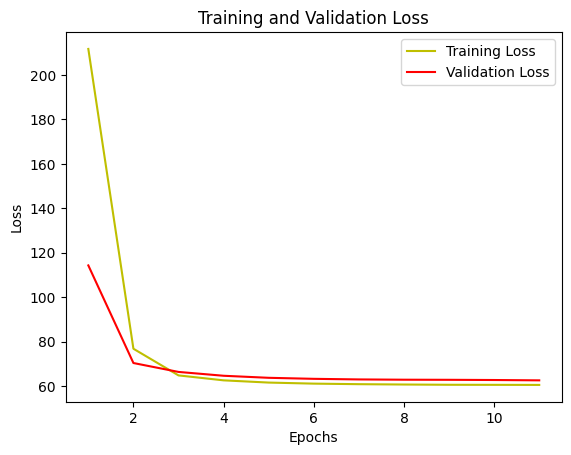


---------------------------------------------------------------------------

Epoch 1/11
471/477 [============================>.] - ETA: 0s - loss: 222.7613
Epoch 1: val_loss improved from inf to 123.35638, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 221.5191 - val_loss: 123.3564
Epoch 2/11
 51/477 [==>...........................] - ETA: 1s - loss: 113.5436

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/477 [===========================>..] - ETA: 0s - loss: 77.2686
Epoch 2: val_loss improved from 123.35638 to 67.59252, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 76.8402 - val_loss: 67.5925
Epoch 3/11
459/477 [===========================>..] - ETA: 0s - loss: 64.2935
Epoch 3: val_loss improved from 67.59252 to 64.56374, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.4599 - val_loss: 64.5637
Epoch 4/11
457/477 [===========================>..] - ETA: 0s - loss: 62.4318
Epoch 4: val_loss improved from 64.56374 to 63.05223, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.4225 - val_loss: 63.0522
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 61.1620
Epoch 5: val_loss improved from 63.05223 to 62.40066, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.4364 - val_loss: 62.400

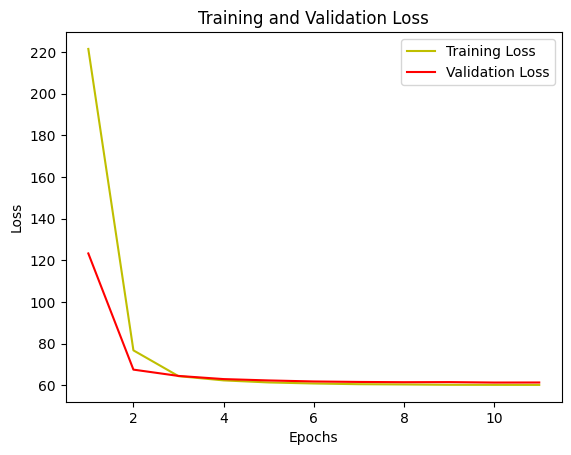


---------------------------------------------------------------------------

Epoch 1/11
460/477 [===========================>..] - ETA: 0s - loss: 192.5490
Epoch 1: val_loss improved from inf to 87.76205, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 188.7076 - val_loss: 87.7620
Epoch 2/11
 52/477 [==>...........................] - ETA: 1s - loss: 84.8949

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 69.1048
Epoch 2: val_loss improved from 87.76205 to 63.78624, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.2009 - val_loss: 63.7862
Epoch 3/11
459/477 [===========================>..] - ETA: 0s - loss: 63.8178
Epoch 3: val_loss improved from 63.78624 to 61.83934, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.5885 - val_loss: 61.8393
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 62.5050
Epoch 4: val_loss improved from 61.83934 to 61.11121, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.4755 - val_loss: 61.1112
Epoch 5/11
466/477 [============================>.] - ETA: 0s - loss: 61.8457
Epoch 5: val_loss improved from 61.11121 to 61.00996, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.0137 - val_loss: 61.0100

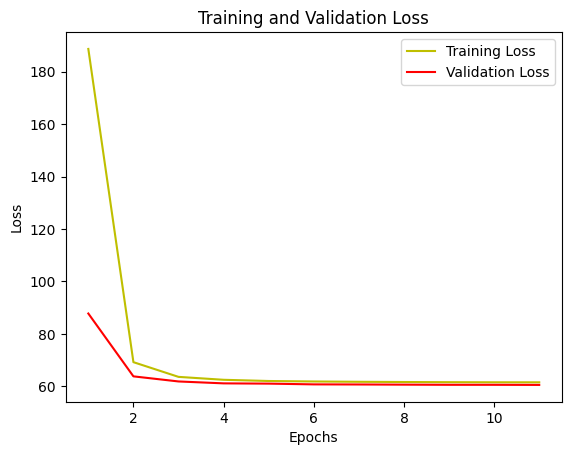


---------------------------------------------------------------------------

Epoch 1/11
460/477 [===========================>..] - ETA: 0s - loss: 241.6903
Epoch 1: val_loss improved from inf to 182.91594, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 239.7191 - val_loss: 182.9159
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 167.7130

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 111.6184
Epoch 2: val_loss improved from 182.91594 to 69.04369, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 111.4002 - val_loss: 69.0437
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 64.8119
Epoch 3: val_loss improved from 69.04369 to 62.98587, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.8530 - val_loss: 62.9859
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 61.9420
Epoch 4: val_loss improved from 62.98587 to 61.50647, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8539 - val_loss: 61.5065
Epoch 5/11
460/477 [===========================>..] - ETA: 0s - loss: 60.6735
Epoch 5: val_loss improved from 61.50647 to 60.92002, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 60.7291 - val_loss: 60.9

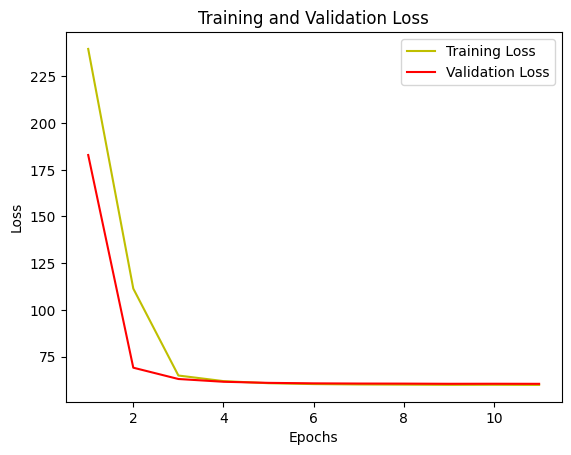


---------------------------------------------------------------------------

Epoch 1/11
465/477 [============================>.] - ETA: 0s - loss: 160.1713
Epoch 1: val_loss improved from inf to 74.91930, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 158.2460 - val_loss: 74.9193
Epoch 2/11
 56/477 [==>...........................] - ETA: 1s - loss: 74.7550

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


453/477 [===========================>..] - ETA: 0s - loss: 69.3506
Epoch 2: val_loss improved from 74.91930 to 64.24498, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 69.2840 - val_loss: 64.2450
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 64.3965
Epoch 3: val_loss improved from 64.24498 to 61.44661, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.4462 - val_loss: 61.4466
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 62.8744
Epoch 4: val_loss improved from 61.44661 to 60.11109, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8854 - val_loss: 60.1111
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 62.0222
Epoch 5: val_loss improved from 60.11109 to 59.41228, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1020 - val_loss: 59.4123

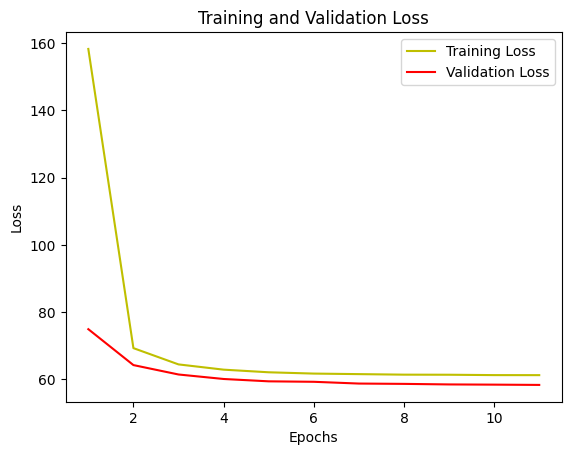


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 202.7015
Epoch 1: val_loss improved from inf to 115.97870, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 202.7015 - val_loss: 115.9787
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 100.6613

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


476/477 [============================>.] - ETA: 0s - loss: 74.1352
Epoch 2: val_loss improved from 115.97870 to 64.77880, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 74.0949 - val_loss: 64.7788
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 62.3643
Epoch 3: val_loss improved from 64.77880 to 63.03260, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.2851 - val_loss: 63.0326
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 61.2858
Epoch 4: val_loss improved from 63.03260 to 62.19814, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.3182 - val_loss: 62.1981
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 60.7806
Epoch 5: val_loss improved from 62.19814 to 61.74130, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7818 - val_loss: 61.741

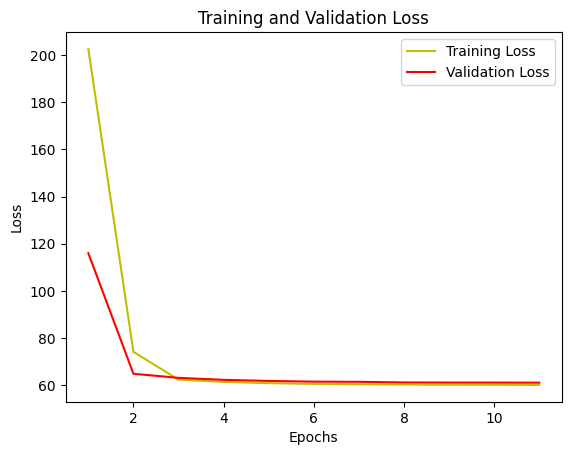


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 162.3243
Epoch 1: val_loss improved from inf to 67.33819, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 161.3340 - val_loss: 67.3382
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 72.2742

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 65.1326
Epoch 2: val_loss improved from 67.33819 to 60.65138, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 65.0183 - val_loss: 60.6514
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 62.1846
Epoch 3: val_loss improved from 60.65138 to 59.54690, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1460 - val_loss: 59.5469
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 61.4789
Epoch 4: val_loss improved from 59.54690 to 58.99335, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2885 - val_loss: 58.9934
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 60.8977
Epoch 5: val_loss improved from 58.99335 to 58.86389, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.9193 - val_loss: 58.8639

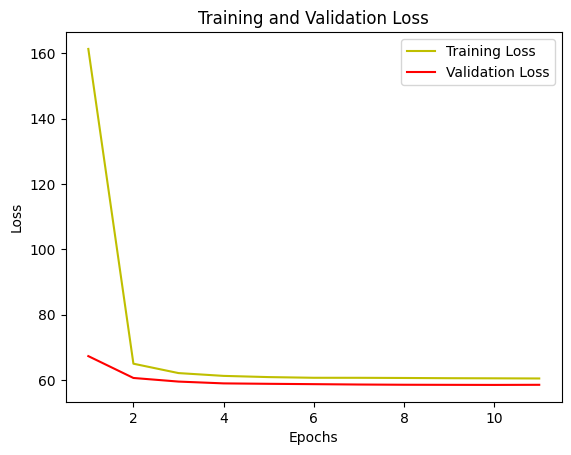


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 231.3354
Epoch 1: val_loss improved from inf to 149.70706, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 229.6114 - val_loss: 149.7071
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 136.6861

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 94.3093
Epoch 2: val_loss improved from 149.70706 to 69.26109, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 94.2433 - val_loss: 69.2611
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.9726
Epoch 3: val_loss improved from 69.26109 to 62.46030, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.9892 - val_loss: 62.4603
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 60.8859
Epoch 4: val_loss improved from 62.46030 to 61.27144, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1024 - val_loss: 61.2714
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 60.3938
Epoch 5: val_loss improved from 61.27144 to 60.74088, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.3792 - val_loss: 60.740

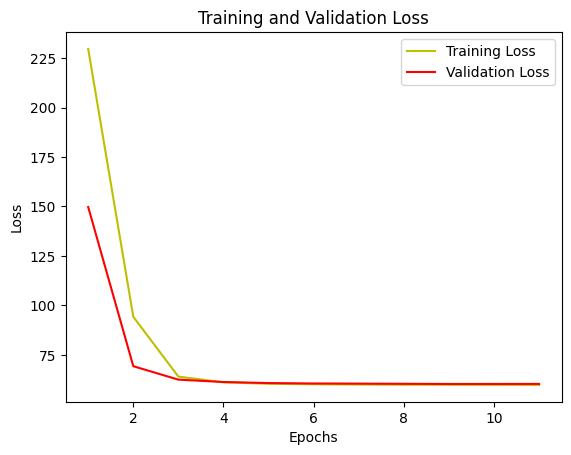


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 176.1503
Epoch 1: val_loss improved from inf to 77.03111, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 174.4837 - val_loss: 77.0311
Epoch 2/11
 58/477 [==>...........................] - ETA: 1s - loss: 74.0306

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 66.3024
Epoch 2: val_loss improved from 77.03111 to 64.18140, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.3667 - val_loss: 64.1814
Epoch 3/11
459/477 [===========================>..] - ETA: 0s - loss: 62.7823
Epoch 3: val_loss improved from 64.18140 to 62.81212, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.8190 - val_loss: 62.8121
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.7471
Epoch 4: val_loss improved from 62.81212 to 62.09208, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.7887 - val_loss: 62.0921
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 61.1280
Epoch 5: val_loss improved from 62.09208 to 61.59990, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1587 - val_loss: 61.5999

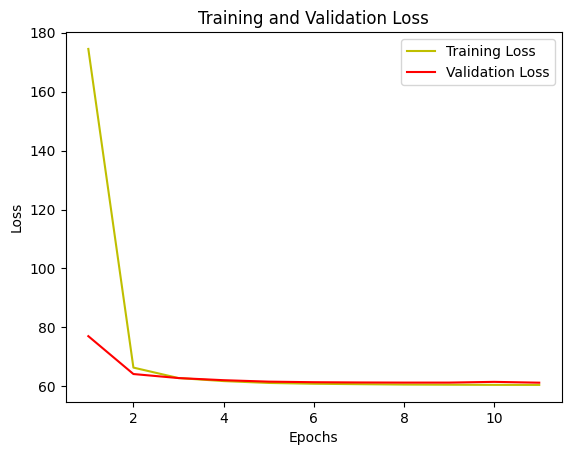


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 244.7879
Epoch 1: val_loss improved from inf to 178.08334, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 243.8881 - val_loss: 178.0833
Epoch 2/11
 59/477 [==>...........................] - ETA: 1s - loss: 162.5160

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 104.6539
Epoch 2: val_loss improved from 178.08334 to 67.93194, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 104.2014 - val_loss: 67.9319
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 63.2833
Epoch 3: val_loss improved from 67.93194 to 63.15651, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.3891 - val_loss: 63.1565
Epoch 4/11
456/477 [===========================>..] - ETA: 0s - loss: 61.0670
Epoch 4: val_loss improved from 63.15651 to 62.30115, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.1514 - val_loss: 62.3012
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.5299
Epoch 5: val_loss improved from 62.30115 to 62.02235, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.5051 - val_loss: 62.0

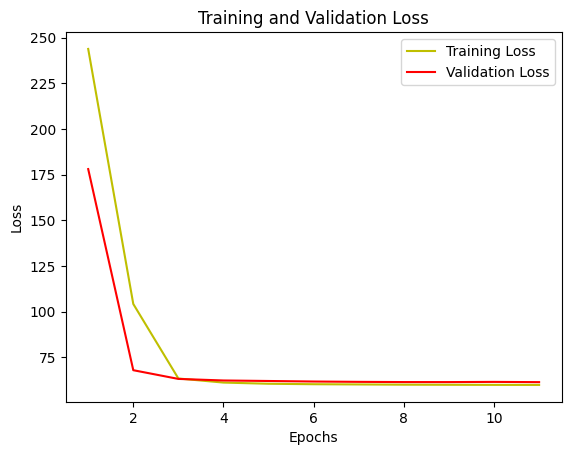


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 217.8563
Epoch 1: val_loss improved from inf to 113.49261, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 216.5930 - val_loss: 113.4926
Epoch 2/11
 53/477 [==>...........................] - ETA: 1s - loss: 103.6859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 78.1731
Epoch 2: val_loss improved from 113.49261 to 65.27710, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 78.1098 - val_loss: 65.2771
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 65.2593
Epoch 3: val_loss improved from 65.27710 to 62.28152, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 65.3233 - val_loss: 62.2815
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 63.3957
Epoch 4: val_loss improved from 62.28152 to 60.90398, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.4754 - val_loss: 60.9040
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 62.6670
Epoch 5: val_loss improved from 60.90398 to 60.25812, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.6387 - val_loss: 60.258

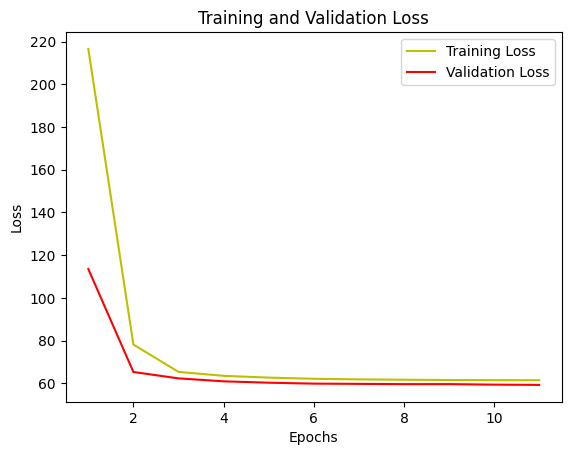


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 171.8481
Epoch 1: val_loss improved from inf to 81.36871, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 171.2318 - val_loss: 81.3687
Epoch 2/11
 37/477 [=>............................] - ETA: 1s - loss: 77.2835

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 70.8470
Epoch 2: val_loss improved from 81.36871 to 64.82644, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 70.4917 - val_loss: 64.8264
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.9119
Epoch 3: val_loss improved from 64.82644 to 62.02281, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.9238 - val_loss: 62.0228
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 62.3694
Epoch 4: val_loss improved from 62.02281 to 61.21838, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.3694 - val_loss: 61.2184
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.7302
Epoch 5: val_loss improved from 61.21838 to 60.82286, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.7302 - val_loss: 60.8229

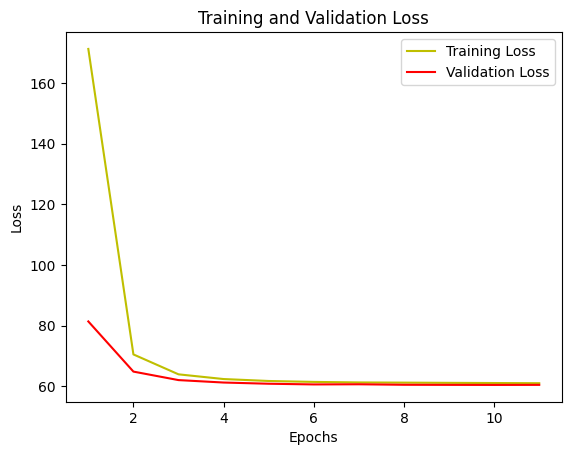


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 211.0832
Epoch 1: val_loss improved from inf to 103.64821, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 210.1353 - val_loss: 103.6482
Epoch 2/11
 73/477 [===>..........................] - ETA: 0s - loss: 94.4346

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 70.9515
Epoch 2: val_loss improved from 103.64821 to 60.86215, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 70.8466 - val_loss: 60.8622
Epoch 3/11
476/477 [============================>.] - ETA: 0s - loss: 62.0659
Epoch 3: val_loss improved from 60.86215 to 60.12496, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0534 - val_loss: 60.1250
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 61.7642
Epoch 4: val_loss improved from 60.12496 to 59.87461, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.6210 - val_loss: 59.8746
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 61.3807
Epoch 5: val_loss improved from 59.87461 to 59.84159, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.4585 - val_loss: 59.841

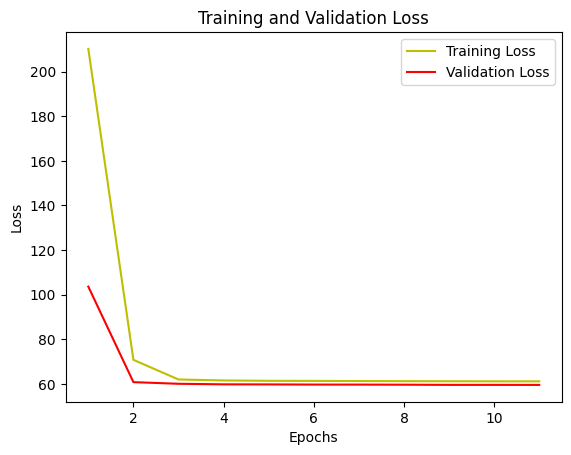


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 167.0652
Epoch 1: val_loss improved from inf to 81.12395, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 165.6177 - val_loss: 81.1240
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 77.9267

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 67.6203
Epoch 2: val_loss improved from 81.12395 to 62.33705, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.6203 - val_loss: 62.3370
Epoch 3/11
462/477 [============================>.] - ETA: 0s - loss: 62.0334
Epoch 3: val_loss improved from 62.33705 to 60.76835, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1147 - val_loss: 60.7684
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 61.0740
Epoch 4: val_loss improved from 60.76835 to 60.25785, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.9901 - val_loss: 60.2579
Epoch 5/11
460/477 [===========================>..] - ETA: 0s - loss: 60.6631
Epoch 5: val_loss improved from 60.25785 to 60.01987, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.5364 - val_loss: 60.0199

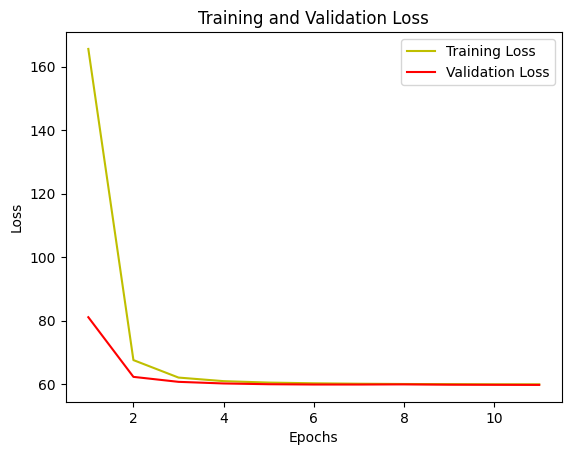


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 180.3410
Epoch 1: val_loss improved from inf to 82.05580, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 179.0974 - val_loss: 82.0558
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 81.3631

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 69.5297
Epoch 2: val_loss improved from 82.05580 to 61.25980, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 69.4457 - val_loss: 61.2598
Epoch 3/11
461/477 [===========================>..] - ETA: 0s - loss: 62.4336
Epoch 3: val_loss improved from 61.25980 to 60.33625, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.3347 - val_loss: 60.3363
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 61.5713
Epoch 4: val_loss improved from 60.33625 to 60.11782, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5912 - val_loss: 60.1178
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.3168
Epoch 5: val_loss improved from 60.11782 to 60.01332, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.3304 - val_loss: 60.0133

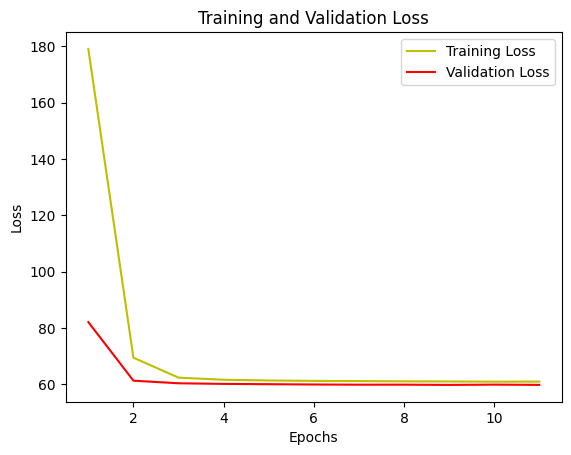


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 221.3849
Epoch 1: val_loss improved from inf to 104.31367, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 219.3484 - val_loss: 104.3137
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 95.5925

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 74.1018
Epoch 2: val_loss improved from 104.31367 to 65.04475, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 73.9826 - val_loss: 65.0447
Epoch 3/11
454/477 [===========================>..] - ETA: 0s - loss: 64.2986
Epoch 3: val_loss improved from 65.04475 to 62.48514, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.0848 - val_loss: 62.4851
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 62.1325
Epoch 4: val_loss improved from 62.48514 to 61.47143, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.2791 - val_loss: 61.4714
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 61.5201
Epoch 5: val_loss improved from 61.47143 to 61.03492, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5140 - val_loss: 61.034

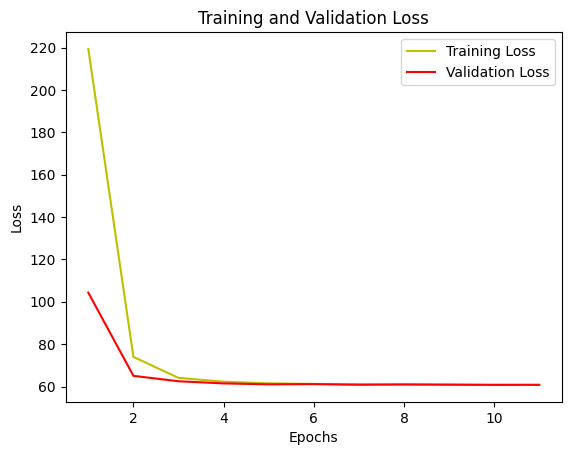


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 217.5975
Epoch 1: val_loss improved from inf to 122.16483, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 215.7598 - val_loss: 122.1648
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 113.6749

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 82.9380
Epoch 2: val_loss improved from 122.16483 to 69.12508, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 82.6438 - val_loss: 69.1251
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 63.9991
Epoch 3: val_loss improved from 69.12508 to 64.11485, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.1444 - val_loss: 64.1148
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.1820
Epoch 4: val_loss improved from 64.11485 to 62.75017, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1451 - val_loss: 62.7502
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 60.1793
Epoch 5: val_loss improved from 62.75017 to 62.42284, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.2593 - val_loss: 62.422

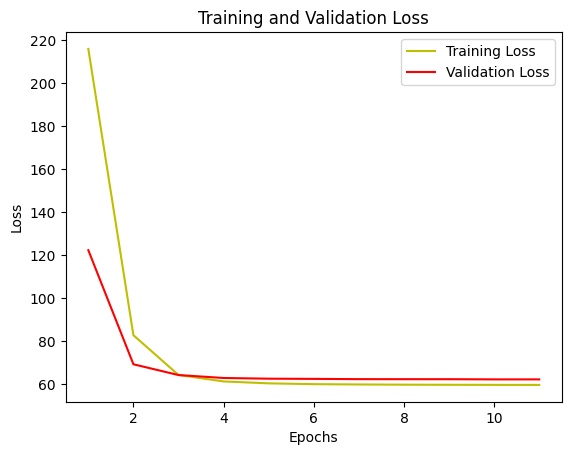


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 186.0128
Epoch 1: val_loss improved from inf to 77.57789, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 183.0918 - val_loss: 77.5779
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 77.3383

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 67.2929
Epoch 2: val_loss improved from 77.57789 to 63.48182, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 67.1890 - val_loss: 63.4818
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 62.9016
Epoch 3: val_loss improved from 63.48182 to 61.76328, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.0027 - val_loss: 61.7633
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 61.6746
Epoch 4: val_loss improved from 61.76328 to 60.84864, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8274 - val_loss: 60.8486
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 61.3333
Epoch 5: val_loss improved from 60.84864 to 60.48599, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.3195 - val_loss: 60.4860

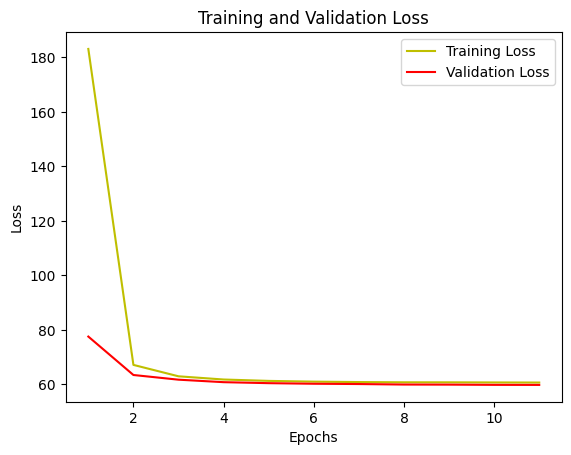


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 202.7899
Epoch 1: val_loss improved from inf to 104.06675, saving model to best_model.h5
477/477 [==============================] - 5s 4ms/step - loss: 201.6877 - val_loss: 104.0667
Epoch 2/11
 52/477 [==>...........................] - ETA: 1s - loss: 98.7988

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 81.7378
Epoch 2: val_loss improved from 104.06675 to 66.95580, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 81.5679 - val_loss: 66.9558
Epoch 3/11
460/477 [===========================>..] - ETA: 0s - loss: 65.6825
Epoch 3: val_loss improved from 66.95580 to 61.27657, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.6266 - val_loss: 61.2766
Epoch 4/11
476/477 [============================>.] - ETA: 0s - loss: 62.9196
Epoch 4: val_loss improved from 61.27657 to 60.11059, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.8760 - val_loss: 60.1106
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 61.9092
Epoch 5: val_loss improved from 60.11059 to 59.62912, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0033 - val_loss: 59.629

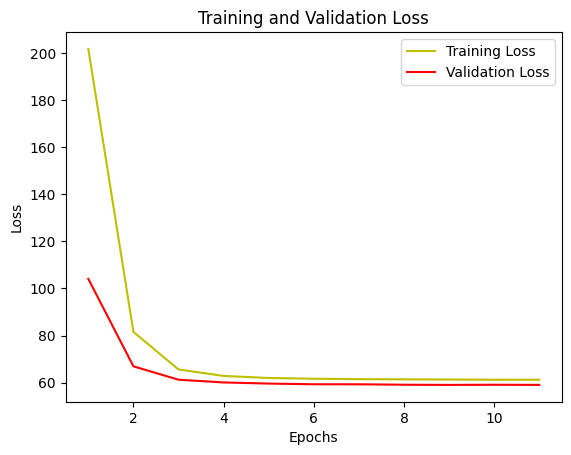


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 233.3386
Epoch 1: val_loss improved from inf to 171.90540, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 232.4173 - val_loss: 171.9054
Epoch 2/11
 54/477 [==>...........................] - ETA: 1s - loss: 164.4673

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 105.4819
Epoch 2: val_loss improved from 171.90540 to 72.23720, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 104.8752 - val_loss: 72.2372
Epoch 3/11
461/477 [===========================>..] - ETA: 0s - loss: 65.1185
Epoch 3: val_loss improved from 72.23720 to 64.39476, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.1948 - val_loss: 64.3948
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 61.9872
Epoch 4: val_loss improved from 64.39476 to 63.11752, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8910 - val_loss: 63.1175
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 61.0657
Epoch 5: val_loss improved from 63.11752 to 62.59422, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1141 - val_loss: 62.5

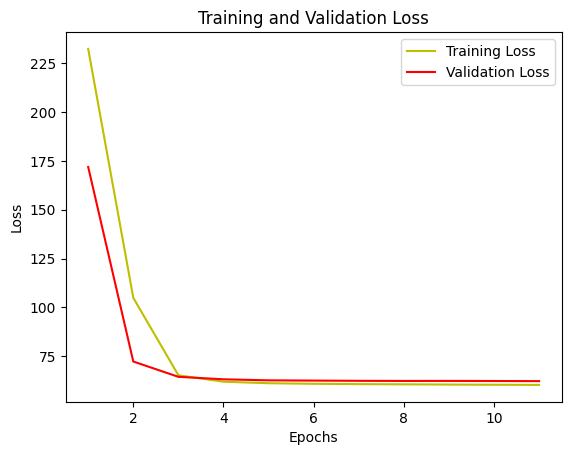


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 149.7487
Epoch 1: val_loss improved from inf to 76.62630, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 147.2515 - val_loss: 76.6263
Epoch 2/11
 44/477 [=>............................] - ETA: 1s - loss: 69.5170

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 64.6577
Epoch 2: val_loss improved from 76.62630 to 67.27899, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.6577 - val_loss: 67.2790
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 61.5025
Epoch 3: val_loss improved from 67.27899 to 65.93208, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.3905 - val_loss: 65.9321
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 60.5182
Epoch 4: val_loss improved from 65.93208 to 65.32876, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 60.5313 - val_loss: 65.3288
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 60.1546
Epoch 5: val_loss improved from 65.32876 to 65.01814, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 60.1183 - val_loss: 65.0181

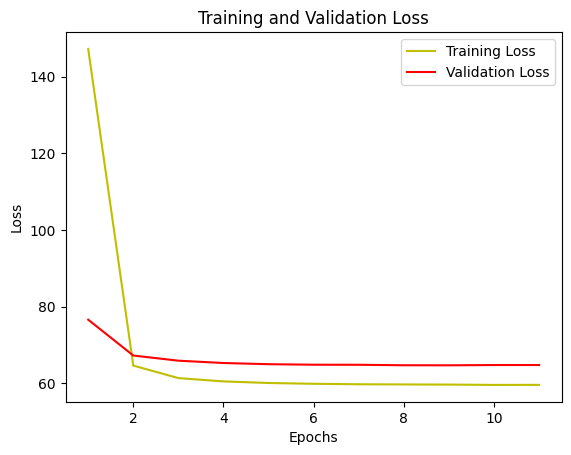


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 167.7914
Epoch 1: val_loss improved from inf to 70.99493, saving model to best_model.h5
477/477 [==============================] - 4s 5ms/step - loss: 166.8397 - val_loss: 70.9949
Epoch 2/11
 31/477 [>.............................] - ETA: 2s - loss: 71.5779

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 67.1817
Epoch 2: val_loss improved from 70.99493 to 62.69872, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 67.1614 - val_loss: 62.6987
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.6818
Epoch 3: val_loss improved from 62.69872 to 61.08358, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.6675 - val_loss: 61.0836
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 62.3800
Epoch 4: val_loss improved from 61.08358 to 60.24700, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.4113 - val_loss: 60.2470
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.9550
Epoch 5: val_loss improved from 60.24700 to 59.85283, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.7425 - val_loss: 59.8528

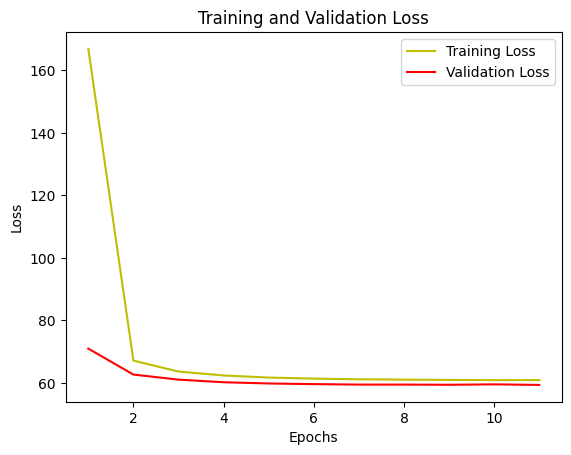


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 177.4891
Epoch 1: val_loss improved from inf to 76.67777, saving model to best_model.h5
477/477 [==============================] - 4s 6ms/step - loss: 175.1930 - val_loss: 76.6778
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 73.2383

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 67.5838
Epoch 2: val_loss improved from 76.67777 to 63.49972, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 67.6286 - val_loss: 63.4997
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 63.2843
Epoch 3: val_loss improved from 63.49972 to 61.83715, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 63.2238 - val_loss: 61.8371
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 61.9244
Epoch 4: val_loss improved from 61.83715 to 61.14434, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 61.9361 - val_loss: 61.1443
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.3766
Epoch 5: val_loss improved from 61.14434 to 60.89106, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 61.3766 - val_loss: 60.8911

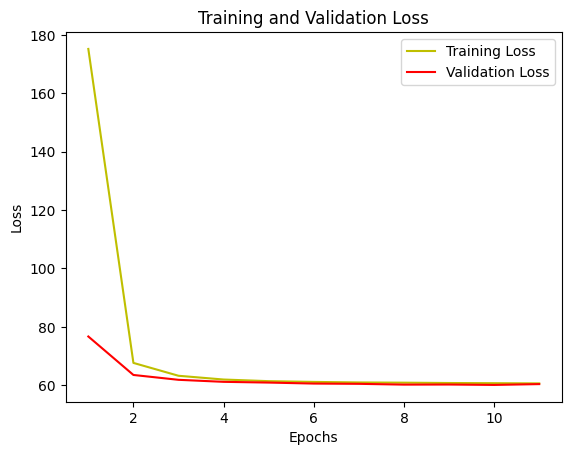


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 178.9107
Epoch 1: val_loss improved from inf to 88.17483, saving model to best_model.h5
477/477 [==============================] - 4s 5ms/step - loss: 177.0362 - val_loss: 88.1748
Epoch 2/11
 30/477 [>.............................] - ETA: 1s - loss: 86.4430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 69.9255
Epoch 2: val_loss improved from 88.17483 to 66.25133, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 69.9015 - val_loss: 66.2513
Epoch 3/11
468/477 [============================>.] - ETA: 0s - loss: 63.6118
Epoch 3: val_loss improved from 66.25133 to 63.74354, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.5899 - val_loss: 63.7435
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.6336
Epoch 4: val_loss improved from 63.74354 to 62.50824, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.7681 - val_loss: 62.5082
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 60.6545
Epoch 5: val_loss improved from 62.50824 to 62.06625, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.7145 - val_loss: 62.0663

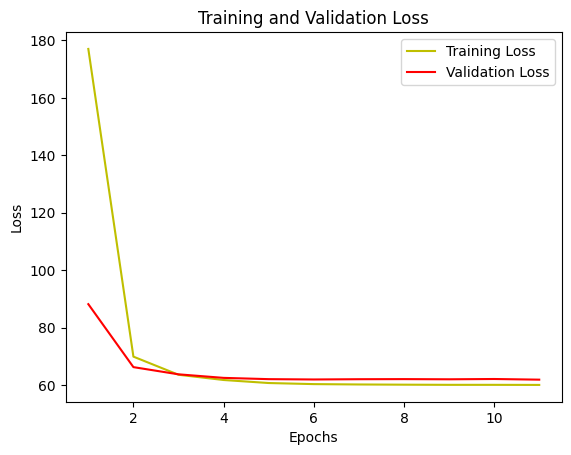


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 213.9239
Epoch 1: val_loss improved from inf to 110.55241, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 212.4470 - val_loss: 110.5524
Epoch 2/11
 47/477 [=>............................] - ETA: 1s - loss: 102.4645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


462/477 [============================>.] - ETA: 0s - loss: 78.8996
Epoch 2: val_loss improved from 110.55241 to 67.24226, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 78.7532 - val_loss: 67.2423
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 64.0228
Epoch 3: val_loss improved from 67.24226 to 63.54160, saving model to best_model.h5
477/477 [==============================] - 3s 7ms/step - loss: 64.0228 - val_loss: 63.5416
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 62.0979
Epoch 4: val_loss improved from 63.54160 to 62.47855, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 62.0665 - val_loss: 62.4785
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.4804
Epoch 5: val_loss improved from 62.47855 to 62.11443, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 61.4703 - val_loss: 62.114

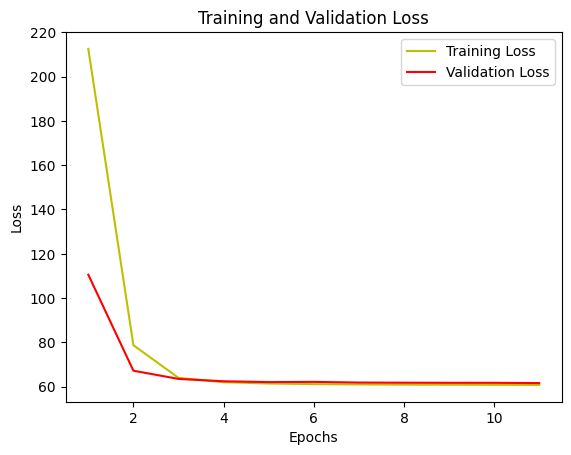


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 198.6640
Epoch 1: val_loss improved from inf to 94.44289, saving model to best_model.h5
477/477 [==============================] - 4s 5ms/step - loss: 195.8362 - val_loss: 94.4429
Epoch 2/11
 30/477 [>.............................] - ETA: 1s - loss: 89.1859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 70.2885
Epoch 2: val_loss improved from 94.44289 to 66.41872, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 70.2592 - val_loss: 66.4187
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 62.8967
Epoch 3: val_loss improved from 66.41872 to 64.51665, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 62.8386 - val_loss: 64.5167
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.7022
Epoch 4: val_loss improved from 64.51665 to 63.40016, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 61.7575 - val_loss: 63.4002
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.1735
Epoch 5: val_loss improved from 63.40016 to 63.36595, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1801 - val_loss: 63.3660

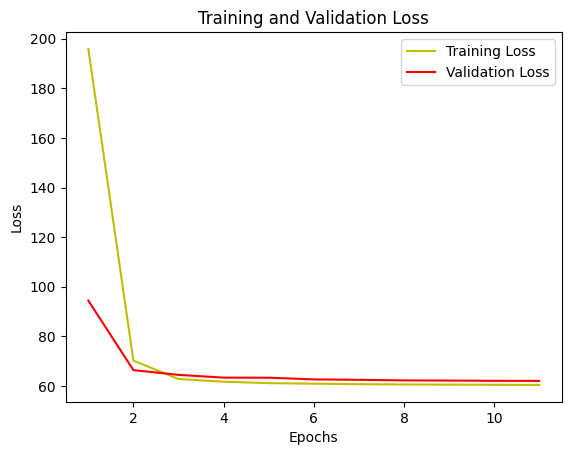


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 183.1955
Epoch 1: val_loss improved from inf to 83.18381, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 181.6033 - val_loss: 83.1838
Epoch 2/11
 59/477 [==>...........................] - ETA: 1s - loss: 86.2402

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 70.6308
Epoch 2: val_loss improved from 83.18381 to 65.17503, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.5550 - val_loss: 65.1750
Epoch 3/11
468/477 [============================>.] - ETA: 0s - loss: 63.4508
Epoch 3: val_loss improved from 65.17503 to 61.88641, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.1999 - val_loss: 61.8864
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.5049
Epoch 4: val_loss improved from 61.88641 to 60.94618, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.4381 - val_loss: 60.9462
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 60.7931
Epoch 5: val_loss improved from 60.94618 to 60.58850, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 60.8663 - val_loss: 60.5885

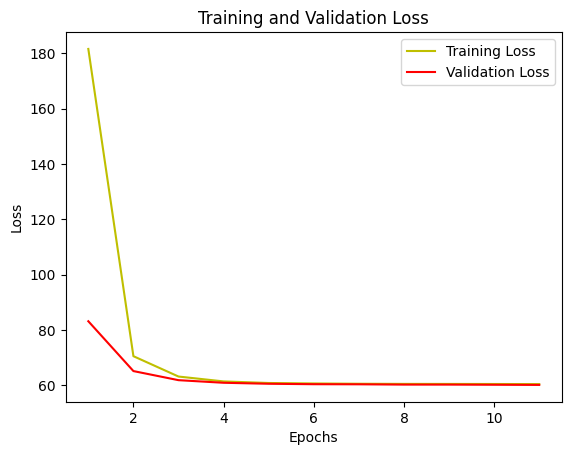


---------------------------------------------------------------------------

Epoch 1/11
471/477 [============================>.] - ETA: 0s - loss: 157.4903
Epoch 1: val_loss improved from inf to 73.94907, saving model to best_model.h5
477/477 [==============================] - 4s 6ms/step - loss: 156.4494 - val_loss: 73.9491
Epoch 2/11
 47/477 [=>............................] - ETA: 1s - loss: 71.7979

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/477 [============================>.] - ETA: 0s - loss: 69.8261
Epoch 2: val_loss improved from 73.94907 to 63.84911, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.4294 - val_loss: 63.8491
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 64.9376
Epoch 3: val_loss improved from 63.84911 to 61.41209, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.9376 - val_loss: 61.4121
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 63.1224
Epoch 4: val_loss improved from 61.41209 to 60.12880, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.1865 - val_loss: 60.1288
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 62.1680
Epoch 5: val_loss improved from 60.12880 to 59.73648, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.2959 - val_loss: 59.7365

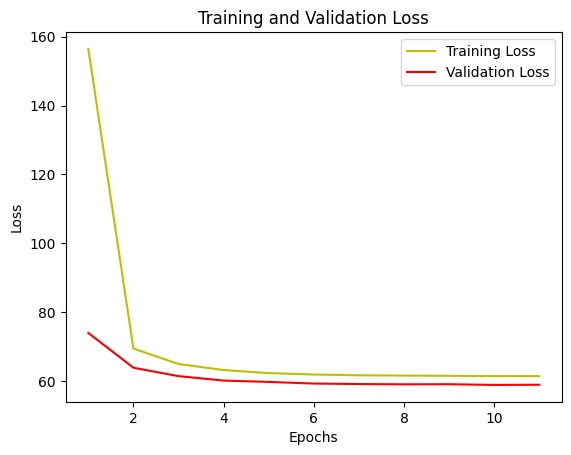


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 188.5123
Epoch 1: val_loss improved from inf to 94.30980, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 187.4366 - val_loss: 94.3098
Epoch 2/11
 22/477 [>.............................] - ETA: 2s - loss: 96.2372 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/477 [============================>.] - ETA: 0s - loss: 71.6055
Epoch 2: val_loss improved from 94.30980 to 69.52251, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 71.5733 - val_loss: 69.5225
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 63.1608
Epoch 3: val_loss improved from 69.52251 to 66.16459, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.3089 - val_loss: 66.1646
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 61.5157
Epoch 4: val_loss improved from 66.16459 to 65.04137, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 61.4893 - val_loss: 65.0414
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 60.8681
Epoch 5: val_loss improved from 65.04137 to 64.55663, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 60.8307 - val_loss: 64.5566

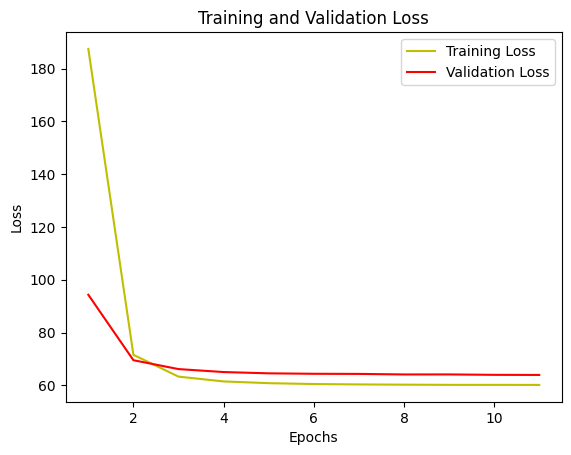


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 198.9834
Epoch 1: val_loss improved from inf to 89.07407, saving model to best_model.h5
477/477 [==============================] - 5s 8ms/step - loss: 197.1424 - val_loss: 89.0741
Epoch 2/11
 17/477 [>.............................] - ETA: 3s - loss: 101.5292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 70.4054
Epoch 2: val_loss improved from 89.07407 to 66.02893, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 70.4966 - val_loss: 66.0289
Epoch 3/11
470/477 [============================>.] - ETA: 0s - loss: 63.5901
Epoch 3: val_loss improved from 66.02893 to 63.98189, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.4352 - val_loss: 63.9819
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 62.1664
Epoch 4: val_loss improved from 63.98189 to 63.06732, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 62.0576 - val_loss: 63.0673
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.3584
Epoch 5: val_loss improved from 63.06732 to 62.59542, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 61.3357 - val_loss: 62.5954

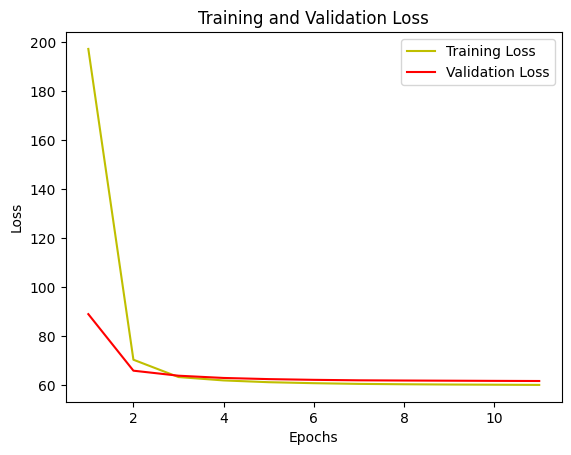


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 146.1048
Epoch 1: val_loss improved from inf to 67.99186, saving model to best_model.h5
477/477 [==============================] - 4s 6ms/step - loss: 146.1048 - val_loss: 67.9919
Epoch 2/11
 25/477 [>.............................] - ETA: 2s - loss: 63.1072

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 63.6312
Epoch 2: val_loss improved from 67.99186 to 62.53196, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.7083 - val_loss: 62.5320
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 61.6089
Epoch 3: val_loss improved from 62.53196 to 61.71511, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6170 - val_loss: 61.7151
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 61.2146
Epoch 4: val_loss improved from 61.71511 to 61.39515, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1119 - val_loss: 61.3952
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 60.7779
Epoch 5: val_loss improved from 61.39515 to 61.22058, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 60.9043 - val_loss: 61.2206

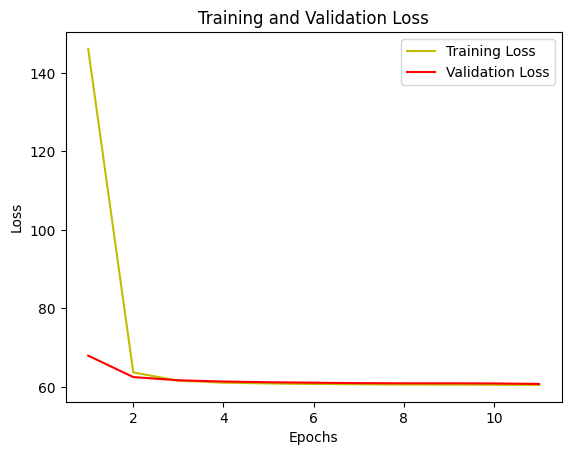


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 244.2528
Epoch 1: val_loss improved from inf to 175.46448, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 243.3973 - val_loss: 175.4645
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 175.2147

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 114.4049
Epoch 2: val_loss improved from 175.46448 to 71.91771, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 113.3296 - val_loss: 71.9177
Epoch 3/11
468/477 [============================>.] - ETA: 0s - loss: 66.5824
Epoch 3: val_loss improved from 71.91771 to 64.43002, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 66.5887 - val_loss: 64.4300
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 63.3902
Epoch 4: val_loss improved from 64.43002 to 62.50846, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 63.2175 - val_loss: 62.5085
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.9955
Epoch 5: val_loss improved from 62.50846 to 61.70361, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9955 - val_loss: 61.7

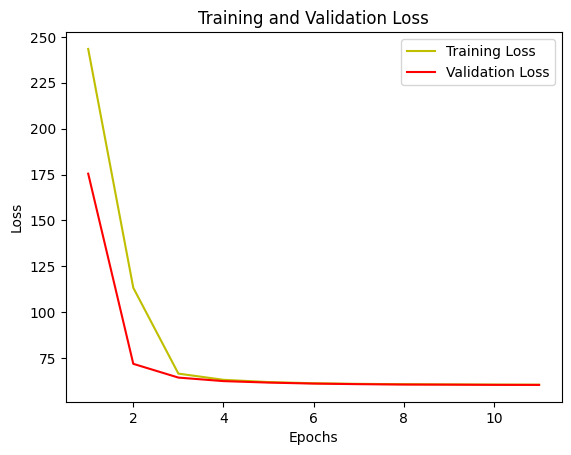


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 183.1147
Epoch 1: val_loss improved from inf to 70.81488, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 180.7824 - val_loss: 70.8149
Epoch 2/11
 46/477 [=>............................] - ETA: 1s - loss: 68.1714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 65.3975
Epoch 2: val_loss improved from 70.81488 to 60.28045, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.4469 - val_loss: 60.2804
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 62.8085
Epoch 3: val_loss improved from 60.28045 to 59.38142, saving model to best_model.h5
477/477 [==============================] - 3s 6ms/step - loss: 62.7451 - val_loss: 59.3814
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 62.0913
Epoch 4: val_loss improved from 59.38142 to 59.25340, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 62.1289 - val_loss: 59.2534
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.8297
Epoch 5: val_loss improved from 59.25340 to 58.87312, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.8957 - val_loss: 58.8731

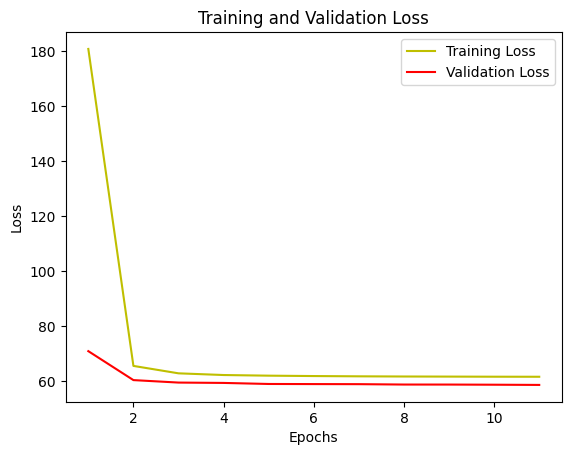


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 159.4738
Epoch 1: val_loss improved from inf to 66.96147, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 158.0929 - val_loss: 66.9615
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 70.2550

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/477 [============================>.] - ETA: 0s - loss: 65.9558
Epoch 2: val_loss improved from 66.96147 to 58.87467, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 66.0361 - val_loss: 58.8747
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 62.8028
Epoch 3: val_loss improved from 58.87467 to 57.94086, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.8310 - val_loss: 57.9409
Epoch 4/11
461/477 [===========================>..] - ETA: 0s - loss: 62.0245
Epoch 4: val_loss improved from 57.94086 to 57.56067, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0681 - val_loss: 57.5607
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.6739
Epoch 5: val_loss improved from 57.56067 to 57.44617, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 61.6516 - val_loss: 57.4462

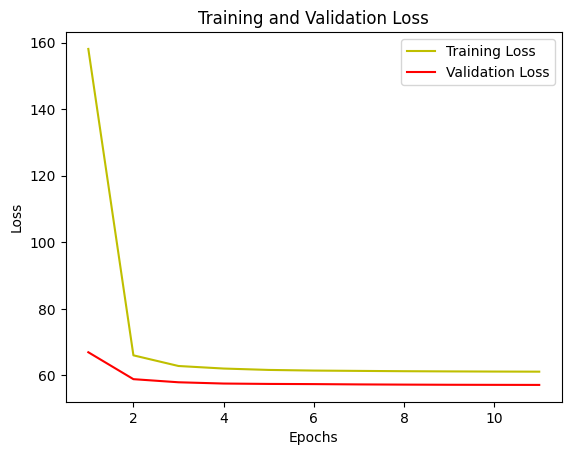


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 206.0813
Epoch 1: val_loss improved from inf to 128.17207, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 206.0813 - val_loss: 128.1721
Epoch 2/11
 42/477 [=>............................] - ETA: 1s - loss: 123.0682

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 87.6992
Epoch 2: val_loss improved from 128.17207 to 65.53884, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 87.3859 - val_loss: 65.5388
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.3190
Epoch 3: val_loss improved from 65.53884 to 61.62506, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.3811 - val_loss: 61.6251
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 61.5659
Epoch 4: val_loss improved from 61.62506 to 60.65726, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.5341 - val_loss: 60.6573
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.7189
Epoch 5: val_loss improved from 60.65726 to 60.24540, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.9459 - val_loss: 60.245

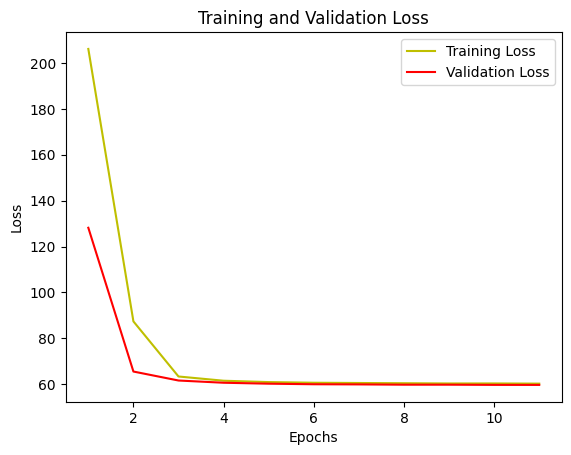


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 152.4625
Epoch 1: val_loss improved from inf to 82.70991, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 151.7326 - val_loss: 82.7099
Epoch 2/11
 45/477 [=>............................] - ETA: 1s - loss: 75.9656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 67.1272
Epoch 2: val_loss improved from 82.70991 to 67.52549, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 67.1272 - val_loss: 67.5255
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 62.6369
Epoch 3: val_loss improved from 67.52549 to 65.74323, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.5844 - val_loss: 65.7432
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 61.4837
Epoch 4: val_loss improved from 65.74323 to 65.06611, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.4213 - val_loss: 65.0661
Epoch 5/11
457/477 [===========================>..] - ETA: 0s - loss: 60.9881
Epoch 5: val_loss improved from 65.06611 to 64.94011, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.8638 - val_loss: 64.9401

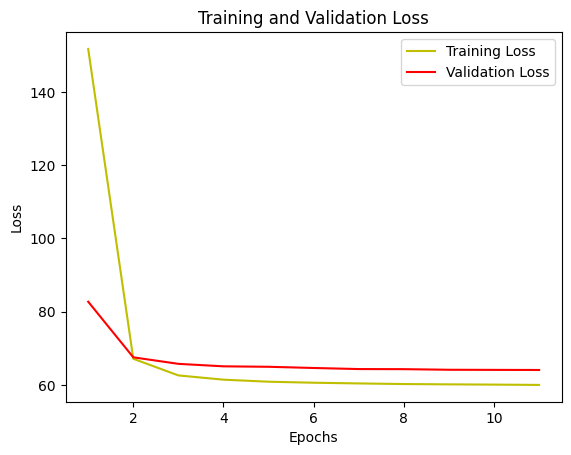


---------------------------------------------------------------------------

Epoch 1/11
476/477 [============================>.] - ETA: 0s - loss: 183.6986
Epoch 1: val_loss improved from inf to 90.56119, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 183.4314 - val_loss: 90.5612
Epoch 2/11
 57/477 [==>...........................] - ETA: 1s - loss: 80.9584

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 74.0815
Epoch 2: val_loss improved from 90.56119 to 69.07468, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 74.1440 - val_loss: 69.0747
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 65.9056
Epoch 3: val_loss improved from 69.07468 to 64.83445, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 65.9382 - val_loss: 64.8344
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 63.4633
Epoch 4: val_loss improved from 64.83445 to 63.07458, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.3507 - val_loss: 63.0746
Epoch 5/11
466/477 [============================>.] - ETA: 0s - loss: 62.2210
Epoch 5: val_loss improved from 63.07458 to 62.22173, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1919 - val_loss: 62.2217

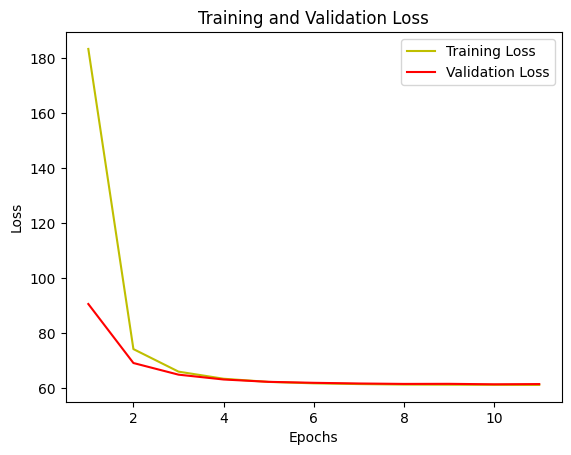


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 179.8438
Epoch 1: val_loss improved from inf to 85.19711, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 178.7801 - val_loss: 85.1971
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 78.7814

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 71.0558
Epoch 2: val_loss improved from 85.19711 to 67.65121, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.9149 - val_loss: 67.6512
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 64.3612
Epoch 3: val_loss improved from 67.65121 to 65.11987, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.4147 - val_loss: 65.1199
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 62.6115
Epoch 4: val_loss improved from 65.11987 to 63.80082, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.3793 - val_loss: 63.8008
Epoch 5/11
466/477 [============================>.] - ETA: 0s - loss: 61.2959
Epoch 5: val_loss improved from 63.80082 to 63.27903, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2488 - val_loss: 63.2790

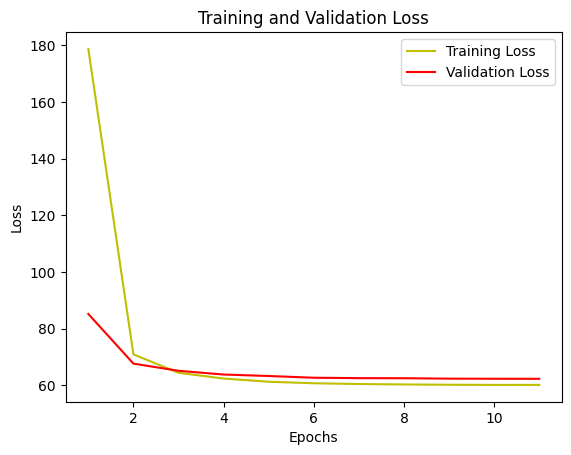


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 165.3100
Epoch 1: val_loss improved from inf to 75.97012, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 163.2999 - val_loss: 75.9701
Epoch 2/11
 65/477 [===>..........................] - ETA: 0s - loss: 73.3228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 68.1201
Epoch 2: val_loss improved from 75.97012 to 64.84142, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 67.9556 - val_loss: 64.8414
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.3106
Epoch 3: val_loss improved from 64.84142 to 62.54316, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4615 - val_loss: 62.5432
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.9430
Epoch 4: val_loss improved from 62.54316 to 61.65872, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8544 - val_loss: 61.6587
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.0914
Epoch 5: val_loss improved from 61.65872 to 61.28131, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1166 - val_loss: 61.2813

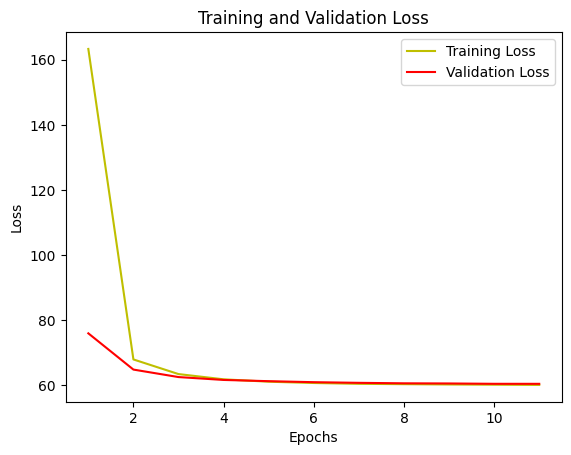


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 197.6217
Epoch 1: val_loss improved from inf to 99.11009, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 195.3533 - val_loss: 99.1101
Epoch 2/11
 67/477 [===>..........................] - ETA: 0s - loss: 90.0248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/477 [===========================>..] - ETA: 0s - loss: 74.1038
Epoch 2: val_loss improved from 99.11009 to 67.10348, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 73.8839 - val_loss: 67.1035
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 65.0097
Epoch 3: val_loss improved from 67.10348 to 64.10054, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.8310 - val_loss: 64.1005
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 63.0555
Epoch 4: val_loss improved from 64.10054 to 62.75452, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.9945 - val_loss: 62.7545
Epoch 5/11
466/477 [============================>.] - ETA: 0s - loss: 61.9294
Epoch 5: val_loss improved from 62.75452 to 62.08681, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0625 - val_loss: 62.0868

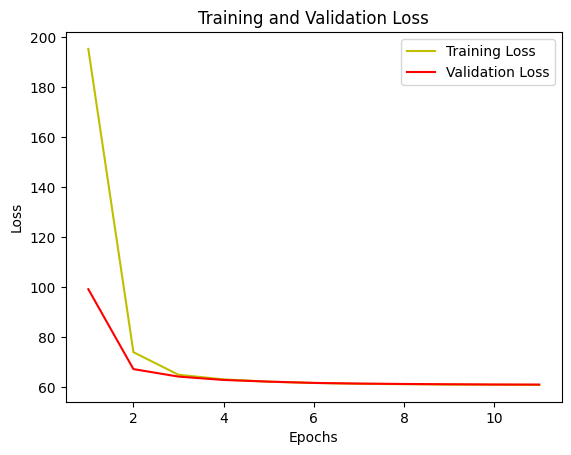


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 190.5811
Epoch 1: val_loss improved from inf to 84.67366, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 188.5641 - val_loss: 84.6737
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 78.6076

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 68.7002
Epoch 2: val_loss improved from 84.67366 to 64.02779, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 68.7372 - val_loss: 64.0278
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 63.4999
Epoch 3: val_loss improved from 64.02779 to 61.40968, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.6522 - val_loss: 61.4097
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 62.2348
Epoch 4: val_loss improved from 61.40968 to 60.20392, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1249 - val_loss: 60.2039
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 61.4034
Epoch 5: val_loss improved from 60.20392 to 59.32388, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.4170 - val_loss: 59.3239

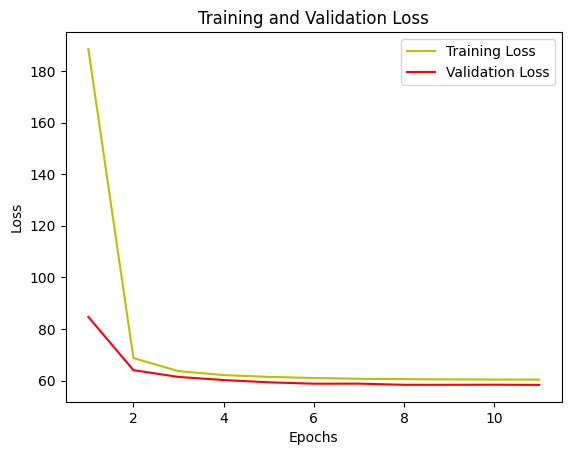


---------------------------------------------------------------------------

Epoch 1/11
477/477 [==============================] - ETA: 0s - loss: 189.4596
Epoch 1: val_loss improved from inf to 95.75130, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 189.4596 - val_loss: 95.7513
Epoch 2/11
 52/477 [==>...........................] - ETA: 1s - loss: 94.8395

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 74.2649
Epoch 2: val_loss improved from 95.75130 to 61.00156, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 74.2513 - val_loss: 61.0016
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 63.4010
Epoch 3: val_loss improved from 61.00156 to 59.06142, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.3620 - val_loss: 59.0614
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 61.7758
Epoch 4: val_loss improved from 59.06142 to 58.41689, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0758 - val_loss: 58.4169
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.6010
Epoch 5: val_loss improved from 58.41689 to 58.10558, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5975 - val_loss: 58.1056

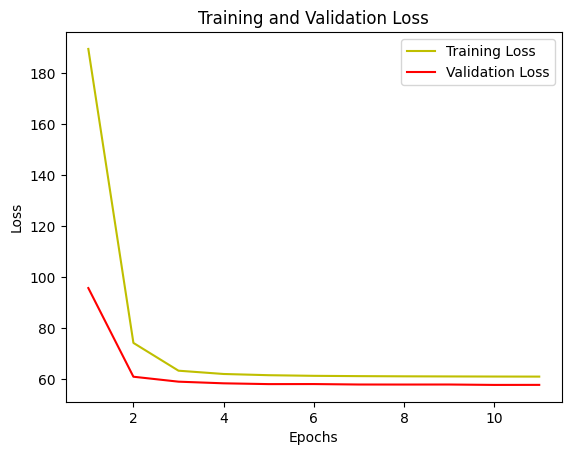


---------------------------------------------------------------------------

Epoch 1/11
460/477 [===========================>..] - ETA: 0s - loss: 177.4003
Epoch 1: val_loss improved from inf to 82.44659, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 174.1145 - val_loss: 82.4466
Epoch 2/11
 55/477 [==>...........................] - ETA: 1s - loss: 81.1671

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 70.0866
Epoch 2: val_loss improved from 82.44659 to 65.63158, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 70.0715 - val_loss: 65.6316
Epoch 3/11
464/477 [============================>.] - ETA: 0s - loss: 63.8760
Epoch 3: val_loss improved from 65.63158 to 62.81579, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.8673 - val_loss: 62.8158
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 62.0234
Epoch 4: val_loss improved from 62.81579 to 61.75527, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9358 - val_loss: 61.7553
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 61.2434
Epoch 5: val_loss improved from 61.75527 to 61.33927, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1138 - val_loss: 61.3393

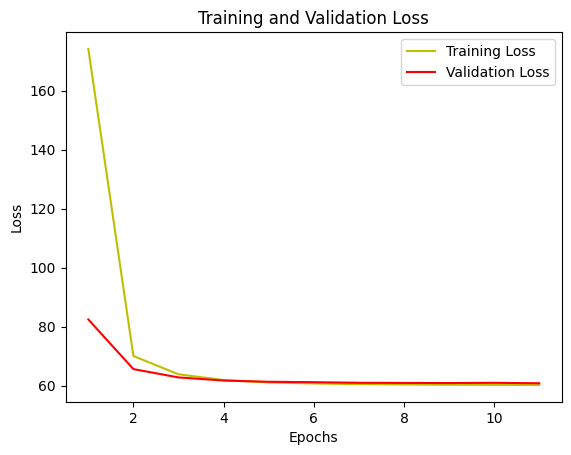


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 163.8009
Epoch 1: val_loss improved from inf to 73.20570, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 161.5735 - val_loss: 73.2057
Epoch 2/11
 55/477 [==>...........................] - ETA: 1s - loss: 71.1687

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 67.4185
Epoch 2: val_loss improved from 73.20570 to 63.97905, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 67.2900 - val_loss: 63.9790
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 63.2706
Epoch 3: val_loss improved from 63.97905 to 62.61919, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.2706 - val_loss: 62.6192
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 62.1279
Epoch 4: val_loss improved from 62.61919 to 61.88725, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1806 - val_loss: 61.8872
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.6283
Epoch 5: val_loss improved from 61.88725 to 61.56485, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6486 - val_loss: 61.5648

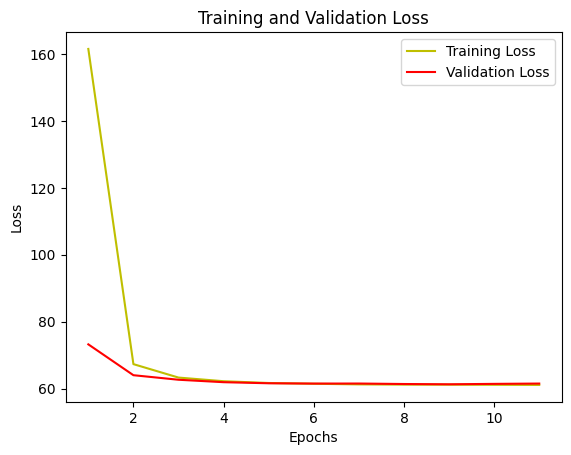


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 210.9329
Epoch 1: val_loss improved from inf to 108.23952, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 208.0472 - val_loss: 108.2395
Epoch 2/11
 42/477 [=>............................] - ETA: 1s - loss: 93.7543

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 78.1189
Epoch 2: val_loss improved from 108.23952 to 67.64123, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 77.8154 - val_loss: 67.6412
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 65.0330
Epoch 3: val_loss improved from 67.64123 to 64.09862, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 65.0247 - val_loss: 64.0986
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 62.7515
Epoch 4: val_loss improved from 64.09862 to 62.96835, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.6826 - val_loss: 62.9683
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 61.7851
Epoch 5: val_loss improved from 62.96835 to 62.31098, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8091 - val_loss: 62.311

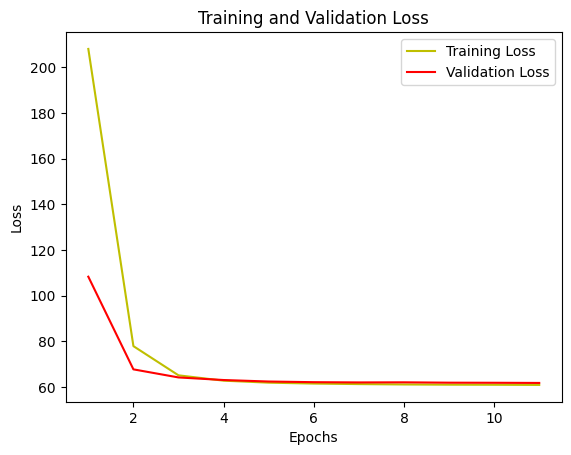


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 215.0480
Epoch 1: val_loss improved from inf to 95.29524, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 211.0205 - val_loss: 95.2952
Epoch 2/11
 57/477 [==>...........................] - ETA: 1s - loss: 84.9162

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 68.8307
Epoch 2: val_loss improved from 95.29524 to 62.70810, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 68.7768 - val_loss: 62.7081
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 62.2952
Epoch 3: val_loss improved from 62.70810 to 61.49845, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.2500 - val_loss: 61.4985
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 61.2497
Epoch 4: val_loss improved from 61.49845 to 60.94744, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.2126 - val_loss: 60.9474
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 60.7614
Epoch 5: val_loss improved from 60.94744 to 60.57666, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7228 - val_loss: 60.5767

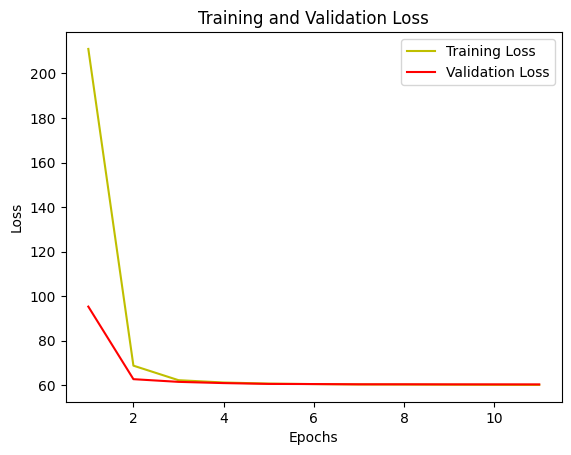


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 148.4621
Epoch 1: val_loss improved from inf to 72.16738, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 146.8472 - val_loss: 72.1674
Epoch 2/11
 34/477 [=>............................] - ETA: 1s - loss: 70.0771

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/477 [===========================>..] - ETA: 0s - loss: 67.6853
Epoch 2: val_loss improved from 72.16738 to 65.16267, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 67.7544 - val_loss: 65.1627
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 63.9972
Epoch 3: val_loss improved from 65.16267 to 62.96404, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.1868 - val_loss: 62.9640
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 62.8984
Epoch 4: val_loss improved from 62.96404 to 61.90301, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7862 - val_loss: 61.9030
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 62.0797
Epoch 5: val_loss improved from 61.90301 to 61.32753, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0857 - val_loss: 61.3275

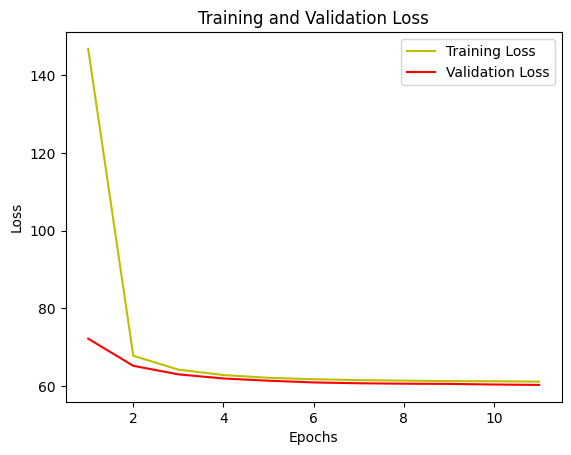


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 229.7820
Epoch 1: val_loss improved from inf to 137.79807, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 229.1046 - val_loss: 137.7981
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 128.7874

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


462/477 [============================>.] - ETA: 0s - loss: 92.6853
Epoch 2: val_loss improved from 137.79807 to 67.24854, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 91.7964 - val_loss: 67.2485
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 65.4317
Epoch 3: val_loss improved from 67.24854 to 60.80203, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 65.2855 - val_loss: 60.8020
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 62.7793
Epoch 4: val_loss improved from 60.80203 to 59.71831, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.8180 - val_loss: 59.7183
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 62.1262
Epoch 5: val_loss improved from 59.71831 to 59.18688, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0462 - val_loss: 59.186

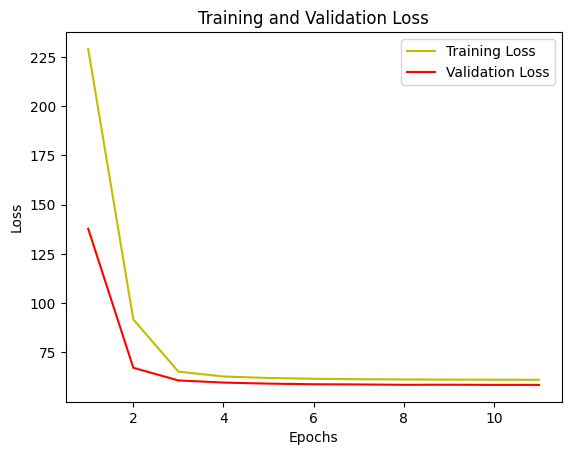


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 173.2812
Epoch 1: val_loss improved from inf to 84.37643, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 172.8221 - val_loss: 84.3764
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 78.9631

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 72.2197
Epoch 2: val_loss improved from 84.37643 to 67.37334, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 72.3615 - val_loss: 67.3733
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 65.3084
Epoch 3: val_loss improved from 67.37334 to 63.37783, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 65.2085 - val_loss: 63.3778
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 63.0965
Epoch 4: val_loss improved from 63.37783 to 61.64132, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.0965 - val_loss: 61.6413
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 62.0135
Epoch 5: val_loss improved from 61.64132 to 60.79369, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1154 - val_loss: 60.7937

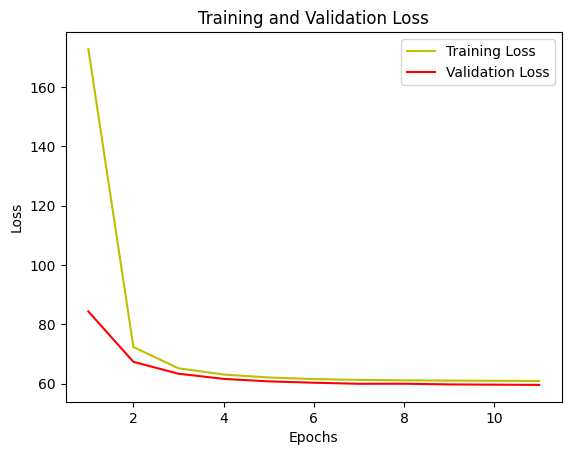


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 171.8434
Epoch 1: val_loss improved from inf to 70.65786, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 170.0020 - val_loss: 70.6579
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 64.3292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 63.8883
Epoch 2: val_loss improved from 70.65786 to 64.71990, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.8651 - val_loss: 64.7199
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 61.5236
Epoch 3: val_loss improved from 64.71990 to 63.94854, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5309 - val_loss: 63.9485
Epoch 4/11
460/477 [===========================>..] - ETA: 0s - loss: 61.0423
Epoch 4: val_loss improved from 63.94854 to 63.48140, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.8312 - val_loss: 63.4814
Epoch 5/11
470/477 [============================>.] - ETA: 0s - loss: 60.5760
Epoch 5: val_loss improved from 63.48140 to 63.18468, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.4926 - val_loss: 63.1847

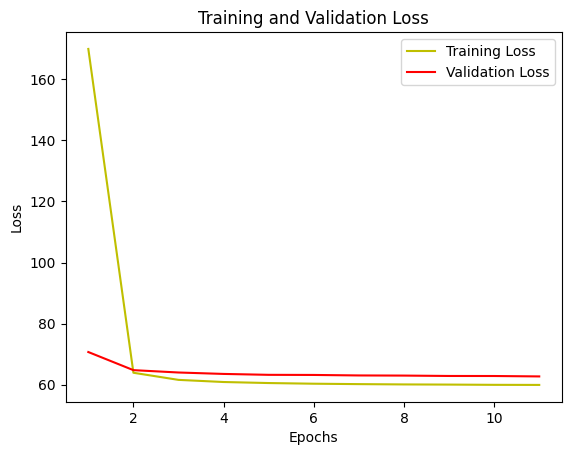


---------------------------------------------------------------------------

Epoch 1/11
459/477 [===========================>..] - ETA: 0s - loss: 171.2375
Epoch 1: val_loss improved from inf to 73.26102, saving model to best_model.h5
477/477 [==============================] - 3s 3ms/step - loss: 167.9643 - val_loss: 73.2610
Epoch 2/11
 58/477 [==>...........................] - ETA: 1s - loss: 76.9620

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 66.4013
Epoch 2: val_loss improved from 73.26102 to 59.82346, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 66.3427 - val_loss: 59.8235
Epoch 3/11
459/477 [===========================>..] - ETA: 0s - loss: 62.5228
Epoch 3: val_loss improved from 59.82346 to 58.63221, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.2741 - val_loss: 58.6322
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 61.6122
Epoch 4: val_loss improved from 58.63221 to 58.09999, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5903 - val_loss: 58.1000
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 61.2348
Epoch 5: val_loss improved from 58.09999 to 57.93408, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3069 - val_loss: 57.9341

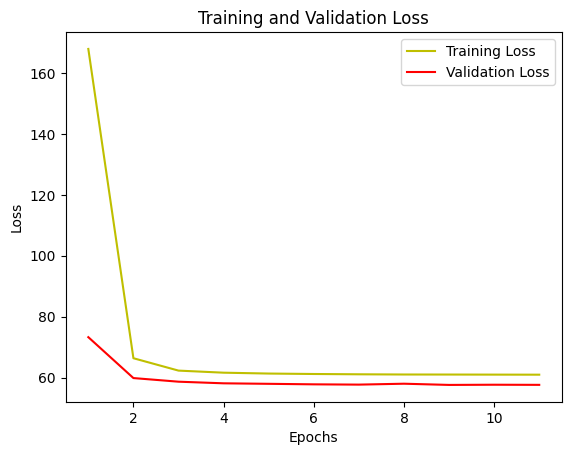


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 170.6526
Epoch 1: val_loss improved from inf to 81.14713, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 168.1862 - val_loss: 81.1471
Epoch 2/11
 36/477 [=>............................] - ETA: 1s - loss: 76.5414

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 67.4860
Epoch 2: val_loss improved from 81.14713 to 67.03163, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 67.3131 - val_loss: 67.0316
Epoch 3/11
455/477 [===========================>..] - ETA: 0s - loss: 63.0951
Epoch 3: val_loss improved from 67.03163 to 65.12885, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7256 - val_loss: 65.1289
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 61.3411
Epoch 4: val_loss improved from 65.12885 to 64.29500, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.4553 - val_loss: 64.2950
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 60.8314
Epoch 5: val_loss improved from 64.29500 to 63.90519, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.8231 - val_loss: 63.9052

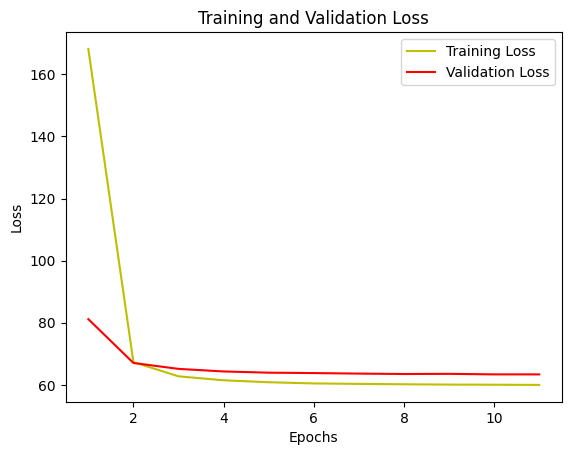


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 204.5567
Epoch 1: val_loss improved from inf to 125.03963, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 203.9562 - val_loss: 125.0396
Epoch 2/11
 44/477 [=>............................] - ETA: 1s - loss: 118.7032

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 81.7336
Epoch 2: val_loss improved from 125.03963 to 68.95087, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 81.7336 - val_loss: 68.9509
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 64.9835
Epoch 3: val_loss improved from 68.95087 to 65.40083, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.0096 - val_loss: 65.4008
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.9531
Epoch 4: val_loss improved from 65.40083 to 63.83673, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7829 - val_loss: 63.8367
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.8484
Epoch 5: val_loss improved from 63.83673 to 63.02650, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.6383 - val_loss: 63.026

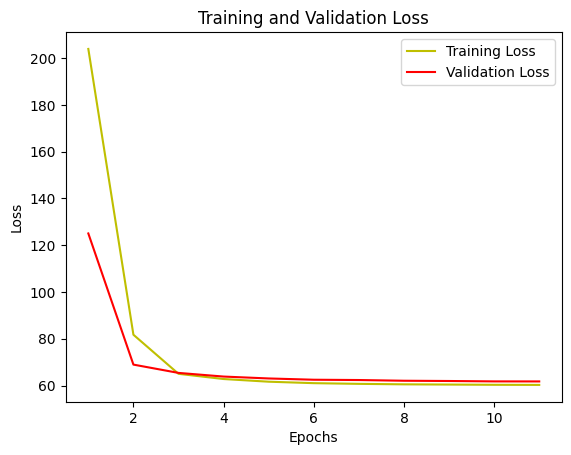


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 173.8459
Epoch 1: val_loss improved from inf to 86.70459, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 170.9930 - val_loss: 86.7046
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 83.5875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 69.7968
Epoch 2: val_loss improved from 86.70459 to 65.66010, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.6496 - val_loss: 65.6601
Epoch 3/11
473/477 [============================>.] - ETA: 0s - loss: 62.0773
Epoch 3: val_loss improved from 65.66010 to 63.74979, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0905 - val_loss: 63.7498
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.0161
Epoch 4: val_loss improved from 63.74979 to 62.95135, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1540 - val_loss: 62.9514
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 60.7590
Epoch 5: val_loss improved from 62.95135 to 62.87819, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.8062 - val_loss: 62.8782

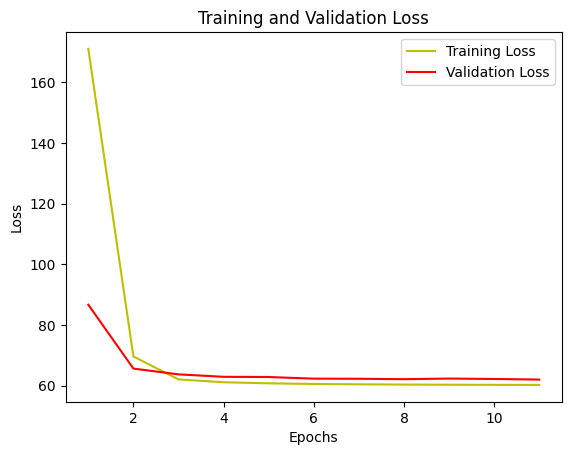


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 203.6052
Epoch 1: val_loss improved from inf to 102.97374, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 201.6544 - val_loss: 102.9737
Epoch 2/11
 38/477 [=>............................] - ETA: 1s - loss: 97.2133 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/477 [===========================>..] - ETA: 0s - loss: 72.5407
Epoch 2: val_loss improved from 102.97374 to 66.84492, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 72.3417 - val_loss: 66.8449
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.3103
Epoch 3: val_loss improved from 66.84492 to 64.76911, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.2209 - val_loss: 64.7691
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 61.8160
Epoch 4: val_loss improved from 64.76911 to 63.94637, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.9148 - val_loss: 63.9464
Epoch 5/11
461/477 [===========================>..] - ETA: 0s - loss: 61.2975
Epoch 5: val_loss improved from 63.94637 to 63.23479, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3032 - val_loss: 63.234

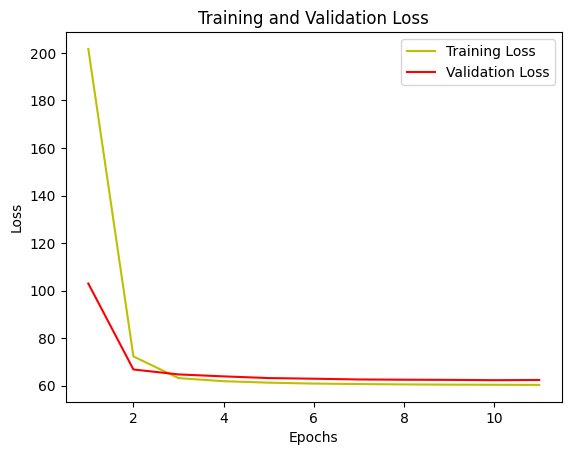


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 185.1312
Epoch 1: val_loss improved from inf to 88.57700, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 183.1801 - val_loss: 88.5770
Epoch 2/11
 65/477 [===>..........................] - ETA: 0s - loss: 86.2354

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 70.2594
Epoch 2: val_loss improved from 88.57700 to 62.64576, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.0627 - val_loss: 62.6458
Epoch 3/11
463/477 [============================>.] - ETA: 0s - loss: 63.3821
Epoch 3: val_loss improved from 62.64576 to 61.02644, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4867 - val_loss: 61.0264
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 62.3606
Epoch 4: val_loss improved from 61.02644 to 60.52136, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.3806 - val_loss: 60.5214
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 61.8405
Epoch 5: val_loss improved from 60.52136 to 60.36818, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.9023 - val_loss: 60.3682

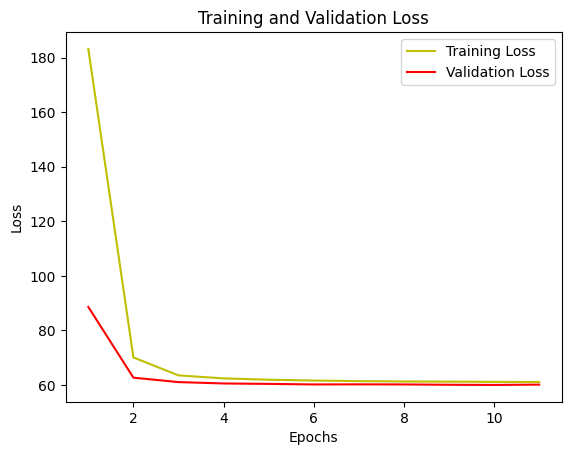


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 193.5563
Epoch 1: val_loss improved from inf to 91.99660, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 190.6924 - val_loss: 91.9966
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 83.4903

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 71.8747
Epoch 2: val_loss improved from 91.99660 to 63.50240, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 71.5630 - val_loss: 63.5024
Epoch 3/11
464/477 [============================>.] - ETA: 0s - loss: 63.1054
Epoch 3: val_loss improved from 63.50240 to 61.14740, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.0164 - val_loss: 61.1474
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 61.4536
Epoch 4: val_loss improved from 61.14740 to 60.39327, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.4118 - val_loss: 60.3933
Epoch 5/11
458/477 [===========================>..] - ETA: 0s - loss: 60.8445
Epoch 5: val_loss improved from 60.39327 to 60.12722, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.8181 - val_loss: 60.1272

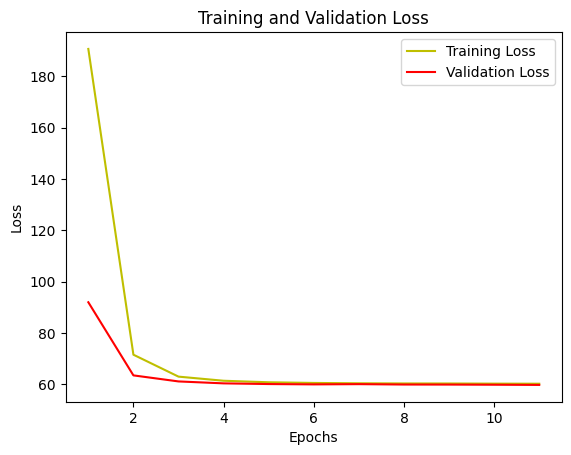


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 195.5656
Epoch 1: val_loss improved from inf to 94.27584, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 194.4356 - val_loss: 94.2758
Epoch 2/11
 55/477 [==>...........................] - ETA: 1s - loss: 90.3842

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


476/477 [============================>.] - ETA: 0s - loss: 71.2318
Epoch 2: val_loss improved from 94.27584 to 65.35133, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 71.2794 - val_loss: 65.3513
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 63.8449
Epoch 3: val_loss improved from 65.35133 to 62.63519, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 63.8449 - val_loss: 62.6352
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.2899
Epoch 4: val_loss improved from 62.63519 to 61.25735, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0025 - val_loss: 61.2574
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 61.0594
Epoch 5: val_loss improved from 61.25735 to 60.66826, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1062 - val_loss: 60.6683

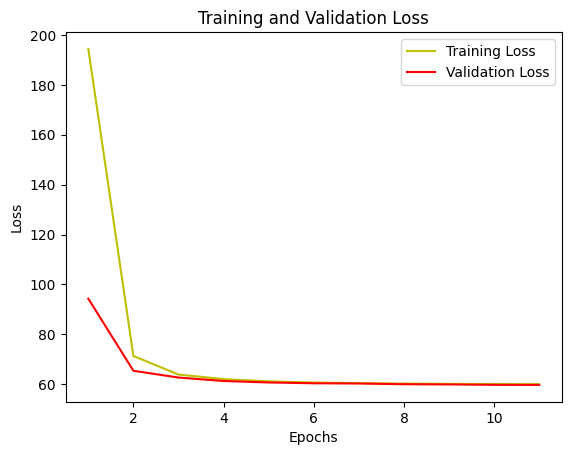


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 204.2786
Epoch 1: val_loss improved from inf to 114.59017, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 202.9894 - val_loss: 114.5902
Epoch 2/11
 22/477 [>.............................] - ETA: 2s - loss: 115.6921

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 76.3796
Epoch 2: val_loss improved from 114.59017 to 65.62611, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 76.3002 - val_loss: 65.6261
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 64.6323
Epoch 3: val_loss improved from 65.62611 to 63.48792, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.7119 - val_loss: 63.4879
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 63.0663
Epoch 4: val_loss improved from 63.48792 to 62.41796, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 62.9180 - val_loss: 62.4180
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.9451
Epoch 5: val_loss improved from 62.41796 to 61.88475, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0096 - val_loss: 61.884

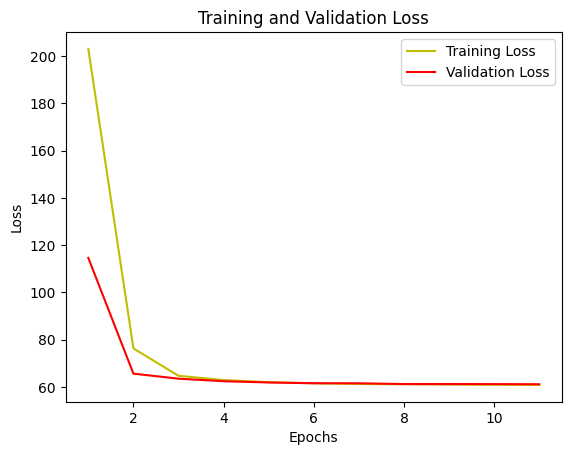


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 204.2720
Epoch 1: val_loss improved from inf to 95.97721, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 201.8380 - val_loss: 95.9772
Epoch 2/11
 45/477 [=>............................] - ETA: 1s - loss: 92.5817

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/477 [============================>.] - ETA: 0s - loss: 71.3828
Epoch 2: val_loss improved from 95.97721 to 63.78247, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 71.3698 - val_loss: 63.7825
Epoch 3/11
461/477 [===========================>..] - ETA: 0s - loss: 63.8918
Epoch 3: val_loss improved from 63.78247 to 61.44759, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.1091 - val_loss: 61.4476
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.3469
Epoch 4: val_loss improved from 61.44759 to 60.42779, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.4263 - val_loss: 60.4278
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.5765
Epoch 5: val_loss improved from 60.42779 to 59.93631, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5765 - val_loss: 59.9363

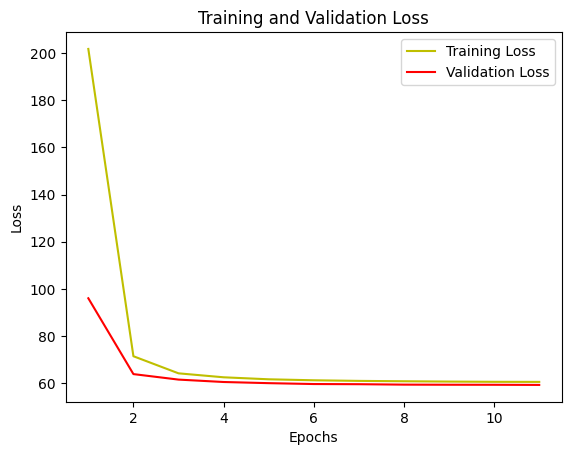


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 184.8112
Epoch 1: val_loss improved from inf to 81.87705, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 181.4719 - val_loss: 81.8771
Epoch 2/11
 63/477 [==>...........................] - ETA: 1s - loss: 79.2811

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 70.7478
Epoch 2: val_loss improved from 81.87705 to 64.74169, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.6794 - val_loss: 64.7417
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.7787
Epoch 3: val_loss improved from 64.74169 to 61.59416, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.8369 - val_loss: 61.5942
Epoch 4/11
457/477 [===========================>..] - ETA: 0s - loss: 61.8601
Epoch 4: val_loss improved from 61.59416 to 60.63545, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8616 - val_loss: 60.6355
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 60.9294
Epoch 5: val_loss improved from 60.63545 to 60.31598, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1897 - val_loss: 60.3160

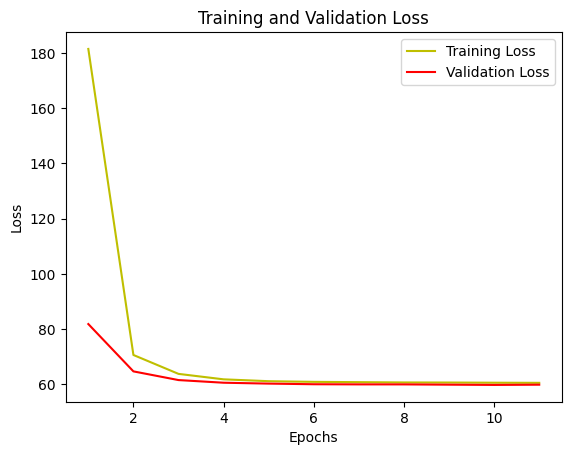


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 186.1871
Epoch 1: val_loss improved from inf to 95.77366, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 184.2966 - val_loss: 95.7737
Epoch 2/11
 65/477 [===>..........................] - ETA: 0s - loss: 87.6797

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 75.9679
Epoch 2: val_loss improved from 95.77366 to 67.56615, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 75.9716 - val_loss: 67.5661
Epoch 3/11
476/477 [============================>.] - ETA: 0s - loss: 63.9430
Epoch 3: val_loss improved from 67.56615 to 64.24749, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.9437 - val_loss: 64.2475
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 61.8698
Epoch 4: val_loss improved from 64.24749 to 62.78517, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8383 - val_loss: 62.7852
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 60.9294
Epoch 5: val_loss improved from 62.78517 to 62.01505, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0016 - val_loss: 62.0150

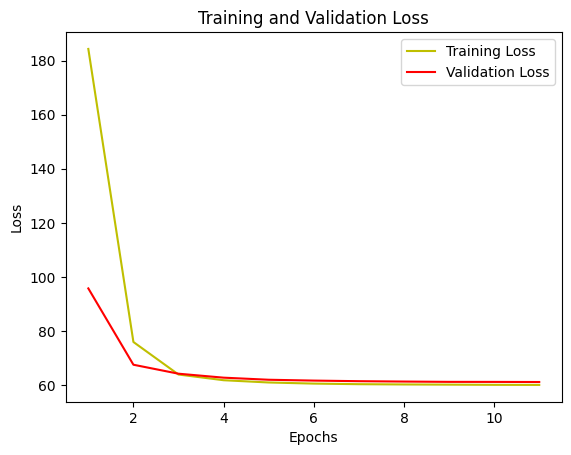


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 168.4189
Epoch 1: val_loss improved from inf to 71.44856, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 167.7538 - val_loss: 71.4486
Epoch 2/11
 56/477 [==>...........................] - ETA: 1s - loss: 69.4157

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 66.9712
Epoch 2: val_loss improved from 71.44856 to 63.18554, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 66.8954 - val_loss: 63.1855
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.1896
Epoch 3: val_loss improved from 63.18554 to 61.80384, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.2876 - val_loss: 61.8038
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 62.2076
Epoch 4: val_loss improved from 61.80384 to 61.34069, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1749 - val_loss: 61.3407
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 61.5601
Epoch 5: val_loss improved from 61.34069 to 60.85605, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6567 - val_loss: 60.8561

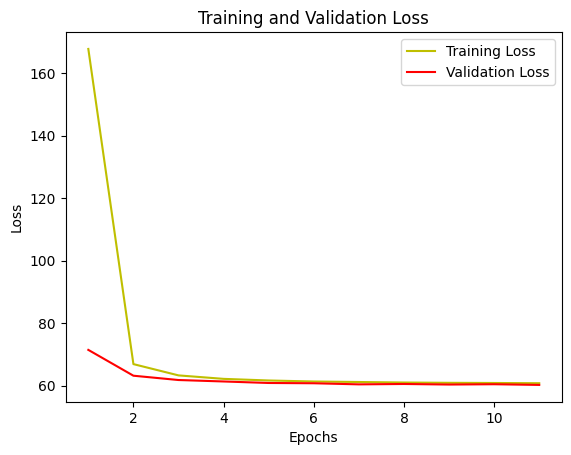


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 171.4161
Epoch 1: val_loss improved from inf to 102.36070, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 171.1923 - val_loss: 102.3607
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 92.6133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 73.6638
Epoch 2: val_loss improved from 102.36070 to 63.68724, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 73.5779 - val_loss: 63.6872
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.0971
Epoch 3: val_loss improved from 63.68724 to 61.80428, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.1745 - val_loss: 61.8043
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.7505
Epoch 4: val_loss improved from 61.80428 to 61.09716, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8665 - val_loss: 61.0972
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 61.1649
Epoch 5: val_loss improved from 61.09716 to 60.91951, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2691 - val_loss: 60.919

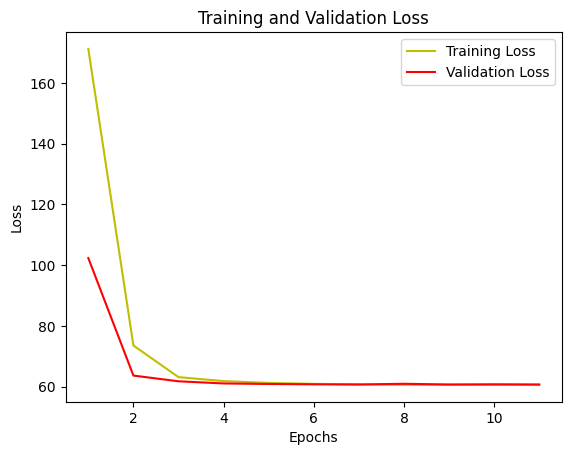


---------------------------------------------------------------------------

Epoch 1/11
473/477 [============================>.] - ETA: 0s - loss: 219.2048
Epoch 1: val_loss improved from inf to 133.72275, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 218.5421 - val_loss: 133.7227
Epoch 2/11
 60/477 [==>...........................] - ETA: 1s - loss: 130.0713

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


460/477 [===========================>..] - ETA: 0s - loss: 90.2558
Epoch 2: val_loss improved from 133.72275 to 66.69351, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 89.6165 - val_loss: 66.6935
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 64.7086
Epoch 3: val_loss improved from 66.69351 to 62.20674, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.5343 - val_loss: 62.2067
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 62.2268
Epoch 4: val_loss improved from 62.20674 to 61.06842, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.2268 - val_loss: 61.0684
Epoch 5/11
471/477 [============================>.] - ETA: 0s - loss: 61.3003
Epoch 5: val_loss improved from 61.06842 to 60.66192, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.4248 - val_loss: 60.661

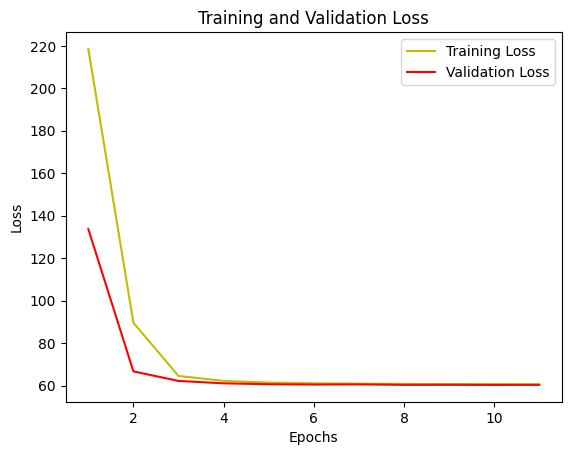


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 152.7117
Epoch 1: val_loss improved from inf to 75.42839, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 151.2791 - val_loss: 75.4284
Epoch 2/11
 39/477 [=>............................] - ETA: 1s - loss: 75.4699

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 69.6410
Epoch 2: val_loss improved from 75.42839 to 65.63332, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.5702 - val_loss: 65.6333
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 64.2489
Epoch 3: val_loss improved from 65.63332 to 62.50219, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.0594 - val_loss: 62.5022
Epoch 4/11
466/477 [============================>.] - ETA: 0s - loss: 62.1918
Epoch 4: val_loss improved from 62.50219 to 61.25977, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.0321 - val_loss: 61.2598
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.2896
Epoch 5: val_loss improved from 61.25977 to 60.89196, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.1512 - val_loss: 60.8920

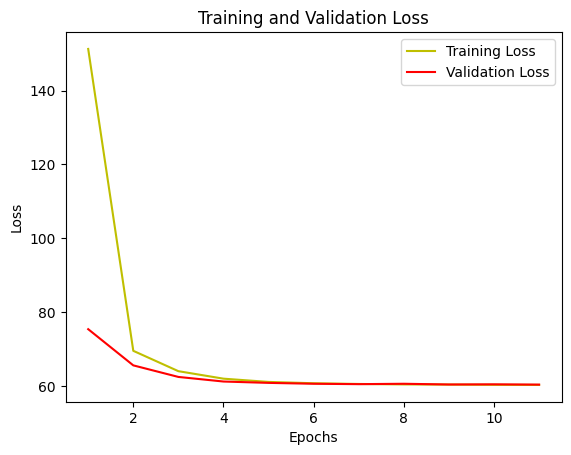


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 168.3326
Epoch 1: val_loss improved from inf to 73.48461, saving model to best_model.h5
477/477 [==============================] - 3s 5ms/step - loss: 166.0002 - val_loss: 73.4846
Epoch 2/11
 27/477 [>.............................] - ETA: 1s - loss: 69.4380

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


470/477 [============================>.] - ETA: 0s - loss: 66.4961
Epoch 2: val_loss improved from 73.48461 to 63.75808, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 66.4270 - val_loss: 63.7581
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 62.4580
Epoch 3: val_loss improved from 63.75808 to 62.23478, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.4007 - val_loss: 62.2348
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 61.4243
Epoch 4: val_loss improved from 62.23478 to 61.71638, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.3513 - val_loss: 61.7164
Epoch 5/11
460/477 [===========================>..] - ETA: 0s - loss: 61.1375
Epoch 5: val_loss improved from 61.71638 to 61.38960, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.9412 - val_loss: 61.3896

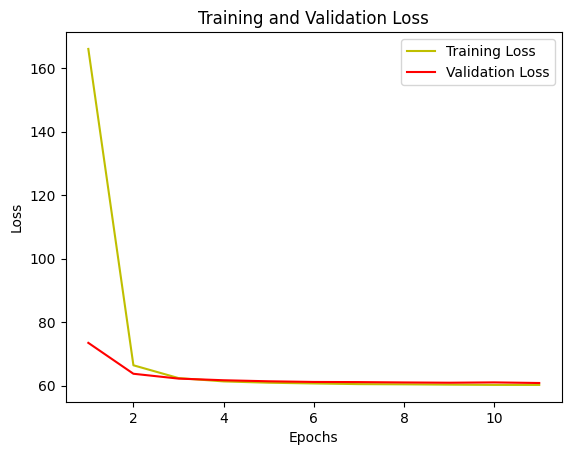


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 175.3226
Epoch 1: val_loss improved from inf to 80.16486, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 173.1643 - val_loss: 80.1649
Epoch 2/11
 27/477 [>.............................] - ETA: 1s - loss: 74.0489

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 67.1373
Epoch 2: val_loss improved from 80.16486 to 63.44762, saving model to best_model.h5
477/477 [==============================] - 2s 5ms/step - loss: 67.0044 - val_loss: 63.4476
Epoch 3/11
468/477 [============================>.] - ETA: 0s - loss: 62.1506
Epoch 3: val_loss improved from 63.44762 to 61.87852, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1254 - val_loss: 61.8785
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 61.2081
Epoch 4: val_loss improved from 61.87852 to 61.29712, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1678 - val_loss: 61.2971
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 60.8055
Epoch 5: val_loss improved from 61.29712 to 61.09039, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.7556 - val_loss: 61.0904

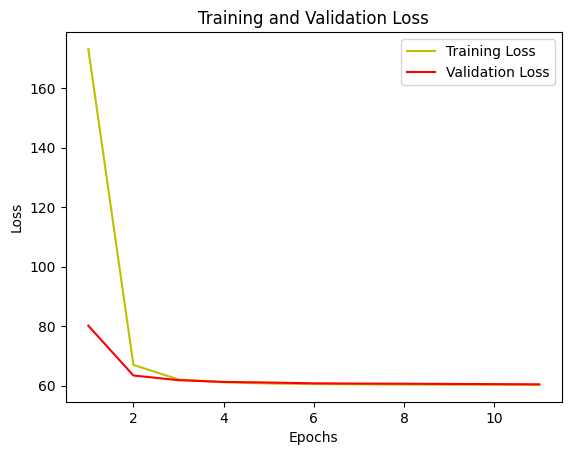


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 147.6522
Epoch 1: val_loss improved from inf to 75.69175, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 146.0670 - val_loss: 75.6917
Epoch 2/11
 51/477 [==>...........................] - ETA: 1s - loss: 71.1150

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 70.2612
Epoch 2: val_loss improved from 75.69175 to 65.10786, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 70.2612 - val_loss: 65.1079
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 64.1677
Epoch 3: val_loss improved from 65.10786 to 62.27708, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.1618 - val_loss: 62.2771
Epoch 4/11
471/477 [============================>.] - ETA: 0s - loss: 61.8807
Epoch 4: val_loss improved from 62.27708 to 61.44576, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8262 - val_loss: 61.4458
Epoch 5/11
462/477 [============================>.] - ETA: 0s - loss: 60.8298
Epoch 5: val_loss improved from 61.44576 to 60.63598, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.9475 - val_loss: 60.6360

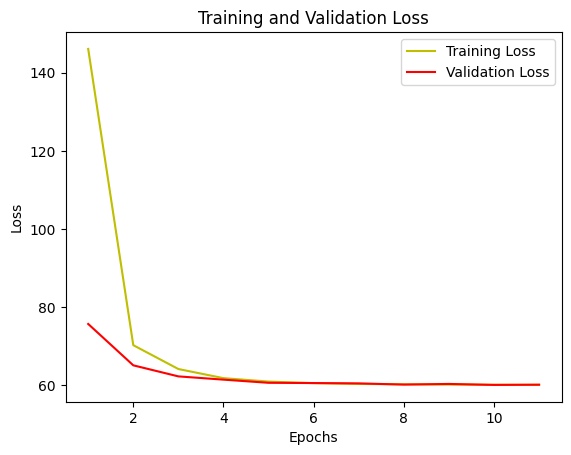


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 141.4629
Epoch 1: val_loss improved from inf to 70.97025, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 140.5490 - val_loss: 70.9702
Epoch 2/11
 51/477 [==>...........................] - ETA: 1s - loss: 72.1054

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


467/477 [============================>.] - ETA: 0s - loss: 67.2267
Epoch 2: val_loss improved from 70.97025 to 62.99442, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 67.0410 - val_loss: 62.9944
Epoch 3/11
469/477 [============================>.] - ETA: 0s - loss: 63.2877
Epoch 3: val_loss improved from 62.99442 to 60.66656, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 63.1487 - val_loss: 60.6666
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 61.8895
Epoch 4: val_loss improved from 60.66656 to 59.76411, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8478 - val_loss: 59.7641
Epoch 5/11
462/477 [============================>.] - ETA: 0s - loss: 61.2243
Epoch 5: val_loss improved from 59.76411 to 59.30688, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2963 - val_loss: 59.3069

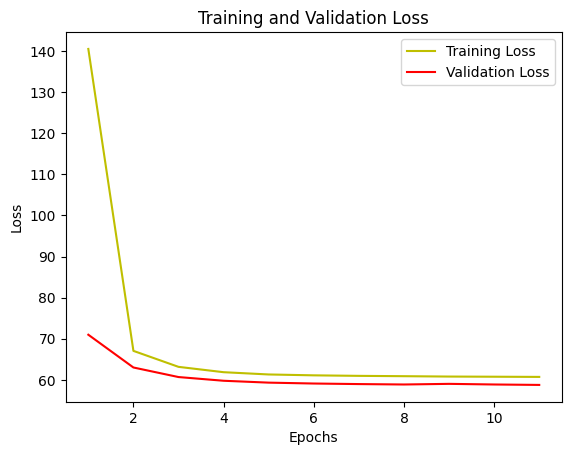


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 154.3602
Epoch 1: val_loss improved from inf to 72.72832, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 152.5022 - val_loss: 72.7283
Epoch 2/11
 49/477 [==>...........................] - ETA: 1s - loss: 81.2039

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 66.9724
Epoch 2: val_loss improved from 72.72832 to 63.72036, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 66.9379 - val_loss: 63.7204
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 62.6625
Epoch 3: val_loss improved from 63.72036 to 62.00321, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.6625 - val_loss: 62.0032
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 61.5235
Epoch 4: val_loss improved from 62.00321 to 61.47170, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5235 - val_loss: 61.4717
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 61.0859
Epoch 5: val_loss improved from 61.47170 to 61.10190, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.9722 - val_loss: 61.1019

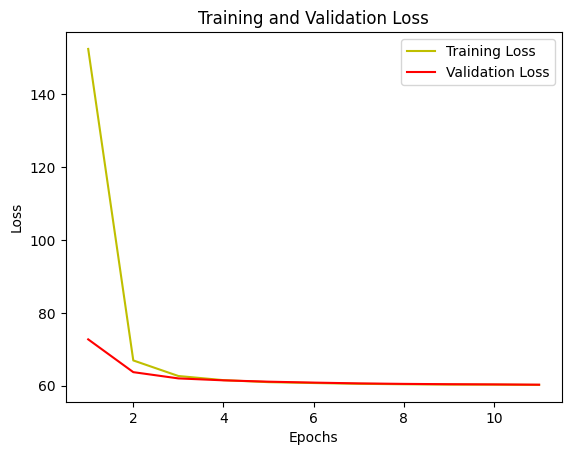


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 189.9699
Epoch 1: val_loss improved from inf to 73.84125, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 189.4525 - val_loss: 73.8412
Epoch 2/11
 56/477 [==>...........................] - ETA: 1s - loss: 76.0680

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/477 [============================>.] - ETA: 0s - loss: 67.6903
Epoch 2: val_loss improved from 73.84125 to 61.89613, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 67.6868 - val_loss: 61.8961
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 63.7355
Epoch 3: val_loss improved from 61.89613 to 60.14611, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.7140 - val_loss: 60.1461
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 62.6574
Epoch 4: val_loss improved from 60.14611 to 59.38145, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.6447 - val_loss: 59.3815
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 62.2214
Epoch 5: val_loss improved from 59.38145 to 58.85145, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1301 - val_loss: 58.8514

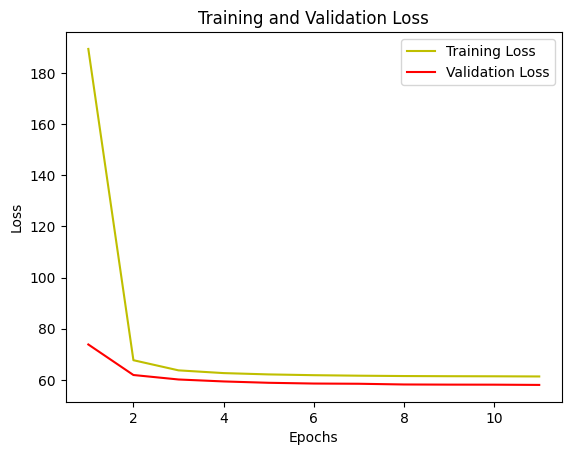


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 155.2094
Epoch 1: val_loss improved from inf to 75.44613, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 153.8223 - val_loss: 75.4461
Epoch 2/11
 50/477 [==>...........................] - ETA: 1s - loss: 69.8755

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 68.3131
Epoch 2: val_loss improved from 75.44613 to 65.32031, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 68.2949 - val_loss: 65.3203
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 63.4234
Epoch 3: val_loss improved from 65.32031 to 62.94275, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4044 - val_loss: 62.9428
Epoch 4/11
455/477 [===========================>..] - ETA: 0s - loss: 61.7410
Epoch 4: val_loss improved from 62.94275 to 62.04787, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.8758 - val_loss: 62.0479
Epoch 5/11
476/477 [============================>.] - ETA: 0s - loss: 61.3332
Epoch 5: val_loss improved from 62.04787 to 61.65392, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.2862 - val_loss: 61.6539

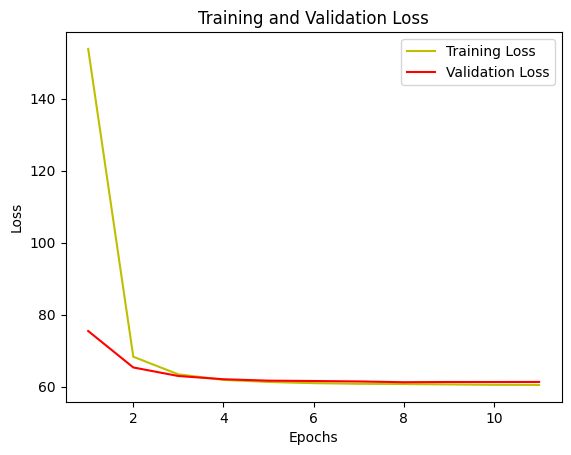


---------------------------------------------------------------------------

Epoch 1/11
465/477 [============================>.] - ETA: 0s - loss: 206.6615
Epoch 1: val_loss improved from inf to 123.72776, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 205.0368 - val_loss: 123.7278
Epoch 2/11
 58/477 [==>...........................] - ETA: 1s - loss: 118.0658

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


476/477 [============================>.] - ETA: 0s - loss: 87.2418
Epoch 2: val_loss improved from 123.72776 to 69.98277, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 87.1968 - val_loss: 69.9828
Epoch 3/11
462/477 [============================>.] - ETA: 0s - loss: 64.5700
Epoch 3: val_loss improved from 69.98277 to 61.18608, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.3984 - val_loss: 61.1861
Epoch 4/11
472/477 [============================>.] - ETA: 0s - loss: 61.2033
Epoch 4: val_loss improved from 61.18608 to 59.89742, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1047 - val_loss: 59.8974
Epoch 5/11
470/477 [============================>.] - ETA: 0s - loss: 60.5471
Epoch 5: val_loss improved from 59.89742 to 59.59003, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.5576 - val_loss: 59.590

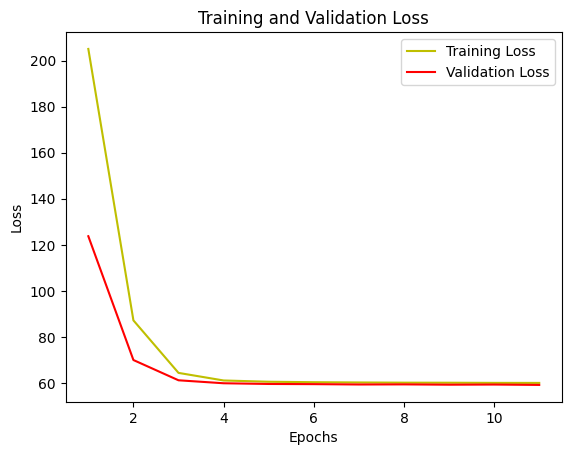


---------------------------------------------------------------------------

Epoch 1/11
476/477 [============================>.] - ETA: 0s - loss: 199.1644
Epoch 1: val_loss improved from inf to 84.10212, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 198.9653 - val_loss: 84.1021
Epoch 2/11
 42/477 [=>............................] - ETA: 1s - loss: 84.7778

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 69.9150
Epoch 2: val_loss improved from 84.10212 to 64.82378, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 69.8658 - val_loss: 64.8238
Epoch 3/11
459/477 [===========================>..] - ETA: 0s - loss: 64.2825
Epoch 3: val_loss improved from 64.82378 to 62.76699, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 64.3652 - val_loss: 62.7670
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 62.8002
Epoch 4: val_loss improved from 62.76699 to 61.64148, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.7867 - val_loss: 61.6415
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 62.0388
Epoch 5: val_loss improved from 61.64148 to 61.09768, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0779 - val_loss: 61.0977

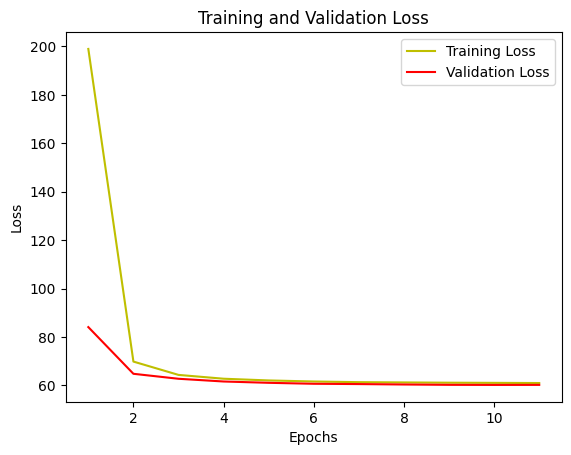


---------------------------------------------------------------------------

Epoch 1/11
462/477 [============================>.] - ETA: 0s - loss: 143.7128
Epoch 1: val_loss improved from inf to 77.33167, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 141.7142 - val_loss: 77.3317
Epoch 2/11
 55/477 [==>...........................] - ETA: 1s - loss: 80.4455

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


462/477 [============================>.] - ETA: 0s - loss: 72.4796
Epoch 2: val_loss improved from 77.33167 to 62.96021, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 72.3369 - val_loss: 62.9602
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 64.8865
Epoch 3: val_loss improved from 62.96021 to 59.75235, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 65.0186 - val_loss: 59.7523
Epoch 4/11
460/477 [===========================>..] - ETA: 0s - loss: 62.8520
Epoch 4: val_loss improved from 59.75235 to 58.86107, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.9294 - val_loss: 58.8611
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 62.1872
Epoch 5: val_loss improved from 58.86107 to 58.47083, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.2869 - val_loss: 58.4708

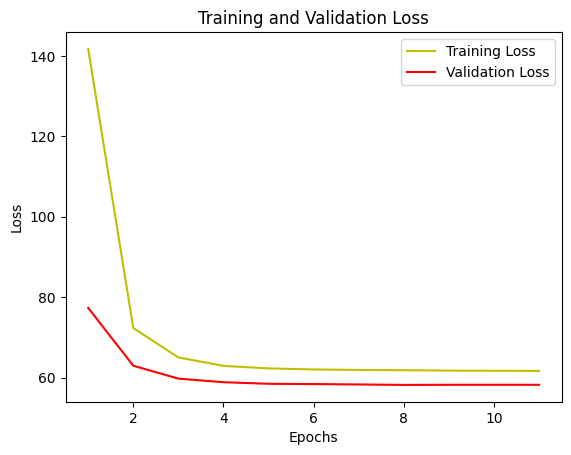


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 181.4337
Epoch 1: val_loss improved from inf to 91.36623, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 180.7668 - val_loss: 91.3662
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 88.5725

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 76.2767
Epoch 2: val_loss improved from 91.36623 to 69.66632, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 76.2628 - val_loss: 69.6663
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 65.6092
Epoch 3: val_loss improved from 69.66632 to 64.45966, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 65.5348 - val_loss: 64.4597
Epoch 4/11
463/477 [============================>.] - ETA: 0s - loss: 61.9133
Epoch 4: val_loss improved from 64.45966 to 62.24847, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9067 - val_loss: 62.2485
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 60.6535
Epoch 5: val_loss improved from 62.24847 to 61.75584, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.5994 - val_loss: 61.7558

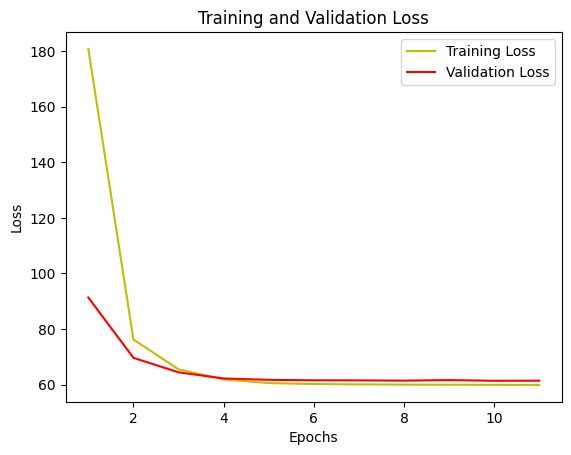


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 207.3175
Epoch 1: val_loss improved from inf to 97.03699, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 205.1892 - val_loss: 97.0370
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 89.6228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 73.7075
Epoch 2: val_loss improved from 97.03699 to 66.70808, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 73.7029 - val_loss: 66.7081
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 63.5449
Epoch 3: val_loss improved from 66.70808 to 63.81013, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.6430 - val_loss: 63.8101
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.9438
Epoch 4: val_loss improved from 63.81013 to 62.73567, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.9216 - val_loss: 62.7357
Epoch 5/11
472/477 [============================>.] - ETA: 0s - loss: 61.2645
Epoch 5: val_loss improved from 62.73567 to 62.19427, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2093 - val_loss: 62.1943

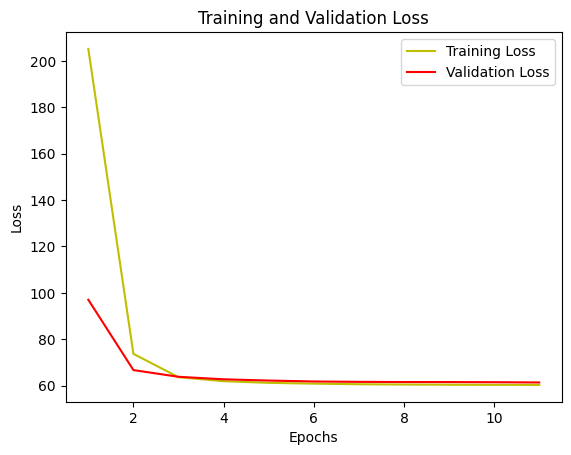


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 160.3991
Epoch 1: val_loss improved from inf to 77.69039, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 159.8028 - val_loss: 77.6904
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 77.4461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/477 [============================>.] - ETA: 0s - loss: 69.1784
Epoch 2: val_loss improved from 77.69039 to 64.08089, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.0596 - val_loss: 64.0809
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 64.1496
Epoch 3: val_loss improved from 64.08089 to 61.58175, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.0945 - val_loss: 61.5817
Epoch 4/11
465/477 [============================>.] - ETA: 0s - loss: 62.6620
Epoch 4: val_loss improved from 61.58175 to 60.65830, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.6492 - val_loss: 60.6583
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 61.9180
Epoch 5: val_loss improved from 60.65830 to 60.11496, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0691 - val_loss: 60.1150

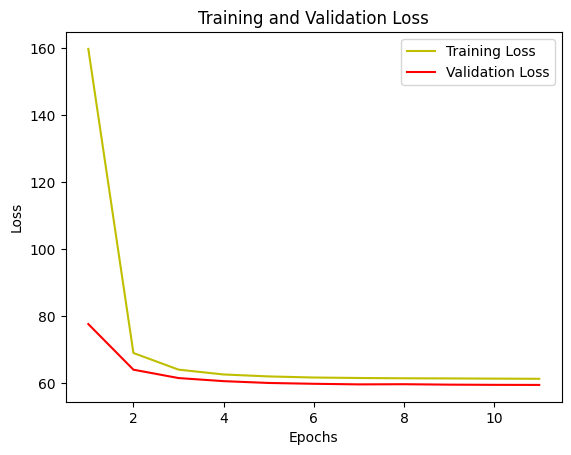


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 185.0867
Epoch 1: val_loss improved from inf to 118.94904, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 183.2378 - val_loss: 118.9490
Epoch 2/11
 36/477 [=>............................] - ETA: 1s - loss: 126.5081

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 80.0809
Epoch 2: val_loss improved from 118.94904 to 66.56004, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 80.0809 - val_loss: 66.5600
Epoch 3/11
464/477 [============================>.] - ETA: 0s - loss: 62.8812
Epoch 3: val_loss improved from 66.56004 to 63.14561, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.7175 - val_loss: 63.1456
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 61.2314
Epoch 4: val_loss improved from 63.14561 to 62.61819, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.1507 - val_loss: 62.6182
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 60.8162
Epoch 5: val_loss improved from 62.61819 to 62.28090, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.7714 - val_loss: 62.280

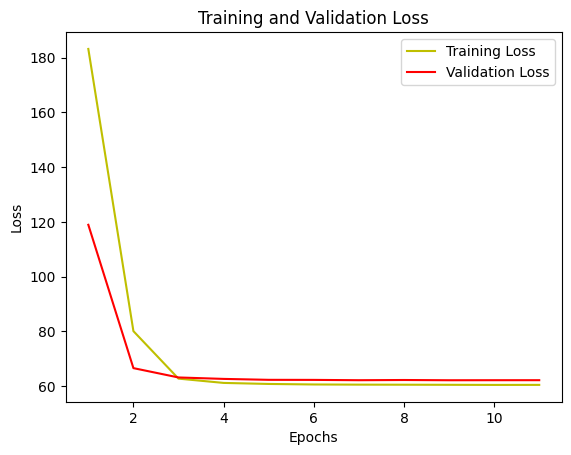


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 174.3414
Epoch 1: val_loss improved from inf to 84.62406, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 171.7378 - val_loss: 84.6241
Epoch 2/11
 40/477 [=>............................] - ETA: 1s - loss: 88.7587

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/477 [============================>.] - ETA: 0s - loss: 71.9131
Epoch 2: val_loss improved from 84.62406 to 63.15652, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 71.8094 - val_loss: 63.1565
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 63.9090
Epoch 3: val_loss improved from 63.15652 to 61.50511, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.8667 - val_loss: 61.5051
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 62.0810
Epoch 4: val_loss improved from 61.50511 to 61.00768, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.2712 - val_loss: 61.0077
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.3174
Epoch 5: val_loss improved from 61.00768 to 60.53998, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.5585 - val_loss: 60.5400

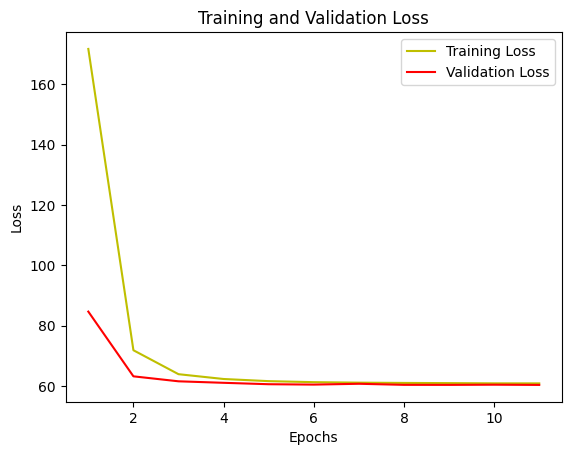


---------------------------------------------------------------------------

Epoch 1/11
474/477 [============================>.] - ETA: 0s - loss: 226.2522
Epoch 1: val_loss improved from inf to 157.36543, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 225.8310 - val_loss: 157.3654
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 137.7084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 96.1008
Epoch 2: val_loss improved from 157.36543 to 63.93687, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 95.8047 - val_loss: 63.9369
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 63.1636
Epoch 3: val_loss improved from 63.93687 to 61.57256, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.2097 - val_loss: 61.5726
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 62.1095
Epoch 4: val_loss improved from 61.57256 to 61.09249, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0611 - val_loss: 61.0925
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.4609
Epoch 5: val_loss improved from 61.09249 to 60.70626, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6248 - val_loss: 60.706

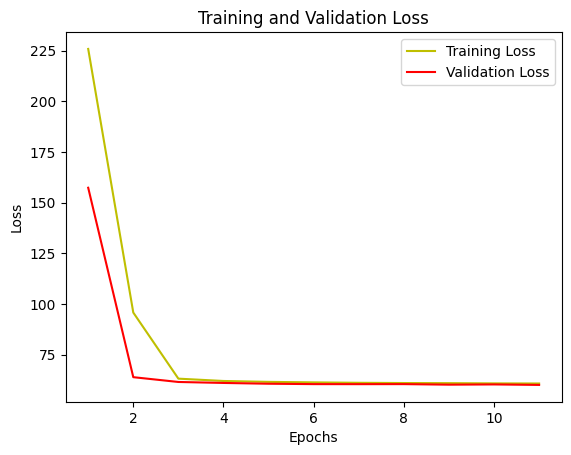


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 141.8783
Epoch 1: val_loss improved from inf to 71.53600, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 140.7376 - val_loss: 71.5360
Epoch 2/11
 71/477 [===>..........................] - ETA: 0s - loss: 71.5542

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/477 [============================>.] - ETA: 0s - loss: 66.7314
Epoch 2: val_loss improved from 71.53600 to 65.46492, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.6585 - val_loss: 65.4649
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 63.4980
Epoch 3: val_loss improved from 65.46492 to 63.47120, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4825 - val_loss: 63.4712
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 62.1284
Epoch 4: val_loss improved from 63.47120 to 62.57961, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.1284 - val_loss: 62.5796
Epoch 5/11
461/477 [===========================>..] - ETA: 0s - loss: 60.7767
Epoch 5: val_loss improved from 62.57961 to 62.07729, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.4219 - val_loss: 62.0773

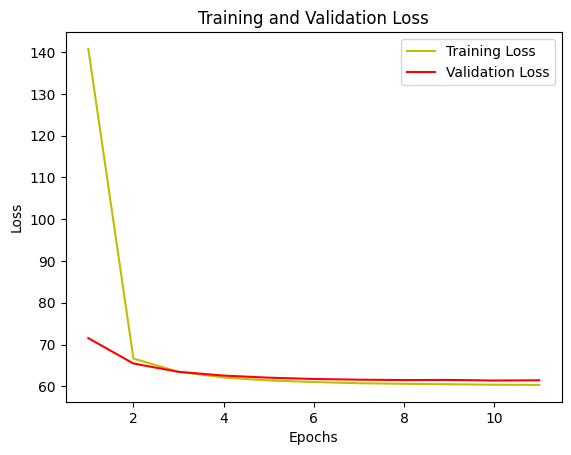


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 171.1288
Epoch 1: val_loss improved from inf to 75.73441, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 168.8396 - val_loss: 75.7344
Epoch 2/11
 41/477 [=>............................] - ETA: 1s - loss: 72.0159

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


471/477 [============================>.] - ETA: 0s - loss: 66.4999
Epoch 2: val_loss improved from 75.73441 to 60.31903, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 66.4311 - val_loss: 60.3190
Epoch 3/11
457/477 [===========================>..] - ETA: 0s - loss: 62.5464
Epoch 3: val_loss improved from 60.31903 to 58.84935, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.3884 - val_loss: 58.8493
Epoch 4/11
456/477 [===========================>..] - ETA: 0s - loss: 61.5462
Epoch 4: val_loss improved from 58.84935 to 58.42469, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.7412 - val_loss: 58.4247
Epoch 5/11
460/477 [===========================>..] - ETA: 0s - loss: 61.5114
Epoch 5: val_loss improved from 58.42469 to 58.20059, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.5004 - val_loss: 58.2006

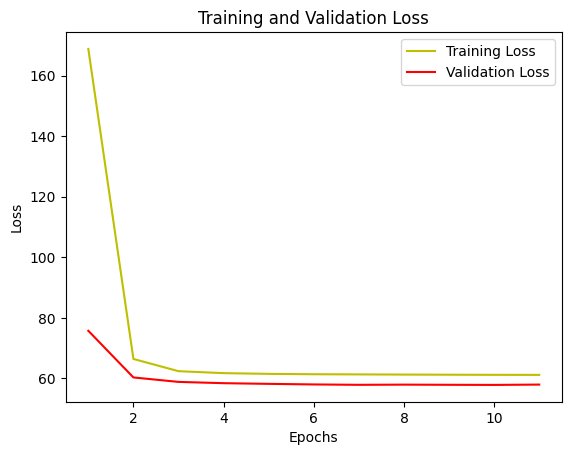


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 177.9109
Epoch 1: val_loss improved from inf to 78.59404, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 175.0214 - val_loss: 78.5940
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 77.0860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/477 [===========================>..] - ETA: 0s - loss: 71.4593
Epoch 2: val_loss improved from 78.59404 to 64.94920, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 71.3292 - val_loss: 64.9492
Epoch 3/11
464/477 [============================>.] - ETA: 0s - loss: 65.0443
Epoch 3: val_loss improved from 64.94920 to 61.59225, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.6598 - val_loss: 61.5923
Epoch 4/11
476/477 [============================>.] - ETA: 0s - loss: 62.3193
Epoch 4: val_loss improved from 61.59225 to 60.36665, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.3045 - val_loss: 60.3666
Epoch 5/11
477/477 [==============================] - ETA: 0s - loss: 61.4680
Epoch 5: val_loss improved from 60.36665 to 59.87658, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.4680 - val_loss: 59.8766

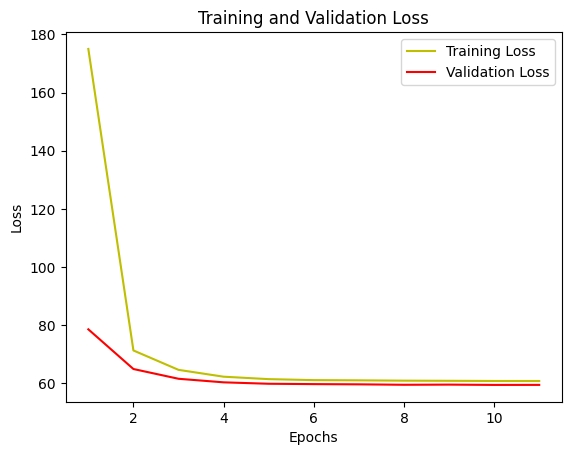


---------------------------------------------------------------------------

Epoch 1/11
464/477 [============================>.] - ETA: 0s - loss: 202.4897
Epoch 1: val_loss improved from inf to 86.46599, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 199.6124 - val_loss: 86.4660
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 82.3272

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 67.4021
Epoch 2: val_loss improved from 86.46599 to 61.06196, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 67.3041 - val_loss: 61.0620
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 61.6742
Epoch 3: val_loss improved from 61.06196 to 60.14924, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6742 - val_loss: 60.1492
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 60.9809
Epoch 4: val_loss improved from 60.14924 to 59.83972, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0554 - val_loss: 59.8397
Epoch 5/11
469/477 [============================>.] - ETA: 0s - loss: 60.7947
Epoch 5: val_loss improved from 59.83972 to 59.75375, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7501 - val_loss: 59.7537

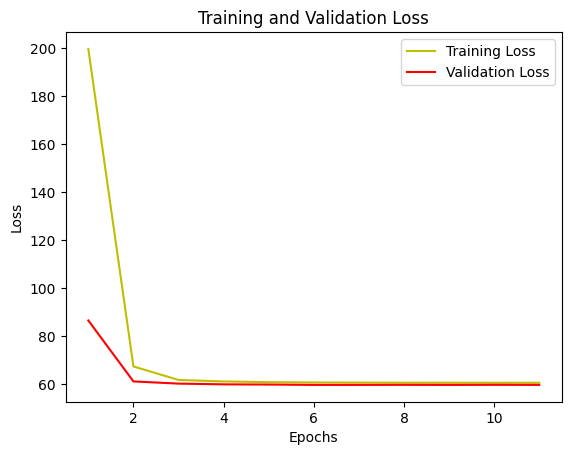


---------------------------------------------------------------------------

Epoch 1/11
468/477 [============================>.] - ETA: 0s - loss: 172.4856
Epoch 1: val_loss improved from inf to 89.90257, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 170.9930 - val_loss: 89.9026
Epoch 2/11
 52/477 [==>...........................] - ETA: 1s - loss: 81.5801

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/477 [============================>.] - ETA: 0s - loss: 69.6720
Epoch 2: val_loss improved from 89.90257 to 64.39200, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 69.6184 - val_loss: 64.3920
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 62.5877
Epoch 3: val_loss improved from 64.39200 to 62.30994, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.6232 - val_loss: 62.3099
Epoch 4/11
458/477 [===========================>..] - ETA: 0s - loss: 61.0156
Epoch 4: val_loss improved from 62.30994 to 61.46694, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3043 - val_loss: 61.4669
Epoch 5/11
467/477 [============================>.] - ETA: 0s - loss: 60.8608
Epoch 5: val_loss improved from 61.46694 to 61.31094, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.7620 - val_loss: 61.3109

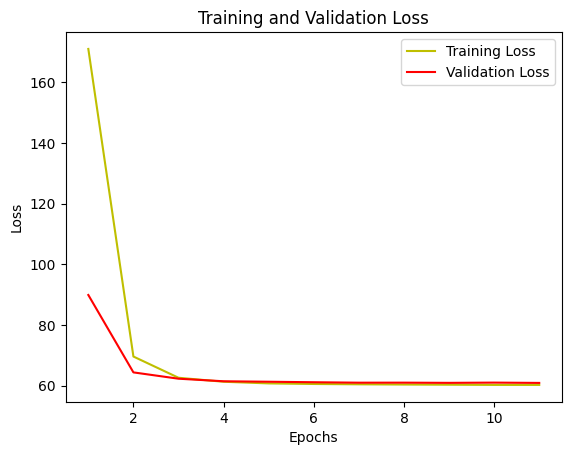


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 194.0875
Epoch 1: val_loss improved from inf to 92.20437, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 191.7435 - val_loss: 92.2044
Epoch 2/11
 61/477 [==>...........................] - ETA: 1s - loss: 85.7999

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 70.3072
Epoch 2: val_loss improved from 92.20437 to 67.56733, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 70.0650 - val_loss: 67.5673
Epoch 3/11
467/477 [============================>.] - ETA: 0s - loss: 62.1593
Epoch 3: val_loss improved from 67.56733 to 64.66563, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1396 - val_loss: 64.6656
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 60.9486
Epoch 4: val_loss improved from 64.66563 to 64.11489, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.9799 - val_loss: 64.1149
Epoch 5/11
463/477 [============================>.] - ETA: 0s - loss: 60.9617
Epoch 5: val_loss improved from 64.11489 to 63.88502, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 60.7319 - val_loss: 63.8850

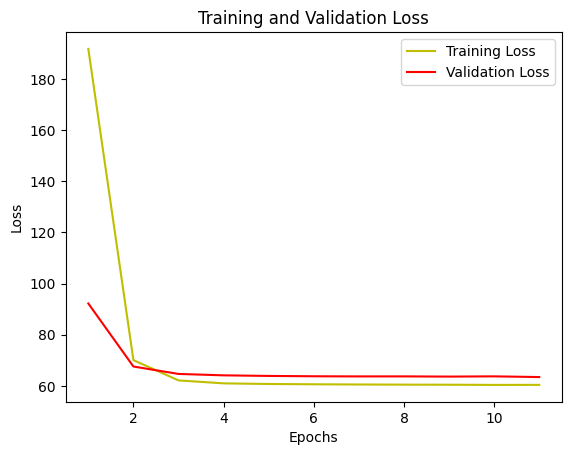


---------------------------------------------------------------------------

Epoch 1/11
463/477 [============================>.] - ETA: 0s - loss: 189.6619
Epoch 1: val_loss improved from inf to 81.26826, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 186.4232 - val_loss: 81.2683
Epoch 2/11
 53/477 [==>...........................] - ETA: 1s - loss: 78.7160

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 68.3581
Epoch 2: val_loss improved from 81.26826 to 67.34026, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 68.2511 - val_loss: 67.3403
Epoch 3/11
466/477 [============================>.] - ETA: 0s - loss: 62.8031
Epoch 3: val_loss improved from 67.34026 to 64.15281, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.8704 - val_loss: 64.1528
Epoch 4/11
460/477 [===========================>..] - ETA: 0s - loss: 60.8610
Epoch 4: val_loss improved from 64.15281 to 62.69969, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 60.8562 - val_loss: 62.6997
Epoch 5/11
464/477 [============================>.] - ETA: 0s - loss: 59.9380
Epoch 5: val_loss improved from 62.69969 to 61.98216, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 59.9975 - val_loss: 61.9822

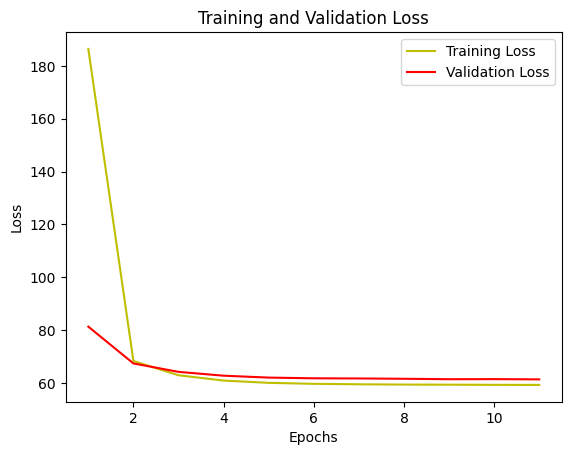


---------------------------------------------------------------------------

Epoch 1/11
469/477 [============================>.] - ETA: 0s - loss: 154.8681
Epoch 1: val_loss improved from inf to 81.05208, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 153.6351 - val_loss: 81.0521
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 78.6215

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


477/477 [==============================] - ETA: 0s - loss: 72.3141
Epoch 2: val_loss improved from 81.05208 to 68.83992, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 72.3141 - val_loss: 68.8399
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 64.9219
Epoch 3: val_loss improved from 68.83992 to 64.80811, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 64.9044 - val_loss: 64.8081
Epoch 4/11
473/477 [============================>.] - ETA: 0s - loss: 62.2639
Epoch 4: val_loss improved from 64.80811 to 63.30121, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1853 - val_loss: 63.3012
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 61.0027
Epoch 5: val_loss improved from 63.30121 to 62.58886, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0471 - val_loss: 62.5889

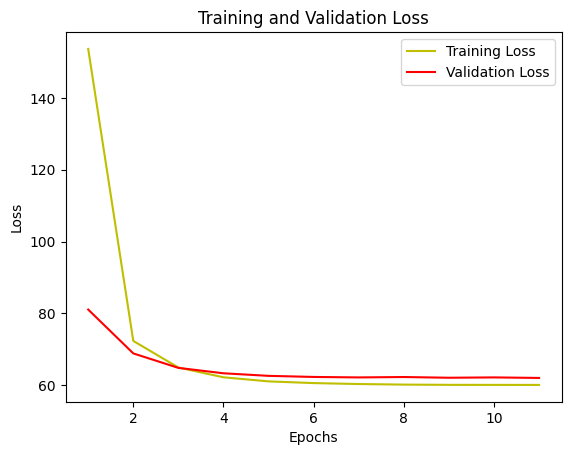


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 205.2057
Epoch 1: val_loss improved from inf to 97.63602, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 204.7372 - val_loss: 97.6360
Epoch 2/11
 56/477 [==>...........................] - ETA: 1s - loss: 94.0412

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 68.5180
Epoch 2: val_loss improved from 97.63602 to 60.73166, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 68.4438 - val_loss: 60.7317
Epoch 3/11
472/477 [============================>.] - ETA: 0s - loss: 61.7823
Epoch 3: val_loss improved from 60.73166 to 59.94232, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8295 - val_loss: 59.9423
Epoch 4/11
468/477 [============================>.] - ETA: 0s - loss: 61.2733
Epoch 4: val_loss improved from 59.94232 to 59.69269, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.3288 - val_loss: 59.6927
Epoch 5/11
461/477 [===========================>..] - ETA: 0s - loss: 61.0527
Epoch 5: val_loss improved from 59.69269 to 59.58937, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.0835 - val_loss: 59.5894

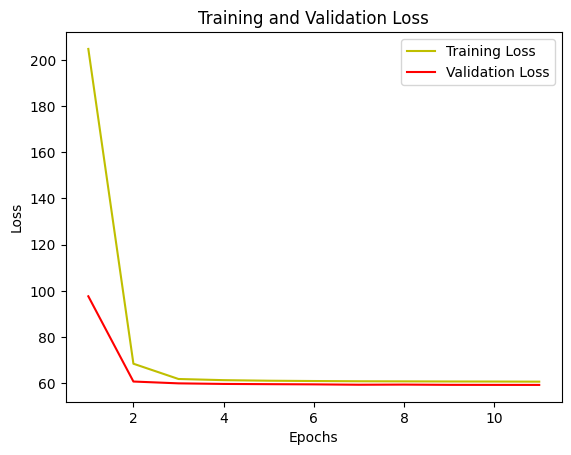


---------------------------------------------------------------------------

Epoch 1/11
471/477 [============================>.] - ETA: 0s - loss: 197.9125
Epoch 1: val_loss improved from inf to 95.65791, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 196.8652 - val_loss: 95.6579
Epoch 2/11
 33/477 [=>............................] - ETA: 1s - loss: 87.2177

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/477 [===========================>..] - ETA: 0s - loss: 69.3421
Epoch 2: val_loss improved from 95.65791 to 63.49070, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 69.0530 - val_loss: 63.4907
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 62.5000
Epoch 3: val_loss improved from 63.49070 to 61.92873, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.5709 - val_loss: 61.9287
Epoch 4/11
470/477 [============================>.] - ETA: 0s - loss: 61.6699
Epoch 4: val_loss improved from 61.92873 to 61.28966, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.6935 - val_loss: 61.2897
Epoch 5/11
462/477 [============================>.] - ETA: 0s - loss: 61.4288
Epoch 5: val_loss improved from 61.28966 to 60.93093, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3566 - val_loss: 60.9309

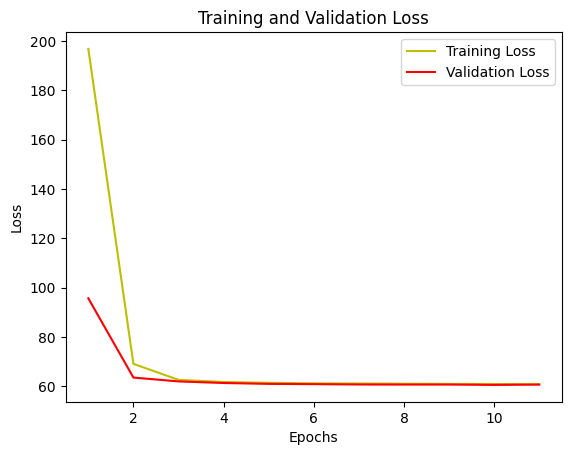


---------------------------------------------------------------------------

Epoch 1/11
467/477 [============================>.] - ETA: 0s - loss: 168.0179
Epoch 1: val_loss improved from inf to 77.23843, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 166.2444 - val_loss: 77.2384
Epoch 2/11
 54/477 [==>...........................] - ETA: 1s - loss: 76.1989

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


466/477 [============================>.] - ETA: 0s - loss: 68.9349
Epoch 2: val_loss improved from 77.23843 to 66.69137, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 68.8943 - val_loss: 66.6914
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 63.6604
Epoch 3: val_loss improved from 66.69137 to 63.85211, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.6604 - val_loss: 63.8521
Epoch 4/11
460/477 [===========================>..] - ETA: 0s - loss: 61.9411
Epoch 4: val_loss improved from 63.85211 to 62.98173, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.9124 - val_loss: 62.9817
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 61.4549
Epoch 5: val_loss improved from 62.98173 to 62.42068, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.2449 - val_loss: 62.4207

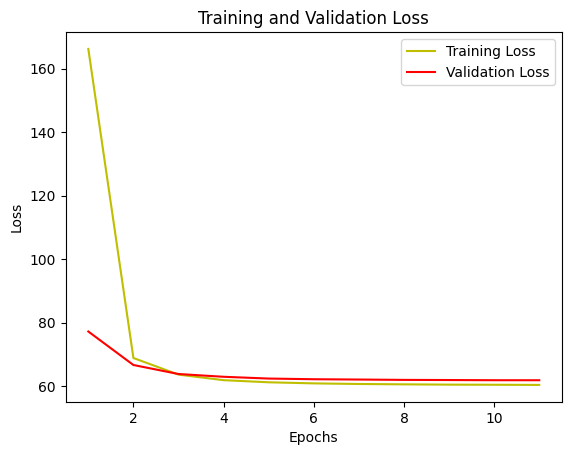


---------------------------------------------------------------------------

Epoch 1/11
475/477 [============================>.] - ETA: 0s - loss: 189.0722
Epoch 1: val_loss improved from inf to 97.96350, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 188.6301 - val_loss: 97.9635
Epoch 2/11
 66/477 [===>..........................] - ETA: 0s - loss: 98.1122 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 78.8054
Epoch 2: val_loss improved from 97.96350 to 63.27142, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 78.7095 - val_loss: 63.2714
Epoch 3/11
475/477 [============================>.] - ETA: 0s - loss: 64.1673
Epoch 3: val_loss improved from 63.27142 to 60.32503, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.2219 - val_loss: 60.3250
Epoch 4/11
462/477 [============================>.] - ETA: 0s - loss: 62.5763
Epoch 4: val_loss improved from 60.32503 to 59.56487, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.6546 - val_loss: 59.5649
Epoch 5/11
473/477 [============================>.] - ETA: 0s - loss: 62.2271
Epoch 5: val_loss improved from 59.56487 to 59.23634, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.1313 - val_loss: 59.2363

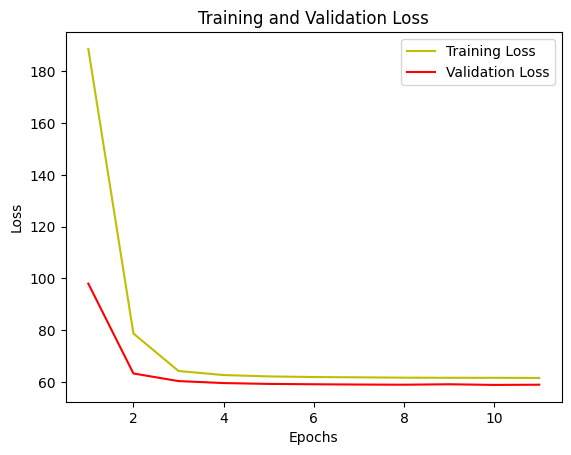


---------------------------------------------------------------------------

Epoch 1/11
476/477 [============================>.] - ETA: 0s - loss: 178.4424
Epoch 1: val_loss improved from inf to 97.70683, saving model to best_model.h5
477/477 [==============================] - 4s 5ms/step - loss: 178.2632 - val_loss: 97.7068
Epoch 2/11
 36/477 [=>............................] - ETA: 1s - loss: 91.5257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 73.7544
Epoch 2: val_loss improved from 97.70683 to 66.97865, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 73.3786 - val_loss: 66.9787
Epoch 3/11
465/477 [============================>.] - ETA: 0s - loss: 63.9845
Epoch 3: val_loss improved from 66.97865 to 63.38540, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 63.9025 - val_loss: 63.3854
Epoch 4/11
464/477 [============================>.] - ETA: 0s - loss: 62.1288
Epoch 4: val_loss improved from 63.38540 to 62.27264, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.0076 - val_loss: 62.2726
Epoch 5/11
470/477 [============================>.] - ETA: 0s - loss: 61.1839
Epoch 5: val_loss improved from 62.27264 to 61.91430, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.3583 - val_loss: 61.9143

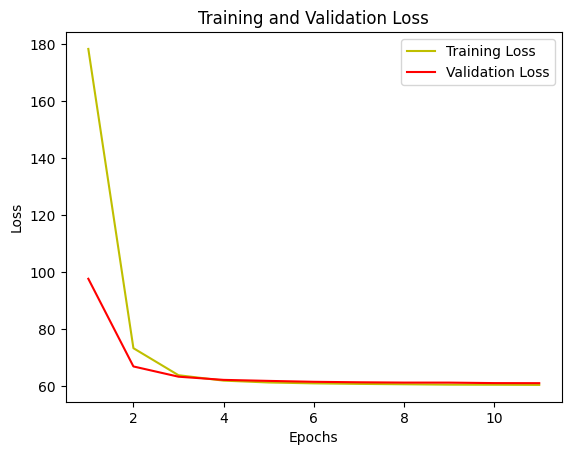


---------------------------------------------------------------------------

Epoch 1/11
466/477 [============================>.] - ETA: 0s - loss: 150.9887
Epoch 1: val_loss improved from inf to 66.75929, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 149.2420 - val_loss: 66.7593
Epoch 2/11
 45/477 [=>............................] - ETA: 1s - loss: 63.4571

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/477 [============================>.] - ETA: 0s - loss: 65.3736
Epoch 2: val_loss improved from 66.75929 to 62.80262, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 65.2262 - val_loss: 62.8026
Epoch 3/11
477/477 [==============================] - ETA: 0s - loss: 62.5717
Epoch 3: val_loss improved from 62.80262 to 61.55855, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 62.5717 - val_loss: 61.5585
Epoch 4/11
474/477 [============================>.] - ETA: 0s - loss: 61.6904
Epoch 4: val_loss improved from 61.55855 to 61.16521, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.6058 - val_loss: 61.1652
Epoch 5/11
465/477 [============================>.] - ETA: 0s - loss: 61.4595
Epoch 5: val_loss improved from 61.16521 to 60.96333, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.3145 - val_loss: 60.9633

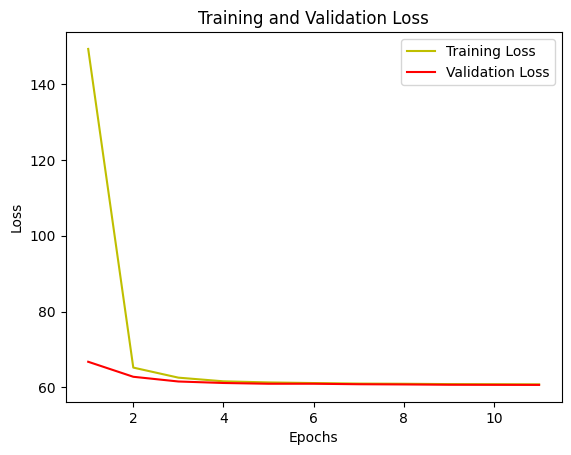


---------------------------------------------------------------------------

Epoch 1/11
470/477 [============================>.] - ETA: 0s - loss: 219.9973
Epoch 1: val_loss improved from inf to 110.79436, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 218.7000 - val_loss: 110.7944
Epoch 2/11
 62/477 [==>...........................] - ETA: 1s - loss: 97.2302 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/477 [============================>.] - ETA: 0s - loss: 76.0022
Epoch 2: val_loss improved from 110.79436 to 65.26079, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 75.7614 - val_loss: 65.2608
Epoch 3/11
461/477 [===========================>..] - ETA: 0s - loss: 64.4265
Epoch 3: val_loss improved from 65.26079 to 62.56632, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 64.5321 - val_loss: 62.5663
Epoch 4/11
469/477 [============================>.] - ETA: 0s - loss: 62.6217
Epoch 4: val_loss improved from 62.56632 to 61.26472, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 62.6339 - val_loss: 61.2647
Epoch 5/11
474/477 [============================>.] - ETA: 0s - loss: 61.8229
Epoch 5: val_loss improved from 61.26472 to 60.73366, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 61.7879 - val_loss: 60.733

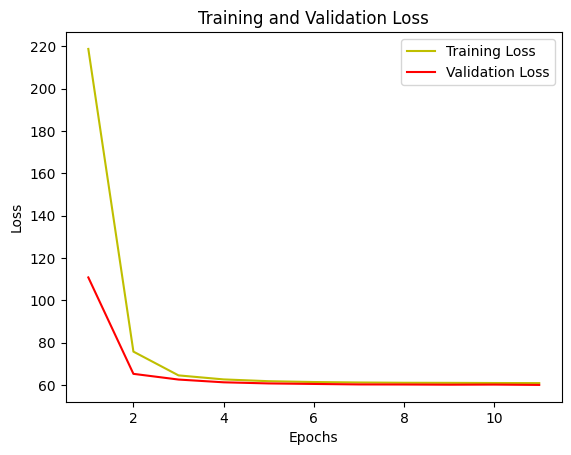


---------------------------------------------------------------------------

Epoch 1/11
461/477 [===========================>..] - ETA: 0s - loss: 193.4256
Epoch 1: val_loss improved from inf to 83.83018, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 190.1226 - val_loss: 83.8302
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 76.5769

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


463/477 [============================>.] - ETA: 0s - loss: 72.3455
Epoch 2: val_loss improved from 83.83018 to 64.76688, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 72.2813 - val_loss: 64.7669
Epoch 3/11
453/477 [===========================>..] - ETA: 0s - loss: 64.9671
Epoch 3: val_loss improved from 64.76688 to 61.50971, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 65.0894 - val_loss: 61.5097
Epoch 4/11
467/477 [============================>.] - ETA: 0s - loss: 63.1191
Epoch 4: val_loss improved from 61.50971 to 59.91475, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.0910 - val_loss: 59.9147
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 62.2151
Epoch 5: val_loss improved from 59.91475 to 59.38340, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.1951 - val_loss: 59.3834

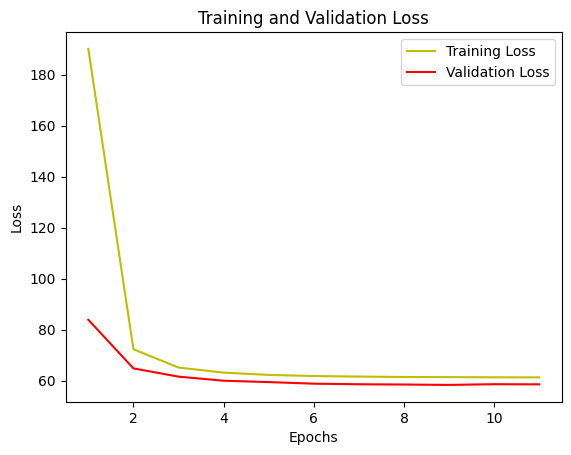


---------------------------------------------------------------------------

Epoch 1/11
456/477 [===========================>..] - ETA: 0s - loss: 201.3736
Epoch 1: val_loss improved from inf to 94.91128, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 196.7461 - val_loss: 94.9113
Epoch 2/11
 68/477 [===>..........................] - ETA: 0s - loss: 86.7473

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/477 [============================>.] - ETA: 0s - loss: 72.7404
Epoch 2: val_loss improved from 94.91128 to 65.90725, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 72.4576 - val_loss: 65.9072
Epoch 3/11
471/477 [============================>.] - ETA: 0s - loss: 63.8131
Epoch 3: val_loss improved from 65.90725 to 63.33339, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.8283 - val_loss: 63.3334
Epoch 4/11
477/477 [==============================] - ETA: 0s - loss: 61.9270
Epoch 4: val_loss improved from 63.33339 to 62.17810, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 61.9270 - val_loss: 62.1781
Epoch 5/11
475/477 [============================>.] - ETA: 0s - loss: 61.0127
Epoch 5: val_loss improved from 62.17810 to 61.75680, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.0707 - val_loss: 61.7568

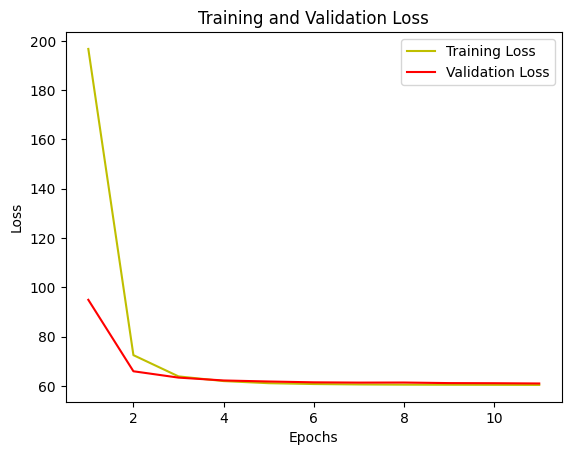


---------------------------------------------------------------------------

Epoch 1/11
472/477 [============================>.] - ETA: 0s - loss: 155.2870
Epoch 1: val_loss improved from inf to 68.90589, saving model to best_model.h5
477/477 [==============================] - 3s 4ms/step - loss: 154.4611 - val_loss: 68.9059
Epoch 2/11
 67/477 [===>..........................] - ETA: 0s - loss: 65.2872

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


475/477 [============================>.] - ETA: 0s - loss: 66.5621
Epoch 2: val_loss improved from 68.90589 to 63.73302, saving model to best_model.h5
477/477 [==============================] - 1s 3ms/step - loss: 66.5664 - val_loss: 63.7330
Epoch 3/11
474/477 [============================>.] - ETA: 0s - loss: 63.5277
Epoch 3: val_loss improved from 63.73302 to 62.14496, saving model to best_model.h5
477/477 [==============================] - 2s 3ms/step - loss: 63.4985 - val_loss: 62.1450
Epoch 4/11
475/477 [============================>.] - ETA: 0s - loss: 62.4394
Epoch 4: val_loss improved from 62.14496 to 61.59808, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 62.3786 - val_loss: 61.5981
Epoch 5/11
468/477 [============================>.] - ETA: 0s - loss: 62.0369
Epoch 5: val_loss improved from 61.59808 to 61.31501, saving model to best_model.h5
477/477 [==============================] - 2s 4ms/step - loss: 61.8806 - val_loss: 61.3150

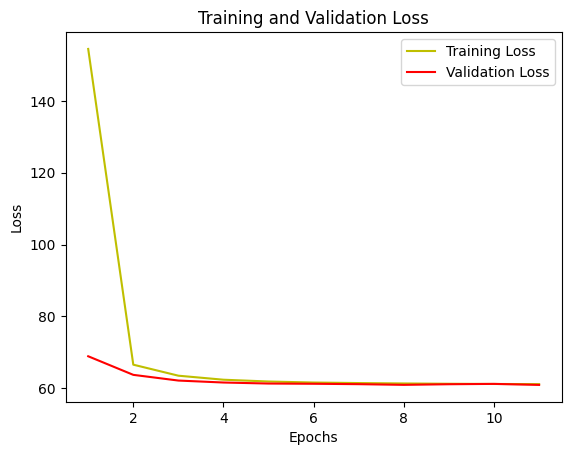


---------------------------------------------------------------------------



In [ ]:
# Splitting the data into features and the label
X = df[['NewProjectedPoints', 'Home', 'OverUnder', 'Trend']].values
y = df[['NewActualPoints']].values

# Define hyperparamters to keep each iteration the same seed
random_seeds = []
for rs in range(1, iterations):
  random_seeds.append(rs)

# Lists to store performance metrics
val_loss_scores = []
best_model_paths = []
mse_loss_scores = []

# Split the data into training and testing and saving the best loss rate for each iteration of the model
for seed in random_seeds:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

  # Scale both the train and test, otherwise the model will fail
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  scaler.fit(X_train)

  # The new variables are being scaled based on the standardizing features that happened in X_train
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Define the model
  model = Sequential()
  # First hidden layer number of neurons and number of inputs, with the type of activation
  model.add(Dense(6, input_shape=(4,), activation='relu'))
  # Second Hidden Layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='linear'))


  # Compile the model (which defines the loss function, the optimizer, and the metrics)
  model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
  model.summary

  # Save the best model
  checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

  # Fitting the model
  history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=11, callbacks=[checkpoint])

  # Saving the best model validation losses
  best_val_loss = min(history.history['val_loss'])
  val_loss_scores.append(best_val_loss)
  best_model = load_model('best_model.h5')
  best_model_paths.append(best_model)


  # Using the best model on the Test data now
  mse_neural = best_model.evaluate(X_test_scaled, y_test)
  print('')
  print("Iteration:", seed )
  print(f"Mean Squared Error: {mse_neural:.3f}")
  #print("Mean Squared Error from neural network: ", mse_neural)
  print(f"Best Validation Loss: {best_val_loss:.3f}")
  #print("Best Validation Loss: ", best_val_loss)
  print('')
  mse_loss_scores.append(mse_neural)

  # Plot the training and validation loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  # Does a line
  plt.plot(epochs, loss, 'y', label='Training Loss')
  # Does a dot
  #plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title("Training and Validation Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print('')
  print('---------------------------------------------------------------------------')
  print('')


###Getting Top Ownership Lineup

In [ ]:
# Bring in the Data
df_ownership = pd.read_csv(f"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/_Current/Current-wk{week}.csv")
# Fill NaN values with 0.0
df_ownership = df_ownership.fillna(0.0)
df_ownership = df_ownership[['Name', 'Position', 'Salary', 'Ownership']]
df_ownership = df_ownership[df_ownership['Salary'] != 0]

# Group players by position
availables = df_ownership.groupby(["Name", "Position", "Salary",'Ownership']).size().reset_index(name='Count')

# Define empty dictionaries to track the metrics for the lineup optimizer
salaries = {}
players = {}
ownerships = {}
lineups_dict = {}

# Group players by position and create dictionaries for key player attributes
for position in availables.Position.unique():
    available_for_position = availables[availables.Position == position]

    players[position] = list(available_for_position['Name'])
    salaries[position] = dict(zip(available_for_position['Name'], available_for_position['Salary']))
    ownerships[position] = dict(zip(available_for_position['Name'], available_for_position['Ownership']))

# Define lineup constraints and variables
positions_available = {
    "QB": 2,
    "RB": 2,
    "WR": 2,
    "TE": 1,
    "FLEX": 2
}

flexible_positions = ("RB", "WR", "TE")
salary_cap = 50000
variables = {position: LpVariable.dict(position, players[position], cat="Binary") for position in players}

# Create lineups
for lineup in range(1, 2):
    prob = LpProblem("Fantasy", LpMaximize)

    rewards = []
    costs = []
    number_of_selected_players = []


    for position, players in variables.items():
        for player, player_selected in players.items():
            costs += salaries[position][player] * player_selected
            rewards += ownerships[position][player] * player_selected  # Use ownership instead of points
            number_of_selected_players += player_selected


        if position not in flexible_positions:
            prob += lpSum(players.values()) == positions_available[position]
        else:
            prob += lpSum(players.values()) >= positions_available[position]
            prob += lpSum(players.values()) <= positions_available[position] + positions_available["FLEX"]

    prob += lpSum(number_of_selected_players) == sum(positions_available.values())
    prob += lpSum(rewards)
    prob += lpSum(costs) <= salary_cap


    num = 0.001
    if not lineup == 1:
        prob += (lpSum(rewards) <= total_ownership - num)  # Update to use total ownership
    prob.solve()

    ownership = str(prob.objective)  # Use ownership instead of total score

    lineupList = []

    for v in prob.variables():
        ownership = ownership.replace(v.name, str(v.varValue))
        if v.varValue != 0:
            lineupList.append(v.name)

    total_ownership = eval(ownership)  # Update to use ownership
    lineupList.append(total_ownership)

    lineups_dict.update({lineup: lineupList})

# Create a DataFrame from the lineup data
df = pd.DataFrame(lineups_dict).T
newcols = ['QB', 'SUPER', 'RB1', 'RB2', 'FLEXorTE', 'TEorFLEX', 'FLEX2', 'WR1', 'WR2', 'Ownership']  # Update column name

df.columns = newcols

removeKeys = ['QB_', 'RB_', 'TE_', 'WR_']

for pos in newcols:
    for removeKey in removeKeys:
        df[pos] = df[pos].apply(str).str.replace(removeKey, "")
    df[pos] = df[pos].apply(str).str.replace("_", " ")

df['Ownership'] = df['Ownership'].astype(float).round(2).apply(lambda x: f'{x:.2f}')  # Format ownership as desired

first_row = df.head(1)
# Extract the 'Ownership' column from the first row
max_ownership = float(first_row['Ownership'].values[0])
new_ownership = max_ownership * Ownership

print(first_row)
print("")
print(new_ownership)

             QB        SUPER          RB1           RB2     FLEXorTE  \
1  Dak Prescott  Jalen Hurts  Aaron Jones  Tony Pollard  Zamir White   

         TEorFLEX          FLEX2          WR1         WR2 Ownership  
1  Gerald Everett  Alex Erickson  Chris Olave  Tyler Boyd    101.04  

84.8736


###Bringing in Upcoming Weeks Data

In [ ]:
# Bring in the data
df_test = pd.read_csv(f"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/_Current/Current-wk{week}.csv")

# Fill NaN values with 0.0
df_test = df_test.fillna(0.0)
# Get rid of low floor players
df_test = df_test[df_test['Floor'] >= floor]


# Create a condition based on 'Position'
is_te_test = df_test['Position'] == 'TE'

# Filter the DataFrame based on the condition
df_test.loc[is_te_test, 'Keep'] = (df_test['NewProjectedPoints'] >= NewProjectedPoints_te)
df_test.loc[~is_te_test, 'Keep'] = (df_test['NewProjectedPoints'] >= NewProjectedPoints_rb_qb_wr)

# Drop rows where 'Keep' is False
df_test = df_test[df_test['Keep']]

# Getting the Home and Away data from Categorical to Numbers
dummies_test = pd.get_dummies(df_test.HomeAway)

# Concatenate the dummy dataframe and the main one
df_test = pd.concat([df_test, dummies_test], axis='columns')

# Drop the 'Keep' column
df_test = df_test.drop(columns='Keep')

# Splitting the data into features and picking what features I want to include
X = df_test[['NewProjectedPoints', 'Home', 'OverUnder', 'Trend']].values

# Standardize the features so it matches the type of numbers that the model was trained on
scaler.fit(X)

# The new variables are being scaled based on the standardizing features that happened in X_train
X_scaled = scaler.transform(X)

###Setting the Constraints and Printing the Lineups

In [ ]:
# To set the minimum so that any errors in the training process don't get into results
std_dev = np.std(val_loss_scores)
loss_threshold = median(val_loss_scores) + std_dev + 3

df_list = []

for index, value in enumerate(val_loss_scores):
  if value <= loss_threshold:
    each_model = best_model_paths[index]
    formatted_value = "{:.2f}".format(value)
    print("Index:", index, "Value:", formatted_value)
    y_points = each_model.predict(X_scaled)

    # Add the new column into the dataframe
    df_test = df_test.assign(NNProjectedPoints=y_points)

    # Changing the NewProjectedPoints column to round to 3 decimal places
    decimals = 3
    df_test['NNProjectedPoints'] = df_test['NNProjectedPoints'].round(decimals)

    # Creating a DataFrame with just the listed columns
    df_test = df_test[['Name', 'Position', 'NNProjectedPoints', 'Salary', 'Team', 'Ownership', 'Trend']]
    # Keeping the rows that have a salary greater than 1
    df_test = df_test[df_test['Salary'] > 1]

    # This is regrouping the dataframe so the players are grouped by Position
    availables = df_test.groupby(["Position", "Name", "NNProjectedPoints", "Salary", 'Team', 'Ownership', 'Trend']).size().reset_index(name='Count')

    # Define empty dictionaries to track the metrics for the lineup optimizer
    salaries = {}
    points = {}
    players = {}
    teams = {}
    ownerships = {}
    trends = {}
    lineups_dict = {}


    # Group players by position
    for position in availables.Position.unique():
        available_for_position = availables[availables.Position == position]

        players[position] = list(available_for_position['Name'])
        salaries[position] = dict(zip(available_for_position['Name'], available_for_position['Salary']))
        points[position] = dict(zip(available_for_position['Name'], available_for_position['NNProjectedPoints']))
        teams[position] = dict(zip(available_for_position['Name'], available_for_position['Team']))
        ownerships[position] = dict(zip(available_for_position['Name'], available_for_position['Ownership']))
        trends[position] = dict(zip(available_for_position['Name'], available_for_position['Trend']))

    # This defines another dictionary that has the positions and lineup.
    positions_available = {
        "QB": 2,
        "RB": 2,
        "WR": 2,
        "TE": 1,
        "FLEX": 2
    }

    flexible_positions = ("RB", "WR", "TE")
    salary_cap = 50000

    # Create variables to track player selections
    variables = {position: LpVariable.dict(position, players[position], cat="Binary")
                  for position in players}

    # Extract unique team names from the DataFrame
    all_teams = df_test["Team"].unique().tolist()

    # Create a dictionary to track the number of players selected from each team
    team_selection_count = {team: lpSum(variables[position][(player, team)] for position in players for player in players[position] if player[1] == team)
                          for team in all_teams}

    # Iterate to create multiple lineups
    for lineup in range(1, 11):
      #The "problem" is we want to have the maximum salary for each lineup.
      prob = LpProblem("Fantasy", LpMaximize)

      # Creating an empty list to track
      rewards = []
      costs = []
      number_of_selected_players = []
      ownership_projections = []
      trends_ = []

      # Create a dictionary to track the team of each selected player
      selected_team = {}


      for position, players in variables.items():
        for player, player_selected in players.items():
          # If this player is selected, he will add salaries and points
            costs += salaries[position][player] * player_selected
            rewards += points[position][player] * player_selected
            number_of_selected_players += player_selected
            ownership_projections += ownerships[position][player] * player_selected
            trends_ += trends[position][player] * player_selected

        if position not in flexible_positions:
            prob += lpSum(players.values()) == positions_available[position]  # Filling in the QB
        else:
              prob += lpSum(players.values()) >= positions_available[position]  # Filling in the RB, WR, TE
              prob += lpSum(players.values()) <= positions_available[position] + positions_available["FLEX"]  # Filling in the FLEX


      # Create the same positional player cannot be on the same team
      for position, players in variables.items():
        for player, player_selected in players.items():
           if player_selected == 1:
              team = teams[position][player]
              players_from_same_team = [p for p in players if teams[position][p] == team]
              prob += lpSum(variables[position][p] for p in players_from_same_team) <= 1


      # This sums up the points and sums up the salary while making sure the lineup salary is less than or equal to the 50,000
      # In total, we need exactly `positions_available` players
      prob += lpSum(number_of_selected_players) == sum(positions_available.values())
      prob += lpSum(rewards)
      prob += lpSum(costs) <= salary_cap
      prob += lpSum(ownership_projections) <= new_ownership


      num = 0.001
      # If it's not the first lineup
      if not lineup == 1:
        # Make sure the rewards (points) is less than or equal too the total of the previous lineup, minus 0.01
        # That is too ensure you don't get the same lineup each time becasue the max points of the lineup caps out
        # at just below the previous total projections. This ensures varied lineups, and then solve
        prob += (lpSum(rewards) <= total_score - num)
      prob.solve()

      # Getting the strings for the lineup and the constraints (which is same position) when starting the new lineup.
      score = str(prob.objective)
      constraints = [str(const) for const in prob.constraints.values()]

      # Creating an empty list for storing the lineup
      lineupList = []

      # This will create a list of every player in the dataset with a variable of 1 or 0, depending the player
      # has been chosen for the lineup. This loops through the list to fill in if the player has been chosen or not.
      for v in prob.variables():
          score = score.replace(v.name, str(v.varValue))
          if v.varValue != 0:
            lineupList.append(v.name)


      # # Finally we just have to save the total_score variable for the lineup.
      total_score = eval(score)
      lineupList.append(total_score)

      # Calculate and display the sum of ownership percentages for the selected players
      total_ownership = sum(
          ownerships[position][player] * v.varValue
          for position, players in variables.items()
          for player, v in players.items()
          if v.varValue == 1)

      total_trends = sum(
          trends[position][player] * v.varValue
          for position, players in variables.items()
          for player, v in players.items()
          if v.varValue == 1

      )

      # Add the total ownership to the lineupList
      lineupList.append(total_ownership)
      lineupList.append(total_trends)


      # # Storing all of the lineups in a dictionary
      lineups_dict.update({lineup: lineupList})

    # Turning the dictionary into a DataFrame and Transpose
    df = pd.DataFrame(lineups_dict).T

    # Creating a list for what the rename the column names
    newcols = ['QB', 'SUPER', 'RB1', 'RB2', 'FLEXorTE', 'TEorFLEX', 'FLEX2', 'WR1', 'WR2', 'Total_Score', 'Ownership %', 'Trend']

    # Adding that column name list into the DataFrame
    df.columns = newcols

    # Creating a list of what values to remove in each particular cell
    removeKeys = ['QB_', 'RB_', 'TE_', 'WR_']
    # For each position in each column, when the player has the position and _ in front of it, remove that and replace it with nothing
    for pos in newcols:
      for removeKey in removeKeys:
          df[pos] = df[pos].apply(str).str.replace(removeKey,"")
      df[pos] = df[pos].apply(str).str.replace("_", " ")

    # Changing the columns to round to 2 decimal places
    df['Total_Score'] = df['Total_Score'].astype(float).round(2).apply(lambda x: f'{x:.2f}')
    df['Ownership %'] = df['Ownership %'].astype(float).round(2).apply(lambda x: f'{x:.2f}')

    # Showing what the top lineups are
    df_list.append(df)

Index: 0 Value: 61.02
3/3 [==============================] - 0s 7ms/step
Index: 1 Value: 60.63
3/3 [==============================] - 0s 7ms/step
Index: 2 Value: 60.29
3/3 [==============================] - 0s 4ms/step
Index: 3 Value: 61.13
3/3 [==============================] - 0s 6ms/step
Index: 4 Value: 60.16
3/3 [==============================] - 0s 6ms/step
Index: 5 Value: 58.50
3/3 [==============================] - 0s 4ms/step
Index: 6 Value: 62.16
3/3 [==============================] - 0s 8ms/step
Index: 7 Value: 62.13
3/3 [==============================] - 0s 5ms/step
Index: 8 Value: 60.77
3/3 [==============================] - 0s 4ms/step
Index: 9 Value: 58.24
3/3 [==============================] - 0s 3ms/step
Index: 10 Value: 62.70
3/3 [==============================] - 0s 5ms/step
Index: 11 Value: 64.73
3/3 [==============================] - 0s 7ms/step
Index: 12 Value: 59.14
3/3 [==============================] - 0s 5ms/step
Index: 13 Value: 62.76
3/3 [====================

###End Timer

In [ ]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time = end_time - start_time
# Convert elapsed time to minutes
elapsed_minutes = elapsed_time / 60
print(f"Total time taken: {elapsed_minutes:.0f} minutes")

Total time taken: 66 minutes


###Viewing the Top Lineups

In [ ]:
# Create the df from the appended list
result_df = pd.concat(df_list, ignore_index=True)

# Group the lineups based on 'Ownership' and 'Trend' and add a 'Group_Count' column
result_df['Count'] = result_df.groupby(['Ownership %', 'Trend']).cumcount() + 1

# Rename the 'Group_Count' column to 'Group_Count / Iterations'
result_df = result_df.rename(columns={'Count': f'Count / {iterations -1}'})

# Sort the DataFrame by 'Group_Count' in descending order
result_df = result_df.sort_values(by=f'Count / {iterations -1}', ascending=False).reset_index(drop=True)

# Remove duplicates based on 'Ownership' and 'Trend'
result_df = result_df.drop_duplicates(subset=['Ownership %', 'Trend'], keep='first')

# Convert 'Trend' column to numeric type
result_df['Trend'] = pd.to_numeric(result_df['Trend'], errors='coerce')

# Calculate adjusted 'Trend' values
result_df['Trend'] = round(result_df['Trend'] / 9, 2)

# Convert 'Trend' column to numeric type
result_df['Ownership %'] = pd.to_numeric(result_df['Ownership %'], errors='coerce')

# Getting the Ownership as a % of max
result_df['Ownership %'] = round(result_df['Ownership %'] / float(max_ownership), 2)

# Reset the index of the DataFrame
result_df = result_df.reset_index(drop=True)

# Start the index at 1 instead of 0
result_df.index = result_df.index + 1

result_df.head(5)

QB         SUPER           RB1            RB2       FLEXorTE  \
1  Dak Prescott    Geno Smith  James Conner  Pierre Strong    Zamir White   
2  Dak Prescott    Geno Smith  James Conner  Pierre Strong  Jake Ferguson   
3  Dak Prescott    Geno Smith  James Conner  Pierre Strong   Tyjae Spears   
4  Dak Prescott    Geno Smith  James Conner  Pierre Strong    Zamir White   
5    Geno Smith  Kyler Murray  James Conner  Pierre Strong  Jake Ferguson   

        TEorFLEX        FLEX2                WR1                WR2  \
1   Trey McBride  CeeDee Lamb      Curtis Samuel  Wan'Dale Robinson   
2    CeeDee Lamb     DJ Moore  Demarcus Robinson  Wan'Dale Robinson   
3  Jake Ferguson  CeeDee Lamb           DJ Moore  Wan'Dale Robinson   
4    Evan Engram  CeeDee Lamb  Demarcus Robinson  Wan'Dale Robinson   
5   Trey McBride  CeeDee Lamb           DJ Moore  Wan'Dale Robinson   

  Total_Score  Ownership %  Trend  Count / 150  
1      143.71         0.74   0.99           53  
2      143.41         0.67   1.02           48  
3      144.12         0.66   0.92           34  
4      143.46         0.73   1.06           33  
5      138.96         0.62   0.99           28